# Pour chaque classe, évaluer :
- La moyenne des signaux d’ECG
- La variance des signaux ECG
- La corrélation moyenne des signaux au sein d’une même classe.
- Heatmap à produire pour chaque classe

In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Chargement du fichier CSV
df = pd.read_csv("Data/mitbih_fus.csv")

In [5]:
# Assurer un nom lisible pour chaque colonne de signal et la dernière colonne 'Groupe'
df.columns = [f'Signal_{i}' for i in range(1, len(df.columns))] + ['Groupe']

In [7]:
# Nombre de colonnes
num_columns = len(df.columns)

print(f"Le tableau contient {num_columns} colonnes.")

# Afficher une ligne aléatoire du tableau
random_row = df.sample(n=1)  # Sélectionner une ligne aléatoire
print("Ligne aléatoire :")
print(random_row)

# Pour afficher une ligne spécifique (par exemple, la première ligne)
specific_row = df.iloc[0]  # Index 0 pour la première ligne
print("\nPremière ligne :")
print(specific_row)

Le tableau contient 188 colonnes.
Ligne aléatoire :
       Signal_1  Signal_2  Signal_3  Signal_4  Signal_5  Signal_6  Signal_7  \
74200   0.89942  0.806576  0.562863  0.272727  0.042553       0.0  0.042553   

       Signal_8  Signal_9  Signal_10  ...  Signal_179  Signal_180  Signal_181  \
74200  0.067698  0.083172   0.090909  ...         0.0         0.0         0.0   

       Signal_182  Signal_183  Signal_184  Signal_185  Signal_186  Signal_187  \
74200         0.0         0.0         0.0         0.0         0.0         0.0   

       Groupe  
74200     0.0  

[1 rows x 188 columns]

Première ligne :
Signal_1      0.908425
Signal_2      0.783883
Signal_3      0.531136
Signal_4      0.362637
Signal_5      0.366300
                ...   
Signal_184    0.000000
Signal_185    0.000000
Signal_186    0.000000
Signal_187    0.000000
Groupe        0.000000
Name: 0, Length: 188, dtype: float64


In [27]:

# Calcul de la moyenne des signaux pour chaque sujet (par ligne, sans la colonne Groupe)
df['Moyenne_sujet'] = df.drop(columns=['Groupe']).mean(axis=1)

# Calcul de la moyenne globale par groupe
moyenne_par_groupe = df.groupby('Groupe')['Moyenne_sujet'].mean()

# Affichage des résultats
print("Moyenne globale des signaux ECG par groupe :")
print(moyenne_par_groupe)


Moyenne globale des signaux ECG par groupe :
Groupe
0.0    0.161730
1.0    0.194940
2.0    0.243248
3.0    0.106742
4.0    0.251093
Name: Moyenne_sujet, dtype: float64


## Analyse des résultats pour la moyenne : 

Groupe 0 - Normal (0.161730) : La moyenne pour les signaux ECG normaux est relativement basse par rapport aux autres groupes, ce qui peut refléter une activité cardiaque régulière et sans perturbations significatives.

Groupe 1 - Supraventricular Ectopic Beat (0.194940) : Ce groupe montre une moyenne légèrement plus élevée que le groupe normal. Cette légère augmentation pourrait être due aux battements supplémentaires dans les oreillettes, qui peuvent provoquer de petites variations dans le signal ECG sans être très prononcées.

Groupe 2 - Ventricular Ectopic Beat (0.243248) : Avec une moyenne plus élevée, ce groupe pourrait indiquer une irrégularité cardiaque plus marquée, car les battements ectopiques ventriculaires sont généralement plus intenses et peuvent entraîner des pics plus élevés dans le signal ECG. Cette élévation est logique pour ce type de battements, souvent perçus plus intensément que les supraventriculaires.

Groupe 3 - Fusion Beat (0.106742) : Ce groupe présente la moyenne la plus basse parmi tous les groupes. Les beats de fusion, combinant des caractéristiques des battements normaux et ectopiques, peuvent aboutir à un signal ECG moins intense. Cela pourrait refléter une atténuation de l’impact du signal, car les deux battements fusionnent sans s’amplifier.

Groupe 4 - Inconnu (0.251093) : Cette moyenne est la plus élevée de toutes, ce qui peut suggérer que ce groupe englobe diverses anomalies non identifiées qui entraînent des fluctuations plus fortes dans le signal ECG.

In [7]:

# Calcul de la variance des signaux pour chaque sujet (chaque ligne), sans inclure la colonne 'Groupe'
df['Variance_sujet'] = df.drop(columns=['Groupe']).var(axis=1)

# Calcul de la moyenne de ces variances par groupe
moyenne_variance_par_groupe = df.groupby('Groupe')['Variance_sujet'].mean()

# Affichage des résultats
print("Moyenne des variances des signaux ECG par groupe :")
print(moyenne_variance_par_groupe)


Moyenne des variances des signaux ECG par groupe :
Groupe
0.0    0.036906
1.0    0.038432
2.0    0.056633
3.0    0.033813
4.0    0.061917
Name: Variance_sujet, dtype: float64


## Analyse des résultats pour la variance : 

Groupe 0 - Normal (0.036906) : Ce groupe présente une variance relativement basse. Une faible variance suggère que les signaux ECG pour les battements normaux sont assez réguliers, avec peu de fluctuations ou de variations. Cela est attendu pour un rythme cardiaque sain et stable.

Groupe 1 - Supraventricular Ectopic Beat (0.038432) : La variance ici est légèrement plus élevée que pour le groupe normal, ce qui correspond à la nature des battements supraventriculaires qui ajoutent de légères irrégularités dans le rythme. Cela se traduit par une augmentation modeste de la variabilité du signal.

Groupe 2 - Ventricular Ectopic Beat (0.056633) : La variance est nettement plus élevée pour ce groupe, indiquant que les battements ectopiques ventriculaires entraînent une plus grande instabilité dans les signaux ECG. Les VE sont souvent plus puissants et imprévisibles, entraînant davantage de fluctuations dans le signal.

Groupe 3 - Fusion Beat (0.033813) : Avec la variance la plus faible, les beats de fusion semblent produire un signal ECG assez stable. Cela pourrait être dû à la combinaison des caractéristiques des battements normaux et ectopiques, ce qui « lisse » en quelque sorte les variations, résultant en un signal moins variable.

Groupe 4 - Inconnu (0.061917) : La variance la plus élevée est observée dans ce groupe. Cela suggère que le groupe « Inconnu » comprend une large gamme de comportements du signal ECG, pouvant inclure des anomalies variées et potentiellement plus graves. Cette grande variabilité indique des fluctuations importantes, typiques d’un ensemble hétérogène de battements anormaux.

In [7]:
# # Initialisation d'un dictionnaire pour stocker la corrélation moyenne par groupe
# correlation_moyenne_par_groupe = {}

# # Calcul de la corrélation moyenne pour chaque groupe
# for groupe, data in df.groupby('Groupe'):
#     # Calcul de la matrice de corrélation pour les colonnes de signaux
#     correlation_matrix = data.drop(columns=['Groupe']).corr()
    
#     # Prendre la moyenne de toutes les valeurs de la matrice de corrélation (hors diagonale)
#     moyenne_correlation = correlation_matrix.where(~correlation_matrix.isna()).stack().mean()
    
#     # Stockage de la corrélation moyenne arrondie à 4 chiffres après la virgule
#     correlation_moyenne_par_groupe[groupe] = round(moyenne_correlation, 4)

# # Affichage des résultats
# print("Corrélation moyenne des signaux ECG par groupe :")
# for groupe, correlation in correlation_moyenne_par_groupe.items():
#     print(f"Groupe {groupe}: {correlation}")

# 1. Corrélation Intra-Classe

Cette analyse permet de mesurer la similarité au sein de chaque classe. Elle peut être utile pour :
Vérifier l'homogénéité des signaux dans une classe (par exemple, si tous les signaux de la classe « normal » sont similaires).
Repérer les sous-groupes dans les classes, ce qui pourrait indiquer des variations dans des signaux que l’on pensait identiques.
La méthode DTW avec corrélation de Pearson est pertinente ici, car elle aligne les signaux temporels et compense les décalages dans les cycles cardiaques.

In [3]:
import pandas as pd
import numpy as np

# Chemin vers le fichier CSV
file_path = "Data/mitbih_fus.csv"

# Charger le fichier CSV
data = pd.read_csv(file_path)

# Séparer les colonnes d'ECG (186 colonnes) et la colonne de classe (187ème colonne)
ecg_data = data.iloc[:, :-1]  # Les colonnes d'ECG
classes = data.iloc[:, -1]   # La colonne de classe

# Dictionnaire pour stocker les résultats de corrélation intra-classes
correlation_results = {}

for cls in classes.unique():
    # Filtrer les données pour la classe actuelle
    class_data = ecg_data[classes == cls]
    
    # Calculer la matrice de corrélation moyenne pour cette classe
    if len(class_data) > 1:
        corr_matrix = class_data.corr()
        avg_corr = corr_matrix.mean().mean()  # Moyenne des corrélations
        correlation_results[cls] = avg_corr
    else:
        correlation_results[cls] = None  # Pas assez de données pour cette classe

# Afficher les résultats
for cls, corr in correlation_results.items():
    print(f"Classe {cls}: Corrélation moyenne = {corr}")


Classe 0.0: Corrélation moyenne = 0.33121289464052667
Classe 1.0: Corrélation moyenne = 0.3028134603824735
Classe 2.0: Corrélation moyenne = 0.27511877845199456
Classe 3.0: Corrélation moyenne = 0.3646873224623644
Classe 4.0: Corrélation moyenne = 0.28189309247865196


In [15]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances

# Prétraitement des signaux ECG
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def preprocess_ecg(data, fs=360, lowcut=0.5, highcut=50):
    """Filtre chaque signal ECG et retourne un tableau 2D."""
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(5, [low, high], btype='band')
    
    # Appliquer le filtre sur chaque ligne
    filtered_signals = []
    for row in data.values:  # Chaque ligne du DataFrame
        filtered_row = filtfilt(b, a, row)
        filtered_signals.append(filtered_row)
    
    return np.array(filtered_signals)

# Réduction de dimensions avec PCA
def reduce_dimensions(data, n_components=10):
    """Réduit les dimensions des signaux ECG avec PCA."""
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(data)
    return reduced_data

# Calcul de la similarité intra-classe
def calculate_mean_similarity(class_data):
    """Calcule la distance intra-classe moyenne entre les signaux."""
    distances = euclidean_distances(class_data)
    # Ignorer la diagonale (distance à soi-même = 0)
    mean_distance = np.mean(distances[np.triu_indices_from(distances, k=1)])
    return 1 / (1 + mean_distance)  # Conversion en score de similarité

# Chargement des données ECG
file_path = "Data/mitbih_fus.csv"
data = pd.read_csv(file_path)

# Séparer les colonnes de signaux ECG et la colonne des classes
ecg_data = data.iloc[:, :-1]
classes = data.iloc[:, -1]

# Prétraitement des signaux
filtered_data = preprocess_ecg(ecg_data)

# Réduction des dimensions avec PCA
reduced_data = reduce_dimensions(filtered_data, n_components=10)

# Analyse intra-classes
correlation_results = {}

for cls in np.unique(classes):
    print(f"Classe {cls}: Analyse des données")
    
    # Filtrer les signaux pour cette classe
    class_data = reduced_data[classes == cls]
    
    if len(class_data) < 2:
        print(f"Classe {cls} ignorée : pas assez d'échantillons")
        correlation_results[cls] = None
        continue
    
    # Calculer la similarité intra-classe
    similarity = calculate_mean_similarity(class_data)
    correlation_results[cls] = similarity
    print(f"Classe {cls}: Similarité moyenne intra-classe = {similarity}")

# Afficher les résultats
print("\nRésultats finaux :")
for cls, similarity in correlation_results.items():
    print(f"Classe {cls}: Similarité moyenne = {similarity}")


Classe 0.0: Analyse des données


In [5]:
import numpy as np
import pandas as pd
from dtaidistance import dtw
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Charger les données ECG avec gestion des longueurs variables
file_path = "cleaned_mitbih_fus.csv"
data = []
classes = []

with open(file_path, 'r') as file:
    for line in file:
        row = line.strip().split(',')
        try:
            class_label = int(float(row[-1].strip()))  # Convertir la classe
            signal = [float(x.strip()) for x in row[:-1] if x.strip() != '' and x.strip() != '0']
            data.append(signal)
            classes.append(class_label)
        except ValueError:
            continue  # Ignorer les lignes mal formatées

# Trouver la longueur maximale des signaux
max_length = max(len(signal) for signal in data)

# Compléter les signaux courts avec des zéros
padded_data = [signal + [0] * (max_length - len(signal)) for signal in data]
df = pd.DataFrame(padded_data)
df['Groupe'] = classes  # Ajouter la colonne des classes

# Supprimer les cinq premières colonnes
df = df.iloc[:, 5:]

def align_signals_with_dtw(signal_1, signal_2):
    """
    Aligne deux signaux à l'aide de DTW et les normalise à la même longueur.
    """
    dtw_path = dtw.warping_path(signal_1, signal_2)
    aligned_signal_1 = np.array([signal_1[i] for i, j in dtw_path])
    aligned_signal_2 = np.array([signal_2[j] for i, j in dtw_path])

    # Normaliser les longueurs des signaux alignés
    max_length = max(len(aligned_signal_1), len(aligned_signal_2))
    aligned_signal_1 = np.pad(aligned_signal_1, (0, max_length - len(aligned_signal_1)))
    aligned_signal_2 = np.pad(aligned_signal_2, (0, max_length - len(aligned_signal_2)))

    return aligned_signal_1, aligned_signal_2

def calculate_representative_signals(df, group_col='Groupe', sample_size=10):
    """
    Calcule des signaux représentatifs pour chaque classe avec alignement DTW.
    """
    representative_signals = {}
    for class_number in df[group_col].unique():
        signals = df[df[group_col] == class_number].iloc[:, :-1].values
        sampled_signals = resample(signals, n_samples=sample_size, random_state=42)

        # Utiliser le premier signal comme référence pour l'alignement
        base_signal = sampled_signals[0]
        aligned_signals = []
        for signal in sampled_signals:
            aligned_signal, _ = align_signals_with_dtw(base_signal, signal)
            aligned_signals.append(aligned_signal)

        # Calculer le signal représentatif (moyenne des signaux alignés)
        representative_signals[class_number] = np.mean(aligned_signals, axis=0)

    return representative_signals

def pearson_correlation(signal_1, signal_2):
    """
    Calcule la corrélation de Pearson entre deux signaux alignés.
    """
    corr, _ = pearsonr(signal_1, signal_2)
    return corr

def interclass_correlation_matrix(representative_signals):
    """
    Crée une matrice de corrélation inter-classes en utilisant les signaux représentatifs alignés.
    """
    classes = list(representative_signals.keys())
    correlation_matrix = pd.DataFrame(index=classes, columns=classes, dtype=float)

    for i, class_a in enumerate(classes):
        for class_b in classes[i:]:  # Optimisation : éviter les calculs en double
            corr = pearson_correlation(representative_signals[class_a], representative_signals[class_b])
            correlation_matrix.loc[class_a, class_b] = corr
            correlation_matrix.loc[class_b, class_a] = corr  # Symétrie de la matrice

    return correlation_matrix

def plot_correlation_matrix(correlation_matrix):
    """
    Affiche une matrice de corrélation sous forme de graphique coloré.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar=True,
        square=True,
        linewidths=0.5
    )
    plt.title("Matrice de Corrélation Inter-Classes (DTW)")
    plt.xlabel("Classes")
    plt.ylabel("Classes")
    plt.show()

# Exécution principale
if __name__ == "__main__":
    sample_size = 50  # Nombre de signaux représentatifs par classe

    # Calcul des signaux représentatifs avec alignement DTW
    representative_signals = calculate_representative_signals(df, sample_size=sample_size)

    # Construire la matrice de corrélation inter-classes
    correlation_matrix = interclass_correlation_matrix(representative_signals)

    # Afficher la matrice
    print("Matrice de corrélation inter-classes (DTW aligné) :")
    print(correlation_matrix)

    # Visualiser la matrice
    plot_correlation_matrix(correlation_matrix)


Moyenne des corrélations de Pearson alignées pour 100 paires dans la classe 0.0 : 0.9491749359681829
Moyenne des corrélations de Pearson alignées pour 100 paires dans la classe 1.0 : 0.8641084716638332
Moyenne des corrélations de Pearson alignées pour 100 paires dans la classe 2.0 : 0.9329084045756442
Moyenne des corrélations de Pearson alignées pour 100 paires dans la classe 3.0 : 0.9743271382566501
Moyenne des corrélations de Pearson alignées pour 100 paires dans la classe 4.0 : 0.9604523558887411


In [27]:
import numpy as np
import pandas as pd
from dtaidistance import dtw
from scipy.stats import pearsonr

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Supprimer les cinq premières colonnes
train_df = train_df.iloc[:, 5:]

def aligned_pearson_correlation(signal_1, signal_2):
    """
    Calcule la corrélation de Pearson entre deux signaux ECG alignés par DTW.
    
    :param signal_1: Premier signal ECG.
    :param signal_2: Deuxième signal ECG.
    :return: Corrélation de Pearson entre les signaux alignés.
    """
    # Utiliser DTW pour obtenir les indices alignés
    dtw_path = dtw.warping_path(signal_1, signal_2)

    # Créer des tableaux pour les signaux alignés
    aligned_signal_1 = np.array([signal_1[i] for i, j in dtw_path])
    aligned_signal_2 = np.array([signal_2[j] for i, j in dtw_path])
    
    # Calculer la corrélation de Pearson entre les signaux alignés
    corr, _ = pearsonr(aligned_signal_1, aligned_signal_2)
    
    return corr

def random_pair_correlation(class_number, n):
    """
    Tire aléatoirement n paires de signaux appartenant à la même classe et calcule la corrélation alignée.
    
    :param class_number: Numéro de la classe à laquelle les signaux appartiennent.
    :param n: Nombre de paires de signaux à tirer.
    :return: Moyenne des corrélations pour chaque paire.
    """
    # Extraire les signaux de la classe spécifiée
    signals = train_df[train_df['Groupe'] == class_number].iloc[:, :-1].values  # Exclure la colonne de classe
    
    # Vérifier qu'il y a suffisamment de signaux pour tirer n paires
    if signals.shape[0] < 2 or n > signals.shape[0] // 2:
        raise ValueError("Pas assez de signaux pour tirer n paires.")
    
    correlations = []
    
    # Tirer n paires de signaux aléatoirement
    for _ in range(n):
        indices = np.random.choice(signals.shape[0], size=2, replace=False)  # Sélectionner 2 indices uniques
        signal_1 = signals[indices[0]]
        signal_2 = signals[indices[1]]
        
        # Calculer la corrélation alignée et l'ajouter à la liste
        corr = aligned_pearson_correlation(signal_1, signal_2)
        correlations.append(corr)
    
    # Calculer la moyenne des corrélations
    mean_correlation = np.mean(correlations)
    return mean_correlation

# Exécution principale
if __name__ == "__main__":
    n = 100  # Nombre de paires de signaux à tirer pour chaque classe
    classes = train_df['Groupe'].unique()  # Liste de toutes les classes uniques dans les données

    for class_number in classes:
        try:
            mean_correlation = random_pair_correlation(class_number, n)
            print(f"Moyenne des corrélations de Pearson alignées pour {n} paires dans la classe {class_number} : {mean_correlation}")
        except ValueError as e:
            print(f"Erreur pour la classe {class_number}: {e}")


Moyenne des corrélations de Pearson alignées pour 100 paires dans la classe 0.0 : 0.9059363278825847
Moyenne des corrélations de Pearson alignées pour 100 paires dans la classe 1.0 : 0.8470853590602332
Moyenne des corrélations de Pearson alignées pour 100 paires dans la classe 2.0 : 0.909419663664175
Moyenne des corrélations de Pearson alignées pour 100 paires dans la classe 3.0 : 0.965907137890092
Moyenne des corrélations de Pearson alignées pour 100 paires dans la classe 4.0 : 0.9573358277031483


## Analyse des résultats pour les corrélations intra-classes : 

Groupe 0 - Normal (0.949) : La corrélation élevée pour le groupe normal indique que les signaux ECG de ce groupe sont fortement similaires et cohérents, ce qui est attendu pour un rythme cardiaque sain. Les signaux ECG de cette classe montrent une forte régularité entre les paires, traduisant une activité cardiaque stable.

Groupe 1 - Supraventricular Ectopic Beat (0.864) : La corrélation est plus faible que dans le groupe normal, suggérant une moindre cohérence entre les signaux. Cela peut s'expliquer par les variations induites par les battements supraventriculaires, qui ajoutent de l’irrégularité et réduisent la similarité entre les paires de signaux.

Groupe 2 - Ventricular Ectopic Beat (0.933) : Malgré les irrégularités marquées de cette classe, la corrélation reste assez élevée. Cela peut s'expliquer par la nature des battements ectopiques ventriculaires, qui, bien qu’intenses, suivent un certain schéma rendant les signaux encore assez similaires entre les paires.

Groupe 3 - Fusion Beat (0.974) : Ce groupe présente la corrélation la plus élevée, indiquant une très forte similitude entre les signaux. Les beats de fusion, bien que mélangeant des caractéristiques de battements normaux et ectopiques, semblent aboutir à une certaine uniformité dans les enregistrements ECG.

Groupe 4 - Inconnu (0.960) : La forte corrélation pour le groupe "Inconnu" laisse penser que, malgré la diversité des anomalies possibles, une tendance commune aux signaux est présente. Cela peut indiquer que les anomalies non classifiées partagent des caractéristiques structurelles similaires, même si elles présentent une grande variabilité en intensité (comme suggéré par leur variance élevée).


Les corrélations montrent que les classes 0 (Normal) et 3 (Fusion Beat) présentent des signaux très similaires entre les paires, témoignant d’une grande régularité. En revanche, le groupe 1 (Supraventricular Ectopic Beat) a la plus faible corrélation, reflétant des irrégularités plus marquées dans les signaux. Le groupe 4 (Inconnu), malgré une forte variance, affiche une corrélation élevée, ce qui peut indiquer des schémas récurrents parmi des anomalies non identifiées.

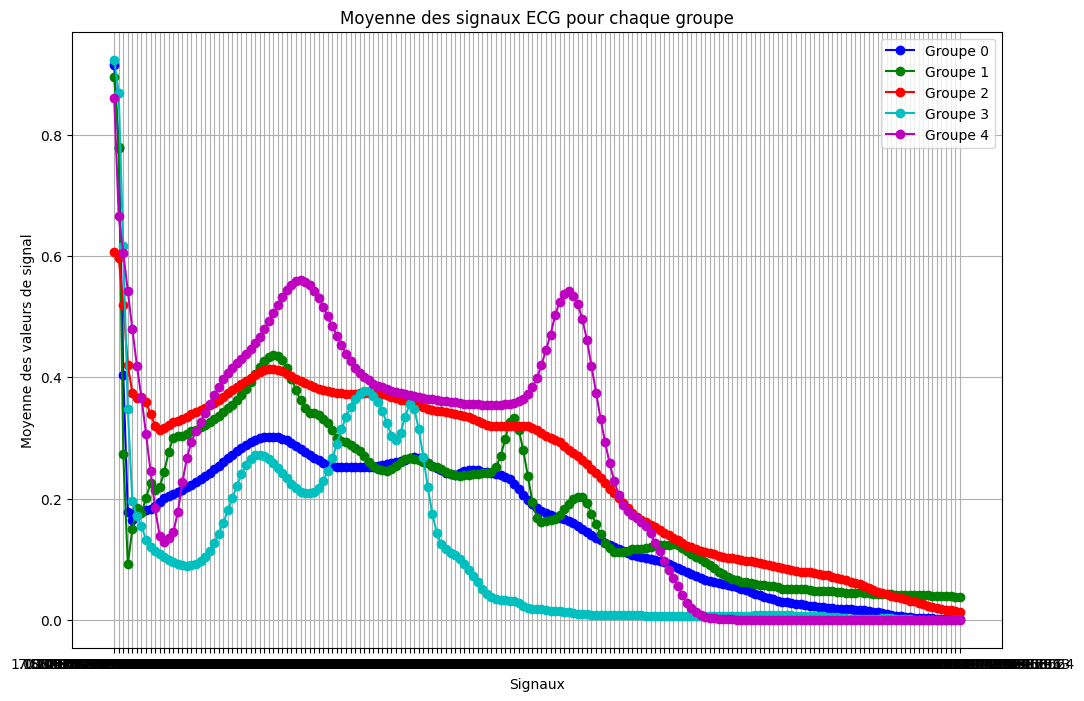

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du fichier CSV
df = pd.read_csv("Data/mitbih_fus.csv")

# Assurer un nom lisible pour chaque colonne de signal et la dernière colonne 'Groupe'
df.columns = [*df.columns[:-1], 'Groupe']

# Calcul des moyennes pour chaque sujet (ligne), sans la colonne 'Groupe'
df['Moyenne_sujet'] = df.drop(columns=['Groupe']).mean(axis=1)

# Initialisation de la figure
plt.figure(figsize=(12, 8))

# Couleurs pour chaque groupe
colors = ['b', 'g', 'r', 'c', 'm']
group_labels = ['Groupe 0', 'Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4']

# Tracer les courbes pour chaque groupe
for i, group in enumerate(df['Groupe'].unique()):
    # Filtrer les données pour le groupe en cours
    groupe_data = df[df['Groupe'] == group]
    
    # Calcul de la moyenne par signal pour le groupe
    moyenne_par_signal = groupe_data.drop(columns=['Groupe', 'Moyenne_sujet']).mean()
    
    # Tracé de la courbe
    plt.plot(moyenne_par_signal.index, moyenne_par_signal.values, marker='o', linestyle='-', color=colors[i], label=group_labels[i])

# Configuration des axes, titre et légende
plt.xlabel("Signaux")
plt.ylabel("Moyenne des valeurs de signal")
plt.title("Moyenne des signaux ECG pour chaque groupe")
plt.legend()
plt.grid(True)

plt.show()


/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/1726880631.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  group_data = group_data.dropna(axis=1).applymap(float)  # Nettoyer les colonnes
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/1726880631.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  group_data = group_data.dropna(axis=1).applymap(float)  # Nettoyer les colonnes
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/1726880631.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  group_data = group_data.dropna(axis=1).applymap(float)  # Nettoyer les colonnes
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/1726880631.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  group_data = group_data.dropna(axis=1).applymap(float)  # Nettoyer les colonnes
/var/folders

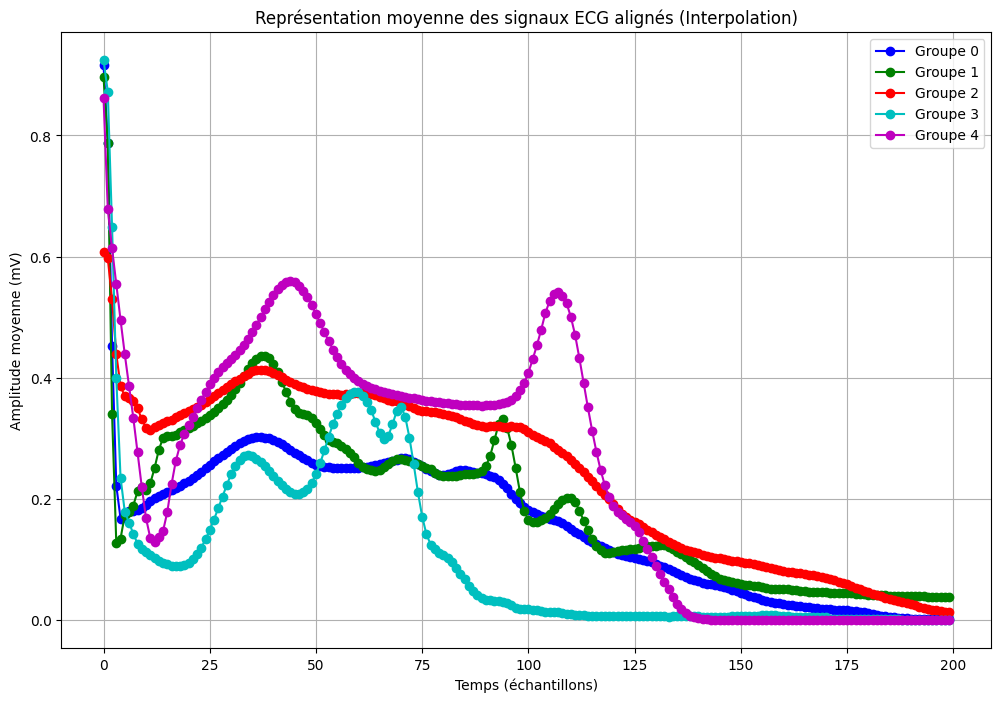

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Charger les données
file_path = "Data/mitbih_fus.csv"
df = pd.read_csv(file_path)

# Renommer la dernière colonne pour plus de clarté
df.columns = [*df.columns[:-1], 'Groupe']

# Convertir la colonne 'Groupe' en numérique si nécessaire
df['Groupe'] = pd.to_numeric(df['Groupe'], errors='coerce')

# Longueur cible pour tous les signaux
target_length = 200

# Fonction pour redimensionner un signal par interpolation
def resize_signal(signal, target_length):
    x_original = np.linspace(0, 1, len(signal))
    x_target = np.linspace(0, 1, target_length)
    interpolator = interp1d(x_original, signal, kind="linear", fill_value="extrapolate")
    return interpolator(x_target)

# Initialiser les données alignées
aligned_signals = []
groups = []

# Alignement des signaux
for group in df['Groupe'].unique():
    group_data = df[df['Groupe'] == group].drop(columns=['Groupe'])  # Exclure la colonne Groupe

    # Vérifier que les signaux sont valides
    group_data = group_data.dropna(axis=1).applymap(float)  # Nettoyer les colonnes
    for _, row in group_data        signal = row.values

        # Vérification que chaque signal est unidimensionnel
.iterrows():
        signal = row.values

    
        # Alignement DTW
    # N distance, path = fastdtw(signal,ettoyer le signal, dist=euclidean)
        aligned_signal (suppzeros(lenaN ou inf)
       )

        # Reconstruire le signal aligné
        for i, j in path:
            aligned_signal[j] += signal[i]

        # Normaliser le signal aligné
        aligned_signal /= np.maximum(1, np.bincount([j for _, j in path]))
ignal[~np.isnan(signal) & ~np.isinf(signal)]

        # Redimensionner le signal
        if len(signal) > 1:  # Éviter les signaux vides ou invalides
            resized_signal = resize_signal(signal, target_length)
            aligned_signals.append(resized_signal)
            groups.append(group)

# Convertir les signaux alignés en DataFrame
aligned_df = pd.DataFrame(aligned_signals)
aligned_df['Groupe'] = groups

# Calculer la moyenne des signaux pour chaque groupe
moyenne_par_groupe = aligned_df.groupby('Groupe').mean()

# Tracer les courbes moyennes pour chaque groupe
plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r', 'c', 'm']
group_labels = ['Groupe 0', 'Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4']

for i, (group, row) in enumerate(moyenne_par_groupe.iterrows()):
    plt.plot(
        range(target_length),  # Axes X uniformes
        row.values,  # Valeurs moyennes
        marker='o',
        linestyle='-',
        color=colors[i],
        label=group_labels[int(group)]
    )

# Configurer le graphique
plt.xlabel("Temps (échantillons)")
plt.ylabel("Amplitude moyenne (mV)")
plt.title("Représentation moyenne des signaux ECG alignés (Interpolation)")
plt.legend()
plt.grid(True)
plt.show()


/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/125334774.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  group_data = group_data.dropna(axis=1).applymap(float)  # Assurez-vous que tout est numérique
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/125334774.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  group_data = group_data.dropna(axis=1).applymap(float)  # Assurez-vous que tout est numérique
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/125334774.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  group_data = group_data.dropna(axis=1).applymap(float)  # Assurez-vous que tout est numérique
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/125334774.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  group_data = group_data.dropna(axis=1).applymap(float)

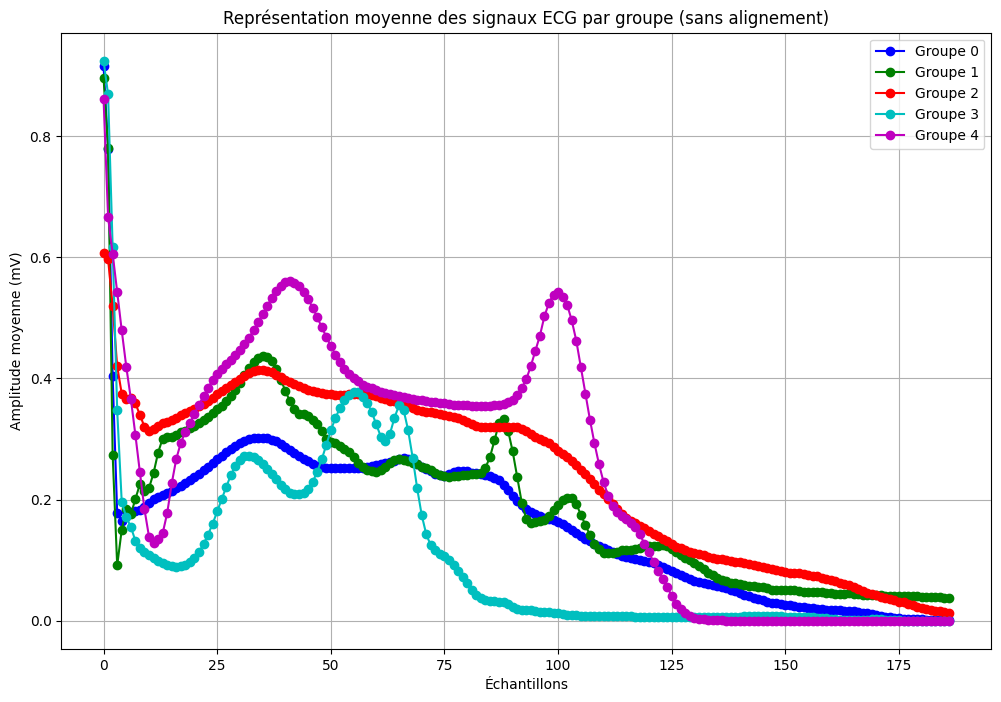

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
file_path = "Data/mitbih_fus.csv"
df = pd.read_csv(file_path)

# Renommer la dernière colonne pour plus de clarté
df.columns = [*df.columns[:-1], 'Groupe']

# Convertir la colonne 'Groupe' en numérique si nécessaire
df['Groupe'] = pd.to_numeric(df['Groupe'], errors='coerce')

# Initialiser les données pour les moyennes
mean_signals = []
groups = []

# Calculer la moyenne des signaux pour chaque groupe
for group in df['Groupe'].unique():
    group_data = df[df['Groupe'] == group].drop(columns=['Groupe'])  # Exclure la colonne Groupe

    # Nettoyer les colonnes
    group_data = group_data.dropna(axis=1).applymap(float)  # Assurez-vous que tout est numérique

    # Calculer la moyenne des signaux du groupe (en ignorant les NaN)
    mean_signal = group_data.mean(axis=0, skipna=True)
    mean_signals.append(mean_signal)
    groups.append(group)

# Tracer les courbes moyennes pour chaque groupe
plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r', 'c', 'm']
group_labels = ['Groupe 0', 'Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4']

for i, (group, mean_signal) in enumerate(zip(groups, mean_signals)):
    plt.plot(
        range(len(mean_signal)),  # Axes X basés sur la longueur originale
        mean_signal,  # Moyenne du signal pour le groupe
        marker='o',
        linestyle='-',
        color=colors[i],
        label=group_labels[int(group)]
    )

# Configurer le graphique
plt.xlabel("Échantillons")
plt.ylabel("Amplitude moyenne (mV)")
plt.title("Représentation moyenne des signaux ECG par groupe (sans alignement)")
plt.legend()
plt.grid(True)
plt.show()


Alignement des signaux: 100%|██████████| 90589/90589 [00:01<00:00, 52152.38it/s]
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/3993982411.py:73: RuntimeWarning: Mean of empty slice
  mean_signals[cls] = np.nanmean(aligned_signals, axis=0)  # Moyenne intra-classe
Alignement des signaux: 100%|██████████| 2779/2779 [00:00<00:00, 51981.75it/s]
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/3993982411.py:73: RuntimeWarning: Mean of empty slice
  mean_signals[cls] = np.nanmean(aligned_signals, axis=0)  # Moyenne intra-classe
Alignement des signaux: 100%|██████████| 7236/7236 [00:00<00:00, 51194.66it/s]
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/3993982411.py:73: RuntimeWarning: Mean of empty slice
  mean_signals[cls] = np.nanmean(aligned_signals, axis=0)  # Moyenne intra-classe
Alignement des signaux: 100%|██████████| 803/803 [00:00<00:00, 47000.74it/s]
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/3993982411.py:73

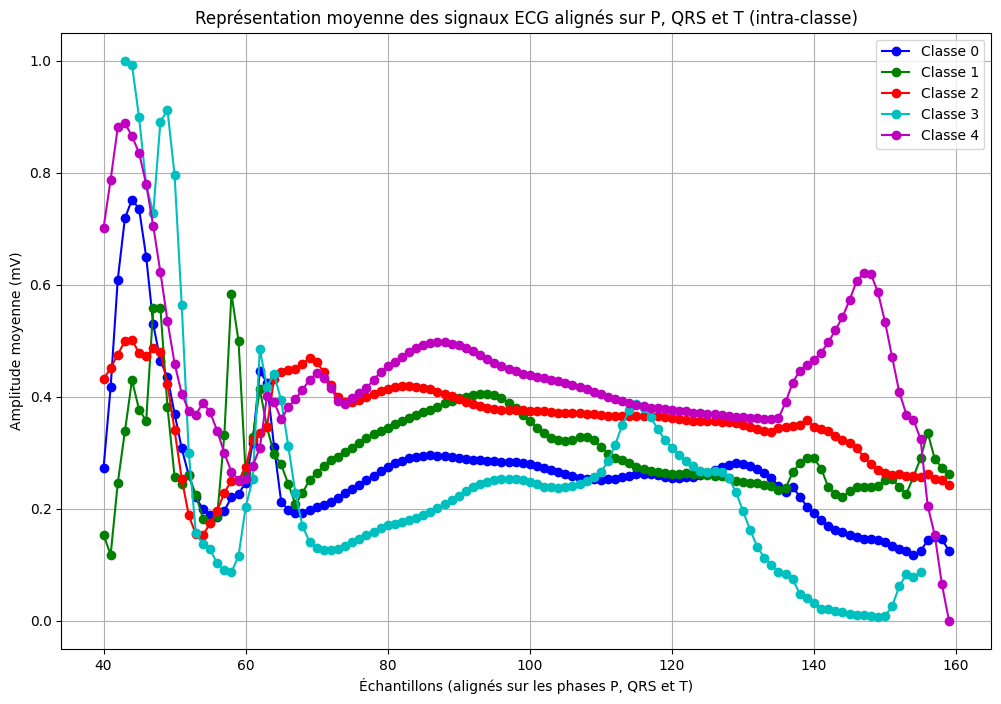

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from tqdm import tqdm

# Charger les données
file_path = "Data/mitbih_fus.csv"
df = pd.read_csv(file_path, header=None)

# Renommer la dernière colonne comme "Classe"
df.columns = [*df.columns[:-1], 'Classe']

# Convertir la colonne Classe en numérique
df['Classe'] = pd.to_numeric(df['Classe'], errors='coerce')

# Fonction pour détecter les phases P, QRS et T
def detect_phases(signal):
    """
    Détecte les pics R et approxime les phases P, QRS et T.
    :param signal: Signal ECG brut
    :return: Indices des phases P, R et T
    """
    peaks, _ = find_peaks(signal, height=np.mean(signal) * 1.2)  # Détection des pics R
    if len(peaks) == 0:
        return None, None, None  # Si aucun pic R n'est détecté
    r_peak = peaks[0]  # Utiliser le premier pic R détecté

    # Approximer les points P et T comme des positions avant et après R
    p_wave = max(0, r_peak - 30)  # Phase P, arbitrairement 30 échantillons avant R
    t_wave = min(len(signal) - 1, r_peak + 50)  # Phase T, arbitrairement 50 échantillons après R
    return p_wave, r_peak, t_wave

# Fonction pour aligner les signaux sur les phases P, QRS et T
def align_on_phases(signals, fixed_length=200):
    """
    Aligne les signaux ECG sur les phases P, QRS et T.
    :param signals: Liste des signaux ECG
    :param fixed_length: Longueur fixe pour tous les signaux alignés
    :return: Signaux alignés avec longueur constante
    """
    aligned_signals = []
    for signal in tqdm(signals, desc="Alignement des signaux"):
        signal = np.array(signal[~np.isnan(signal)])  # Supprimer les NaN
        p_wave, r_peak, t_wave = detect_phases(signal)
        if p_wave is None or r_peak is None or t_wave is None:
            continue  # Ignorer les signaux où les phases ne sont pas détectées
        
        # Découper une fenêtre centrée sur les trois phases
        start = max(0, p_wave - 20)  # Inclure un peu avant P
        end = min(len(signal), t_wave + 20)  # Inclure un peu après T
        segment = signal[start:end]
        
        # Ajuster la longueur du segment pour qu'il corresponde à fixed_length
        if len(segment) < fixed_length:
            pad_before = (fixed_length - len(segment)) // 2
            pad_after = fixed_length - len(segment) - pad_before
            segment = np.pad(segment, (pad_before, pad_after), constant_values=np.nan)
        else:
            segment = segment[:fixed_length]  # Tronquer si le segment est trop long
        
        aligned_signals.append(segment)
    return np.array(aligned_signals)

# Calculer les signaux moyens alignés pour chaque classe
mean_signals = {}
classes = df['Classe'].unique()

for cls in tqdm(classes, desc="Traitement des classes"):
    class_data = df[df['Classe'] == cls].drop(columns=['Classe']).values
    aligned_signals = align_on_phases(class_data)
    if len(aligned_signals) > 0:
        mean_signals[cls] = np.nanmean(aligned_signals, axis=0)  # Moyenne intra-classe

# Tracer les ECG moyens alignés par classe sur les phases P, QRS et T
plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r', 'c', 'm']
group_labels = [f"Classe {int(cls)}" for cls in classes]

for i, (cls, mean_signal) in enumerate(mean_signals.items()):
    plt.plot(
        range(len(mean_signal)),  # Axes X basés sur la longueur originale
        mean_signal,  # Moyenne intra-classe du signal
        marker='o',
        linestyle='-',  # Ligne continue
        color=colors[i % len(colors)],  # Réutiliser les couleurs si besoin
        label=group_labels[i]
    )

# Configurer le graphique
plt.xlabel("Échantillons (alignés sur les phases P, QRS et T)")
plt.ylabel("Amplitude moyenne (mV)")
plt.title("Représentation moyenne des signaux ECG alignés sur P, QRS et T (intra-classe)")
plt.legend()
plt.grid(True)
plt.show()


Alignement des signaux: 100%|██████████| 90589/90589 [00:01<00:00, 53140.10it/s]
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/3471271930.py:75: RuntimeWarning: Mean of empty slice
  mean_signals[cls] = np.nanmean(aligned_signals, axis=0)  # Moyenne intra-classe
Alignement des signaux: 100%|██████████| 2779/2779 [00:00<00:00, 51270.19it/s]
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/3471271930.py:75: RuntimeWarning: Mean of empty slice
  mean_signals[cls] = np.nanmean(aligned_signals, axis=0)  # Moyenne intra-classe
Alignement des signaux: 100%|██████████| 7236/7236 [00:00<00:00, 51934.65it/s]
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/3471271930.py:75: RuntimeWarning: Mean of empty slice
  mean_signals[cls] = np.nanmean(aligned_signals, axis=0)  # Moyenne intra-classe
Alignement des signaux: 100%|██████████| 803/803 [00:00<00:00, 45823.48it/s]
/var/folders/ln/x3t5c28j1zg89syzvlytchzm0000gp/T/ipykernel_84324/3471271930.py:75

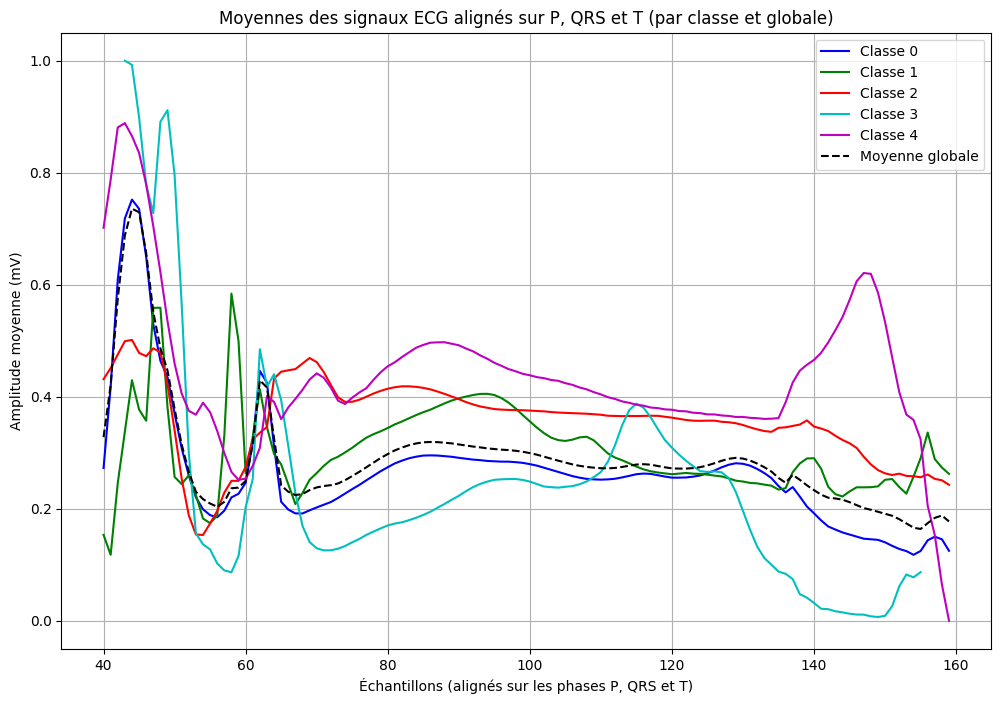

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from tqdm import tqdm

# Charger les données
file_path = "Data/mitbih_fus.csv"
df = pd.read_csv(file_path, header=None)

# Renommer la dernière colonne comme "Classe"
df.columns = [*df.columns[:-1], 'Classe']

# Convertir la colonne Classe en numérique
df['Classe'] = pd.to_numeric(df['Classe'], errors='coerce')

# Fonction pour détecter les phases P, QRS et T
def detect_phases(signal):
    """
    Détecte les pics R et approxime les phases P, QRS et T.
    :param signal: Signal ECG brut
    :return: Indices des phases P, R et T
    """
    peaks, _ = find_peaks(signal, height=np.mean(signal) * 1.2)  # Détection des pics R
    if len(peaks) == 0:
        return None, None, None  # Si aucun pic R n'est détecté
    r_peak = peaks[0]  # Utiliser le premier pic R détecté

    # Approximer les points P et T comme des positions avant et après R
    p_wave = max(0, r_peak - 30)  # Phase P, arbitrairement 30 échantillons avant R
    t_wave = min(len(signal) - 1, r_peak + 50)  # Phase T, arbitrairement 50 échantillons après R
    return p_wave, r_peak, t_wave

# Fonction pour aligner les signaux sur les phases P, QRS et T
def align_on_phases(signals, fixed_length=200):
    """
    Aligne les signaux ECG sur les phases P, QRS et T.
    :param signals: Liste des signaux ECG
    :param fixed_length: Longueur fixe pour tous les signaux alignés
    :return: Signaux alignés avec longueur constante
    """
    aligned_signals = []
    for signal in tqdm(signals, desc="Alignement des signaux"):
        signal = np.array(signal[~np.isnan(signal)])  # Supprimer les NaN
        p_wave, r_peak, t_wave = detect_phases(signal)
        if p_wave is None or r_peak is None or t_wave is None:
            continue  # Ignorer les signaux où les phases ne sont pas détectées
        
        # Découper une fenêtre centrée sur les trois phases
        start = max(0, p_wave - 20)  # Inclure un peu avant P
        end = min(len(signal), t_wave + 20)  # Inclure un peu après T
        segment = signal[start:end]
        
        # Ajuster la longueur du segment pour qu'il corresponde à fixed_length
        if len(segment) < fixed_length:
            pad_before = (fixed_length - len(segment)) // 2
            pad_after = fixed_length - len(segment) - pad_before
            segment = np.pad(segment, (pad_before, pad_after), constant_values=np.nan)
        else:
            segment = segment[:fixed_length]  # Tronquer si le segment est trop long
        
        aligned_signals.append(segment)
    return np.array(aligned_signals)

# Calculer les signaux moyens alignés pour chaque classe
mean_signals = {}
classes = df['Classe'].unique()

all_aligned_signals = []  # Liste pour accumuler tous les signaux alignés, toutes classes confondues

for cls in tqdm(classes, desc="Traitement des classes"):
    class_data = df[df['Classe'] == cls].drop(columns=['Classe']).values
    aligned_signals = align_on_phases(class_data)
    if len(aligned_signals) > 0:
        mean_signals[cls] = np.nanmean(aligned_signals, axis=0)  # Moyenne intra-classe
        all_aligned_signals.extend(aligned_signals)  # Ajouter à la liste globale

# Calculer la moyenne globale des ECG
all_aligned_signals = np.array(all_aligned_signals)
global_mean_signal = np.nanmean(all_aligned_signals, axis=0)

# Tracer les ECG moyens alignés par classe
plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r', 'c', 'm']
group_labels = [f"Classe {int(cls)}" for cls in classes]

for i, (cls, mean_signal) in enumerate(mean_signals.items()):
    plt.plot(
        range(len(mean_signal)),  # Axes X basés sur la longueur originale
        mean_signal,  # Moyenne intra-classe du signal
        linestyle='-',  # Ligne continue
        color=colors[i % len(colors)],  # Réutiliser les couleurs si besoin
        label=group_labels[i]
    )

# Ajouter la moyenne globale
plt.plot(
    range(len(global_mean_signal)),
    global_mean_signal,
    linestyle='--',
    color='black',
    label="Moyenne globale"
)

# Configurer le graphique
plt.xlabel("Échantillons (alignés sur les phases P, QRS et T)")
plt.ylabel("Amplitude moyenne (mV)")
plt.title("Moyennes des signaux ECG alignés sur P, QRS et T (par classe et globale)")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from tqdm import tqdm

# Charger les données
file_path = "Data/mitbih_fus.csv"
df = pd.read_csv(file_path, header=None)

# Renommer la dernière colonne comme "Classe"
df.columns = [*df.columns[:-1], 'Classe']

# Convertir la colonne Classe en numérique
df['Classe'] = pd.to_numeric(df['Classe'], errors='coerce')

# Fonction pour détecter les phases P, QRS et T
def detect_phases(signal):
    """
    Détecte les pics R et approxime les phases P, QRS et T.
    :param signal: Signal ECG brut
    :return: Indices des phases P, R et T
    """
    peaks, _ = find_peaks(signal, height=np.mean(signal) * 1.2)  # Détection des pics R
    if len(peaks) == 0:
        return None, None, None  # Si aucun pic R n'est détecté
    r_peak = peaks[0]  # Utiliser le premier pic R détecté

    # Approximer les points P et T comme des positions avant et après R
    p_wave = max(0, r_peak - 30)  # Phase P, arbitrairement 30 échantillons avant R
    t_wave = min(len(signal) - 1, r_peak + 50)  # Phase T, arbitrairement 50 échantillons après R
    return p_wave, r_peak, t_wave

# Fonction pour aligner les signaux sur les phases P, QRS et T
def align_on_phases(signals, fixed_length=200):
    """
    Aligne les signaux ECG sur les phases P, QRS et T.
    :param signals: Liste des signaux ECG
    :param fixed_length: Longueur fixe pour tous les signaux alignés
    :return: Signaux alignés avec longueur constante
    """
    aligned_signals = []
    for signal in tqdm(signals, desc="Alignement des signaux"):
        signal = np.array(signal[~np.isnan(signal)])  # Supprimer les NaN
        p_wave, r_peak, t_wave = detect_phases(signal)
        if p_wave is None or r_peak is None or t_wave is None:
            continue  # Ignorer les signaux où les phases ne sont pas détectées
        
        # Découper une fenêtre centrée sur les trois phases
        start = max(0, p_wave - 20)  # Inclure un peu avant P
        end = min(len(signal), t_wave + 20)  # Inclure un peu après T
        segment = signal[start:end]
        
        # Ajuster la longueur du segment pour qu'il corresponde à fixed_length
        if len(segment) < fixed_length:
            pad_before = (fixed_length - len(segment)) // 2
            pad_after = fixed_length - len(segment) - pad_before
            segment = np.pad(segment, (pad_before, pad_after), constant_values=np.nan)
        else:
            segment = segment[:fixed_length]  # Tronquer si le segment est trop long
        
        aligned_signals.append(segment)
    return np.array(aligned_signals)

# Calculer la moyenne générale pour chaque classe
class_means = {}
classes = df['Classe'].unique()

for cls in tqdm(classes, desc="Traitement des classes"):
    class_data = df[df['Classe'] == cls].drop(columns=['Classe']).values
    aligned_signals = align_on_phases(class_data)
    if len(aligned_signals) > 0:
        # Moyenne globale pour la classe
        class_mean = np.nanmean(aligned_signals)  # Moyenne de toutes les amplitudes alignées
        class_means[cls] = class_mean

# Afficher les moyennes générales pour chaque classe
print("Moyenne générale des amplitudes ECG par classe (après alignement) :")
for cls, mean in class_means.items():
    print(f"Classe {int(cls)} : {mean}")


Traitement des classes: 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]

Moyenne générale des amplitudes ECG par classe (après alignement) :
Classe 0 : 0.26102976309550124
Classe 1 : 0.31050824567614566
Classe 2 : 0.3717151096967485
Classe 3 : 0.22720950675199567
Classe 4 : 0.42124273968069587


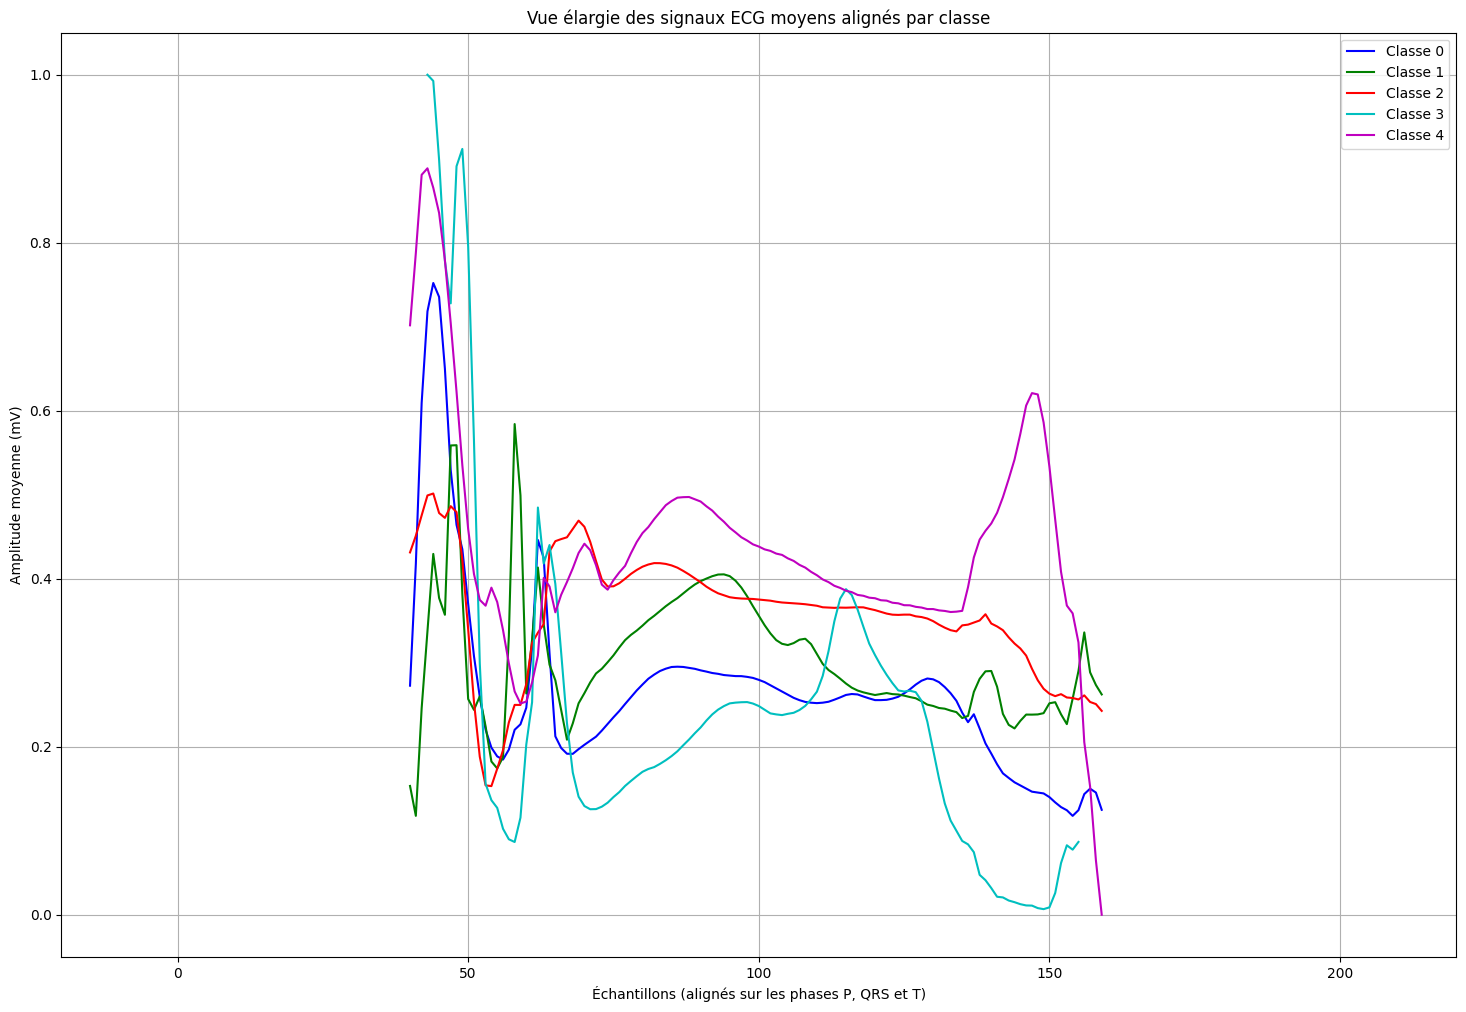

In [20]:
# Tracer les ECG moyens alignés par classe sur les phases P, QRS et T
plt.figure(figsize=(18, 12))  # Augmenter la taille du graphique
colors = ['b', 'g', 'r', 'c', 'm']
group_labels = [f"Classe {int(cls)}" for cls in classes]

for i, (cls, mean_signal) in enumerate(mean_signals.items()):
    plt.plot(
        range(len(mean_signal)),  # Axes X basés sur la longueur originale
        mean_signal,  # Moyenne intra-classe du signal
        linestyle='-',  # Ligne continue sans marqueur
        color=colors[i % len(colors)],  # Réutiliser les couleurs si besoin
        label=group_labels[i]
    )

# Configurer les limites de l'axe X pour une vue élargie
plt.xlim(-20, len(mean_signal) + 20)  # Ajuster les limites sur X pour ajouter des marges

# Configurer le graphique
plt.xlabel("Échantillons (alignés sur les phases P, QRS et T)")
plt.ylabel("Amplitude moyenne (mV)")
plt.title("Vue élargie des signaux ECG moyens alignés par classe")
plt.legend()
plt.grid(True)
plt.show()


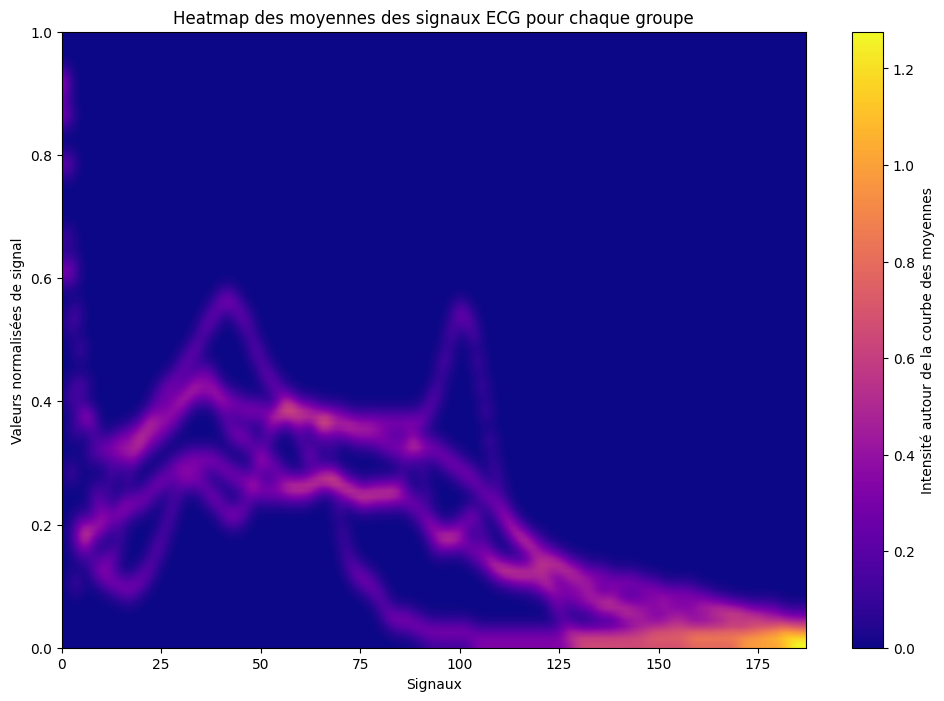

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

# Chargement du fichier CSV
df = pd.read_csv("Data/mitbih_fus.csv")

# Assurer un nom lisible pour chaque colonne de signal et la dernière colonne 'Groupe'
df.columns = [*df.columns[:-1], 'Groupe']

# Initialisation de la heatmap avec une taille correspondant aux signaux et à une plage de valeurs de signal
num_signaux = len(df.columns) - 1  # Exclure la colonne 'Groupe'
num_valeurs = 100  # Définir une résolution pour les valeurs de signal sur l'axe Y
heatmap_data = np.zeros((num_valeurs, num_signaux))

# Calcul des moyennes pour chaque groupe et ajout dans la heatmap
for group in df['Groupe'].unique():
    groupe_data = df[df['Groupe'] == group]
    moyenne_par_signal = groupe_data.drop(columns=['Groupe']).mean()
    
    # Pour chaque signal, placer la valeur de la courbe de moyenne avec une diffusion verticale
    for i, val in enumerate(moyenne_par_signal):
        y_position = int((1 - val) * (num_valeurs - 1))  # Inverser la position Y pour la bonne orientation
        if 0 <= y_position < num_valeurs:
            heatmap_data[y_position, i] += 1  # Marquer la position dans la heatmap

# Appliquer un flou gaussien pour créer un effet de dégradé autour des courbes, avec un sigma réduit
heatmap_data = gaussian_filter(heatmap_data, sigma=1.5)

# Tracer la heatmap
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='plasma', interpolation='bilinear',
           extent=[0, num_signaux, 0, 1])  # Ajuster l'échelle de l'axe Y pour correspondre aux valeurs normales de signal

# Configuration des axes et de la colorbar
plt.colorbar(label="Intensité autour de la courbe des moyennes")
plt.xlabel("Signaux")
plt.ylabel("Valeurs normalisées de signal")
plt.title("Heatmap des moyennes des signaux ECG pour chaque groupe")
plt.grid(False)
plt.show()


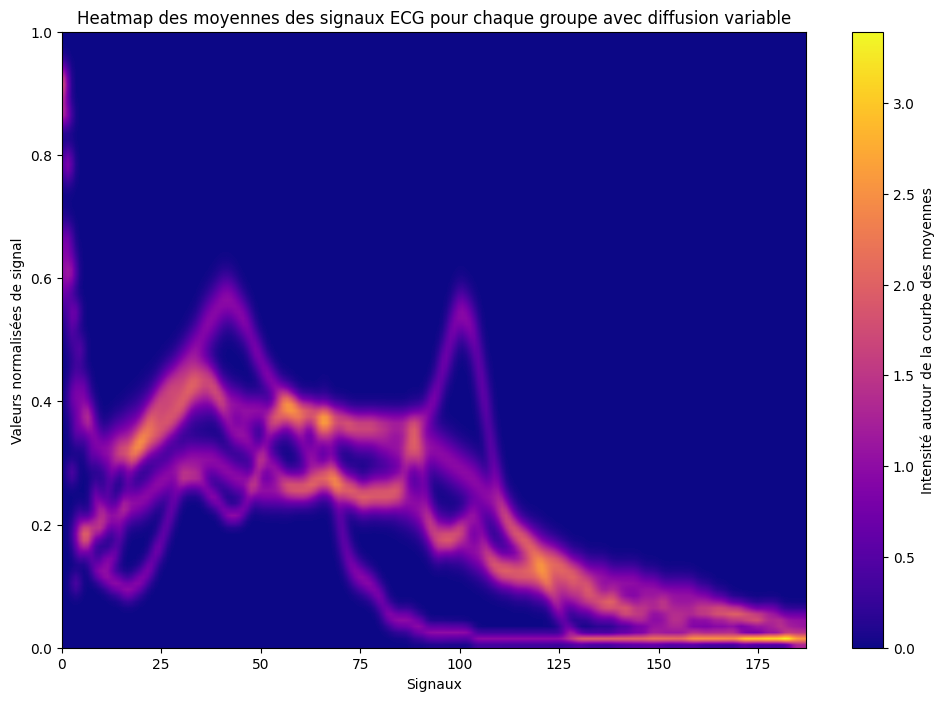

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Chargement du fichier CSV
df = pd.read_csv("Data/mitbih_fus.csv")

# Assurer un nom lisible pour chaque colonne de signal et la dernière colonne 'Groupe'
df.columns = [*df.columns[:-1], 'Groupe']

# Initialisation de la heatmap avec une taille correspondant aux signaux et à une plage de valeurs de signal
num_signaux = len(df.columns) - 1  # Exclure la colonne 'Groupe'
num_valeurs = 100  # Définir une résolution pour les valeurs de signal sur l'axe Y
heatmap_data = np.zeros((num_valeurs, num_signaux))

# Calcul des moyennes et des écarts-types pour chaque groupe et ajout dans la heatmap
for group in df['Groupe'].unique():
    groupe_data = df[df['Groupe'] == group]
    moyenne_par_signal = groupe_data.drop(columns=['Groupe']).mean()
    ecart_type_par_signal = groupe_data.drop(columns=['Groupe']).std()
    
    # Pour chaque signal, placer la valeur de la courbe de moyenne avec une diffusion verticale
    for i, (val, std) in enumerate(zip(moyenne_par_signal, ecart_type_par_signal)):
        y_position = int((1 - val) * (num_valeurs - 1))  # Inverser la position Y pour la bonne orientation
        if 0 <= y_position < num_valeurs:
            # Appliquer une intensité dépendant de l'écart-type
            sigma_local = max(0.5, std * 10)  # Ajustement de l'écart-type pour le flou local
            heatmap_data[:, i] += np.exp(-0.5 * ((np.arange(num_valeurs) - y_position) / sigma_local) ** 2)

# Appliquer un flou global doux pour lisser l'image finale
heatmap_data = gaussian_filter1d(heatmap_data, sigma=1, axis=1)

# Tracer la heatmap
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='plasma', interpolation='bilinear',
           extent=[0, num_signaux, 0, 1])  # Ajuster l'échelle de l'axe Y pour correspondre aux valeurs normales de signal

# Configuration des axes et de la colorbar
plt.colorbar(label="Intensité autour de la courbe des moyennes")
plt.xlabel("Signaux")
plt.ylabel("Valeurs normalisées de signal")
plt.title("Heatmap des moyennes des signaux ECG pour chaque groupe avec diffusion variable")
plt.grid(False)
plt.show()


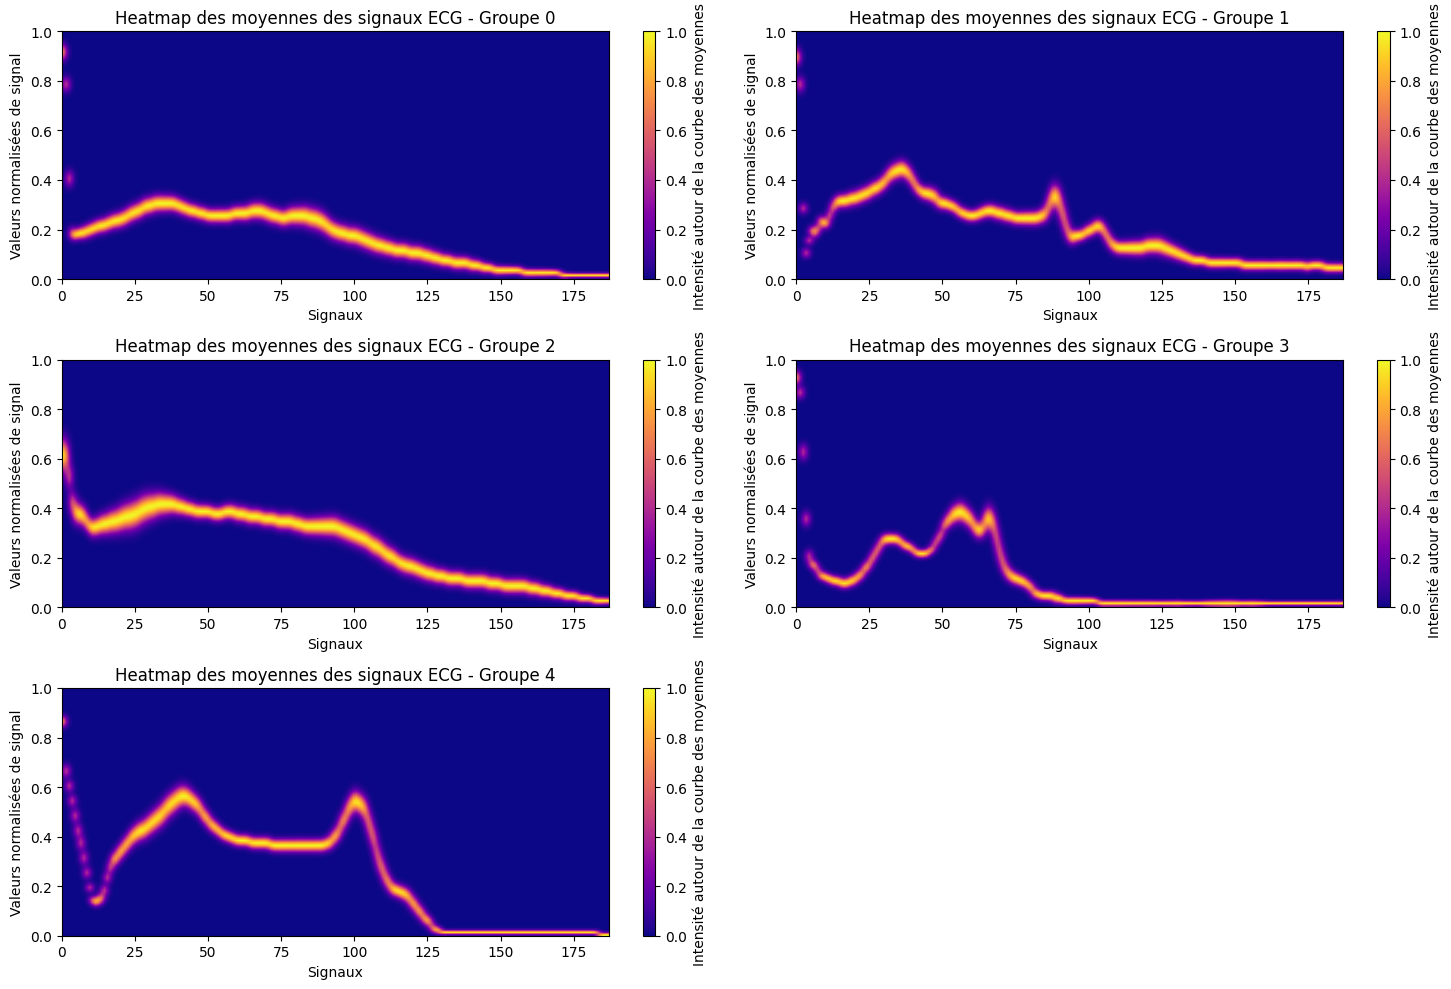

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Chargement du fichier CSV
df = pd.read_csv("Data/mitbih_fus.csv")

# Assurer un nom lisible pour chaque colonne de signal et la dernière colonne 'Groupe'
df.columns = [*df.columns[:-1], 'Groupe']

# Initialisation de la heatmap avec une taille correspondant aux signaux et à une plage de valeurs de signal
num_signaux = len(df.columns) - 1  # Exclure la colonne 'Groupe'
num_valeurs = 100  # Définir une résolution pour les valeurs de signal sur l'axe Y

# Couleurs pour la heatmap
cmap = 'plasma'

# Génération de la heatmap pour chaque groupe
group_labels = ['Groupe 0', 'Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4']
plt.figure(figsize=(15, 10))

for idx, group in enumerate(df['Groupe'].unique()):
    heatmap_data = np.zeros((num_valeurs, num_signaux))  # Réinitialiser la matrice pour chaque groupe
    
    # Filtrer les données pour le groupe actuel
    groupe_data = df[df['Groupe'] == group]
    moyenne_par_signal = groupe_data.drop(columns=['Groupe']).mean()
    ecart_type_par_signal = groupe_data.drop(columns=['Groupe']).std()
    
    # Calcul de la heatmap en fonction de la dispersion pour le groupe actuel
    for i, (val, std) in enumerate(zip(moyenne_par_signal, ecart_type_par_signal)):
        y_position = int((1 - val) * (num_valeurs - 1))  # Inverser la position Y pour la bonne orientation
        if 0 <= y_position < num_valeurs:
            sigma_local = max(0.5, std * 10)  # Ajustement de l'écart-type pour le flou local
            heatmap_data[:, i] += np.exp(-0.5 * ((np.arange(num_valeurs) - y_position) / sigma_local) ** 2)
    
    # Appliquer un flou global doux pour lisser l'image finale
    heatmap_data = gaussian_filter1d(heatmap_data, sigma=1, axis=1)
    
    # Afficher la heatmap pour le groupe actuel
    plt.subplot(3, 2, idx + 1)
    plt.imshow(heatmap_data, aspect='auto', cmap=cmap, interpolation='bilinear',
               extent=[0, num_signaux, 0, 1])
    plt.colorbar(label="Intensité autour de la courbe des moyennes")
    plt.xlabel("Signaux")
    plt.ylabel("Valeurs normalisées de signal")
    plt.title(f"Heatmap des moyennes des signaux ECG - {group_labels[idx]}")
    plt.grid(False)

plt.tight_layout()
plt.show()


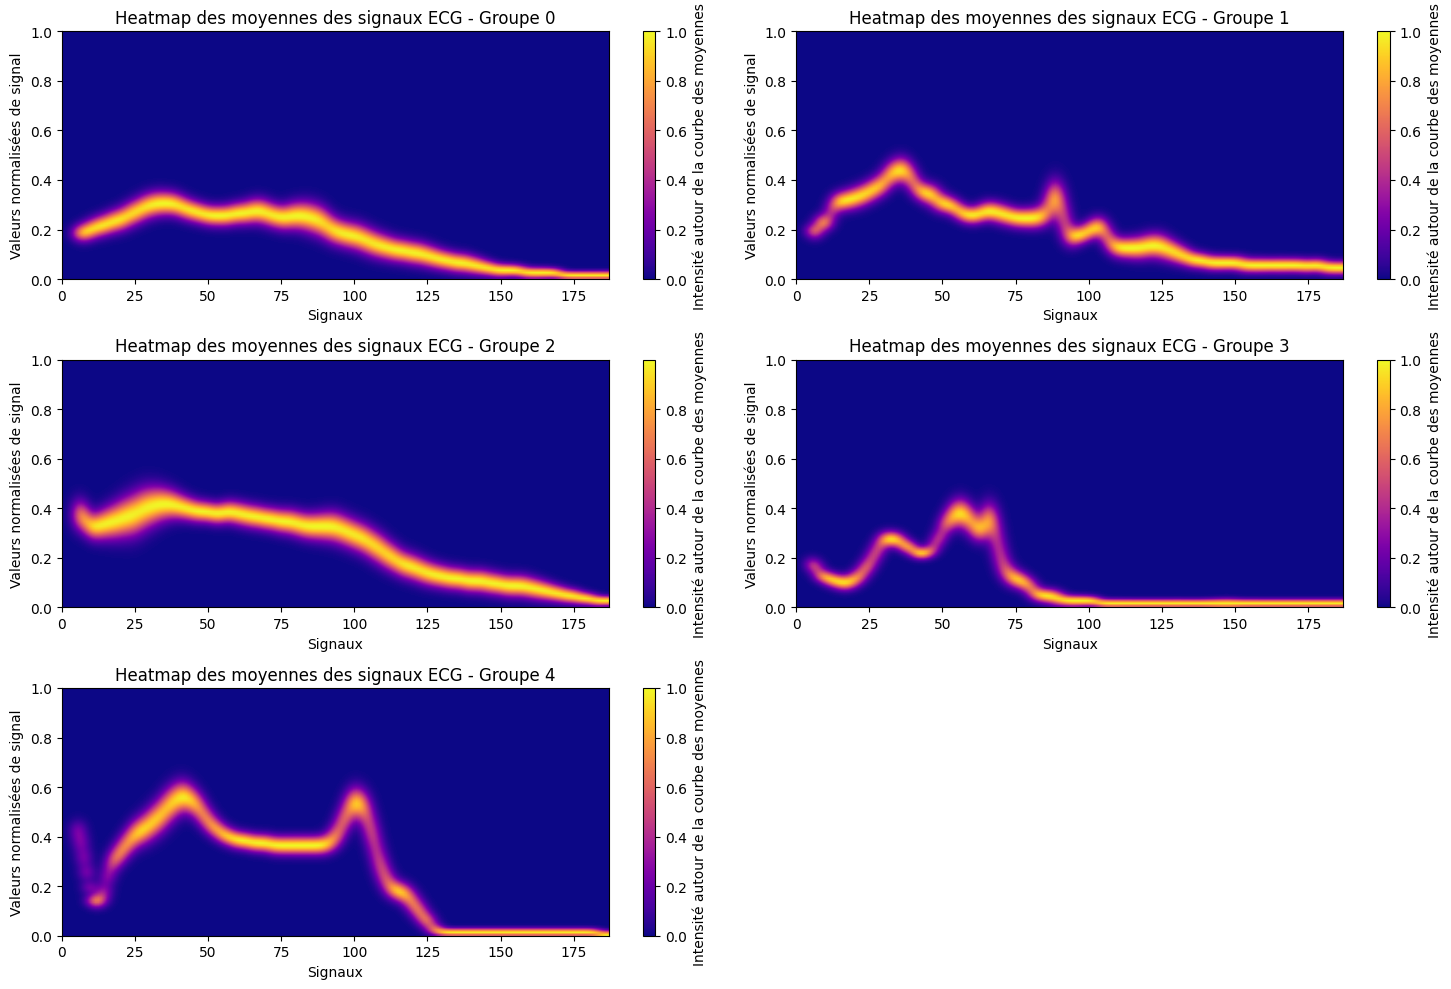

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Chargement du fichier CSV
df = pd.read_csv("Data/mitbih_fus.csv")

# Assurer un nom lisible pour chaque colonne de signal et la dernière colonne 'Groupe'
df.columns = [*df.columns[:-1], 'Groupe']

# Initialisation de la heatmap avec une taille correspondant aux signaux et à une plage de valeurs de signal
num_signaux = len(df.columns) - 1  # Exclure la colonne 'Groupe'
num_valeurs = 100  # Définir une résolution pour les valeurs de signal sur l'axe Y

# Couleurs pour la heatmap
cmap = 'plasma'

# Génération de la heatmap pour chaque groupe
group_labels = ['Groupe 0', 'Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4']
plt.figure(figsize=(15, 10))

for idx, group in enumerate(df['Groupe'].unique()):
    heatmap_data = np.zeros((num_valeurs, num_signaux))  # Réinitialiser la matrice pour chaque groupe
    
    # Filtrer les données pour le groupe actuel
    groupe_data = df[df['Groupe'] == group]
    moyenne_par_signal = groupe_data.drop(columns=['Groupe']).mean().iloc[5:]  # Exclure les 5 premières moyennes
    ecart_type_par_signal = groupe_data.drop(columns=['Groupe']).std().iloc[5:]  # Exclure les 5 premiers écarts-types
    
    # Calcul de la heatmap en fonction de la dispersion pour le groupe actuel
    for i, (val, std) in enumerate(zip(moyenne_par_signal, ecart_type_par_signal), start=5):
        y_position = int((1 - val) * (num_valeurs - 1))  # Inverser la position Y pour la bonne orientation
        if 0 <= y_position < num_valeurs:
            # Augmenter la diffusion locale
            sigma_local = max(1, std * 15)  # Intensifier le flou local
            heatmap_data[:, i] += np.exp(-0.5 * ((np.arange(num_valeurs) - y_position) / sigma_local) ** 2)
    
    # Appliquer un flou global pour lisser l'image finale avec une intensité plus forte
    heatmap_data = gaussian_filter1d(heatmap_data, sigma=2, axis=1)  # Augmenter le sigma global
    
    # Afficher la heatmap pour le groupe actuel
    plt.subplot(3, 2, idx + 1)
    plt.imshow(heatmap_data, aspect='auto', cmap=cmap, interpolation='bilinear',
               extent=[0, num_signaux, 0, 1])
    plt.colorbar(label="Intensité autour de la courbe des moyennes")
    plt.xlabel("Signaux")
    plt.ylabel("Valeurs normalisées de signal")
    plt.title(f"Heatmap des moyennes des signaux ECG - {group_labels[idx]}")
    plt.grid(False)

plt.tight_layout()
plt.show()


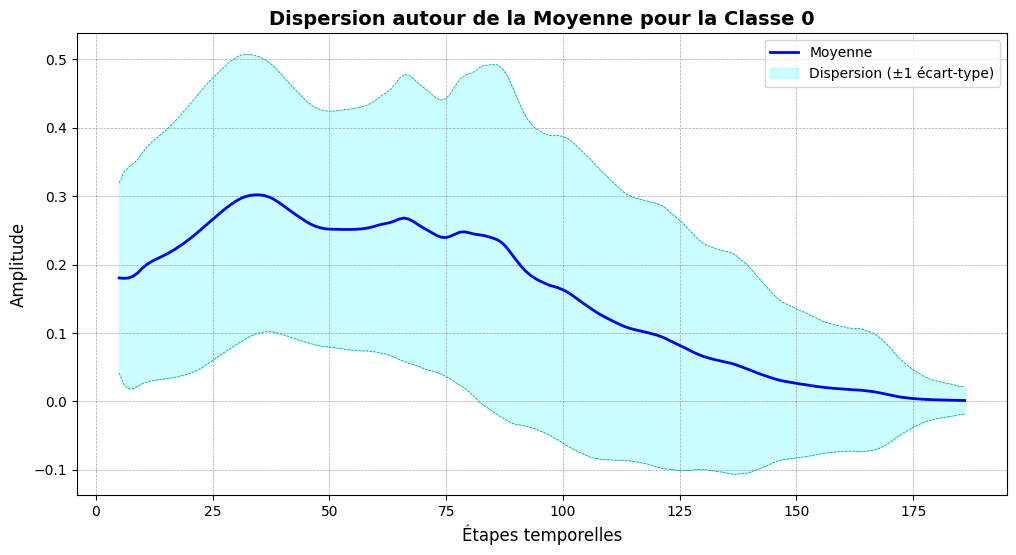

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Chargement du fichier CSV
df = pd.read_csv("Data/mitbih_fus.csv", header=None)  # Assurez-vous que le chemin est correct

def plot_dispersion(class_number, size, min_):
    # Extraire les signaux de la classe sélectionnée, en ignorant les cinq premières colonnes
    cumul = df.loc[df[187] == class_number].values  # Assurez-vous que la colonne 187 contient les classes
    cumul = cumul[:, min_ + 5:size]  # Commence à la 5ème colonne pour exclure les 5 premières
    
    # Calculer la moyenne et l'écart-type pour chaque point de temps
    mean_signal = np.mean(cumul, axis=0)
    std_signal = np.std(cumul, axis=0)
    
    # Créer les plages de temps, en commençant à partir de `min_ + 5` pour correspondre aux colonnes extraites
    time_steps = np.arange(min_ + 5, size)
    
    # Tracer la moyenne et l'intervalle de dispersion autour de la moyenne
    plt.figure(figsize=(12, 6))
    plt.plot(time_steps, mean_signal, color='blue', linewidth=2, label='Moyenne')
    
    # Utiliser une bordure autour de la zone de dispersion pour plus de contraste
    plt.fill_between(time_steps, mean_signal - std_signal, mean_signal + std_signal, 
                     color='cyan', alpha=0.2, label='Dispersion (±1 écart-type)')
    plt.plot(time_steps, mean_signal - std_signal, color='darkcyan', linestyle='--', linewidth=0.5)
    plt.plot(time_steps, mean_signal + std_signal, color='darkcyan', linestyle='--', linewidth=0.5)
    
    # Ajouter des labels et un titre
    plt.xlabel("Étapes temporelles", fontsize=12)
    plt.ylabel("Amplitude", fontsize=12)
    plt.title(f"Dispersion autour de la Moyenne pour la Classe {class_number}", fontsize=14, fontweight='bold')
    
    # Ajouter une grille et ajuster la légende
    plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(loc='upper right')
    
    plt.show()

# Exécuter la fonction pour une classe spécifique, en excluant les cinq premières colonnes
plot_dispersion(class_number=0, size=187, min_=0)


## Expliquer en fonction des maladies certaines caractéristiques 

(Exemple : le rythme cardiaque dure plus longtemps => changement de moyenne et de variance).

# Conclusion générale : 

Les analyses des moyennes, des variances et des corrélations des signaux ECG par groupe montrent des différences claires dans les caractéristiques de chaque type de battement cardiaque.

Groupes avec des signaux réguliers : Les groupes 0 (Normal) et 3 (Fusion Beat) affichent des moyennes et des variances faibles, ainsi que des corrélations très élevées, indiquant une grande régularité et une forte similarité entre les signaux. Le groupe 0 représente un rythme cardiaque stable, tandis que le groupe 3, bien qu’il fusionne des battements, produit des signaux uniformes et prévisibles.

Groupes avec des variations modérées : Le groupe 1 (Supraventricular Ectopic Beat) présente une variance légèrement supérieure au groupe normal, accompagnée d’une corrélation modérément élevée. Cela montre des signaux ECG un peu plus irréguliers, probablement dus aux battements supplémentaires dans les oreillettes, qui créent des variations légères mais cohérentes dans le signal.

Groupes avec des fluctuations et irrégularités marquées : Le groupe 2 (Ventricular Ectopic Beat) et le groupe 4 (Inconnu) affichent les valeurs les plus élevées en variance, signalant des fluctuations significatives dans leurs signaux ECG. Bien que le groupe 2 garde une corrélation élevée entre les paires de signaux (suggérant une structure commune dans l’irrégularité), le groupe 4 présente la variance la plus élevée avec une forte corrélation, ce qui indique des signaux diversifiés mais partiellement cohérents dans leur forme globale.


En somme, les groupes 0 et 3 représentent des battements réguliers et prévisibles, les groupes 1 et 2 affichent des irrégularités d’intensité croissante, et le groupe 4, bien que composé d’anomalies diverses, conserve une structure générale. Ces observations peuvent guider la détection automatique des types de battements et leur interprétation clinique, en identifiant facilement les groupes normaux et en isolant les groupes aux signaux plus variables pour un suivi plus poussé.

# 2. Corrélation Inter-Classe

Comparer les signaux entre classes permet de déterminer quelles classes sont plus proches ou plus éloignées les unes des autres.
Matrice de corrélation inter-classes (par DTW) : Permet d’identifier les classes qui partagent des similitudes dans les motifs, par exemple si certains battements « anormaux » ont des caractéristiques similaires aux battements normaux. Cette approche peut aider à détecter les catégories qui pourraient être regroupées ou qui montrent des caractéristiques communes.

In [9]:
import numpy as np
import pandas as pd
from dtaidistance import dtw
from scipy.stats import pearsonr

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

def aligned_pearson_correlation(signal_1, signal_2):
    """
    Calcule la corrélation de Pearson entre deux signaux ECG alignés par DTW.
    
    :param signal_1: Premier signal ECG.
    :param signal_2: Deuxième signal ECG.
    :return: Corrélation de Pearson entre les signaux alignés.
    """
    dtw_path = dtw.warping_path(signal_1, signal_2)
    aligned_signal_1 = np.array([signal_1[i] for i, j in dtw_path])
    aligned_signal_2 = np.array([signal_2[j] for i, j in dtw_path])
    corr, _ = pearsonr(aligned_signal_1, aligned_signal_2)
    return corr

def interclass_correlation_matrix(df, n_pairs=100):
    """
    Crée une matrice de corrélation inter-classes en utilisant la corrélation alignée par DTW.
    
    :param df: DataFrame contenant les signaux et les classes.
    :param n_pairs: Nombre de paires aléatoires à tirer entre chaque paire de classes.
    :return: DataFrame de la matrice de corrélation inter-classes.
    """
    classes = df['Groupe'].unique()
    correlation_matrix = pd.DataFrame(index=classes, columns=classes, dtype=float)

    # Boucle sur chaque combinaison unique de classes
    for class_a in classes:
        for class_b in classes:
            signals_a = df[df['Groupe'] == class_a].iloc[:, :-1].values
            signals_b = df[df['Groupe'] == class_b].iloc[:, :-1].values

            correlations = []
            if class_a == class_b:
                # Calculer les corrélations intra-classe
                for _ in range(n_pairs):
                    indices = np.random.choice(len(signals_a), size=2, replace=False)
                    signal_1 = signals_a[indices[0]]
                    signal_2 = signals_a[indices[1]]
                    corr = aligned_pearson_correlation(signal_1, signal_2)
                    correlations.append(corr)
            else:
                # Calculer les corrélations inter-classes
                for _ in range(n_pairs):
                    signal_1 = signals_a[np.random.randint(len(signals_a))]
                    signal_2 = signals_b[np.random.randint(len(signals_b))]
                    corr = aligned_pearson_correlation(signal_1, signal_2)
                    correlations.append(corr)

            # Calculer la corrélation moyenne et l'insérer dans la matrice
            correlation_matrix.loc[class_a, class_b] = np.mean(correlations)

    return correlation_matrix


# Exécution principale
if __name__ == "__main__":
    # Générer la matrice de corrélation inter-classes
    correlation_matrix = interclass_correlation_matrix(train_df, n_pairs=100)
    print("Matrice de corrélation inter-classes :")
    print(correlation_matrix)


Matrice de corrélation inter-classes :
          0.0       1.0       2.0       3.0       4.0
0.0  0.949387  0.931258  0.930808  0.957159  0.947305
1.0  0.901876  0.903477  0.905345  0.915086  0.905234
2.0  0.932373  0.909003  0.929919  0.937027  0.933648
3.0  0.956076  0.900853  0.925526  0.970608  0.960734
4.0  0.948376  0.899399  0.932746  0.957720  0.958886


In [10]:
import numpy as np
import pandas as pd
from dtaidistance import dtw

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

def average_dtw_distance(signal_1, signal_2):
    """
    Calcule la distance DTW entre deux signaux ECG.
    
    :param signal_1: Premier signal ECG.
    :param signal_2: Deuxième signal ECG.
    :return: Distance DTW entre les signaux.
    """
    distance = dtw.distance(signal_1, signal_2)
    return distance

def interclass_dtw_distance_matrix(df, n_pairs=100):
    """
    Crée une matrice de distance DTW inter-classes en utilisant la moyenne des distances DTW.
    
    :param df: DataFrame contenant les signaux et les classes.
    :param n_pairs: Nombre de paires aléatoires à tirer entre chaque paire de classes.
    :return: DataFrame de la matrice de distance DTW inter-classes.
    """
    classes = df['Groupe'].unique()
    distance_matrix = pd.DataFrame(index=classes, columns=classes, dtype=float)

    # Boucle sur chaque combinaison unique de classes
    for class_a in classes:
        for class_b in classes:
            signals_a = df[df['Groupe'] == class_a].iloc[:, :-1].values
            signals_b = df[df['Groupe'] == class_b].iloc[:, :-1].values

            distances = []
            if class_a == class_b:
                # Calculer les distances intra-classe
                for _ in range(n_pairs):
                    indices = np.random.choice(len(signals_a), size=2, replace=False)
                    signal_1 = signals_a[indices[0]]
                    signal_2 = signals_a[indices[1]]
                    distance = average_dtw_distance(signal_1, signal_2)
                    distances.append(distance)
            else:
                # Calculer les distances inter-classes
                for _ in range(n_pairs):
                    signal_1 = signals_a[np.random.randint(len(signals_a))]
                    signal_2 = signals_b[np.random.randint(len(signals_b))]
                    distance = average_dtw_distance(signal_1, signal_2)
                    distances.append(distance)

            # Calculer la distance DTW moyenne et l'insérer dans la matrice
            distance_matrix.loc[class_a, class_b] = np.mean(distances)

    return distance_matrix

# Exécution principale
if __name__ == "__main__":
    # Générer la matrice de distance DTW inter-classes
    distance_matrix = interclass_dtw_distance_matrix(train_df, n_pairs=100)
    print("Matrice de distance DTW inter-classes :")
    print(distance_matrix)


Matrice de distance DTW inter-classes :
          0.0       1.0       2.0       3.0       4.0
0.0  1.132750  1.266739  1.364178  0.970822  1.286677
1.0  1.253765  1.457724  1.559070  1.350540  1.459362
2.0  1.293582  1.584431  1.667525  1.409092  1.433622
3.0  0.957666  1.271830  1.319651  0.638043  1.161293
4.0  1.219770  1.480661  1.387615  1.115525  1.110383


In [16]:
import numpy as np
import pandas as pd
from dtaidistance import dtw
from scipy.stats import pearsonr

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

def aligned_pearson_correlation(signal_1, signal_2):
    """
    Calcule la corrélation de Pearson entre deux signaux ECG alignés par DTW.
    
    :param signal_1: Premier signal ECG.
    :param signal_2: Deuxième signal ECG.
    :return: Corrélation de Pearson entre les signaux alignés.
    """
    # Utiliser DTW pour obtenir les indices alignés
    dtw_path = dtw.warping_path(signal_1, signal_2)

    # Créer des tableaux pour les signaux alignés
    aligned_signal_1 = np.array([signal_1[i] for i, j in dtw_path])
    aligned_signal_2 = np.array([signal_2[j] for i, j in dtw_path])
    
    # Calculer la corrélation de Pearson entre les signaux alignés
    corr, _ = pearsonr(aligned_signal_1, aligned_signal_2)
    
    return corr

def random_pair_correlation(class_number_1, class_number_2, n):
    """
    Tire aléatoirement n paires de signaux appartenant à deux classes différentes et calcule la corrélation alignée.
    
    :param class_number_1: Numéro de la première classe.
    :param class_number_2: Numéro de la deuxième classe.
    :param n: Nombre de paires de signaux à tirer.
    :return: Moyenne des corrélations pour chaque paire.
    """
    # Extraire les signaux des classes spécifiées
    signals_class_1 = train_df[train_df['Groupe'] == class_number_1].iloc[:, :-1].values
    signals_class_2 = train_df[train_df['Groupe'] == class_number_2].iloc[:, :-1].values

    # Vérifier qu'il y a suffisamment de signaux pour tirer n paires
    if signals_class_1.shape[0] < 1 or signals_class_2.shape[0] < 1 or n > min(signals_class_1.shape[0], signals_class_2.shape[0]):
        raise ValueError("Pas assez de signaux pour tirer n paires.")

    correlations = []

    # Tirer n paires de signaux aléatoirement
    for _ in range(n):
        signal_1 = signals_class_1[np.random.choice(signals_class_1.shape[0])]  # Sélectionner un signal de la première classe
        signal_2 = signals_class_2[np.random.choice(signals_class_2.shape[0])]  # Sélectionner un signal de la deuxième classe

        # Calculer la corrélation alignée et l'ajouter à la liste
        corr = aligned_pearson_correlation(signal_1, signal_2)
        correlations.append(corr)

    # Calculer la moyenne des corrélations
    mean_correlation = np.mean(correlations)
    return mean_correlation

def interclass_correlation_matrix(df, n_pairs=100):
    """
    Crée une matrice de corrélation inter-classes en utilisant la moyenne des corrélations alignées par DTW.
    
    :param df: DataFrame contenant les signaux et les classes.
    :param n_pairs: Nombre de paires de signaux à tirer entre chaque paire de classes.
    :return: DataFrame de la matrice de corrélation inter-classes.
    """
    classes = df['Groupe'].unique()
    correlation_matrix = pd.DataFrame(index=classes, columns=classes, dtype=float)

    for class_a in classes:
        for class_b in classes:
            correlation_matrix.loc[class_a, class_b] = random_pair_correlation(class_a, class_b, n_pairs)

    return correlation_matrix

# Exécution principale
if __name__ == "__main__":
    # Nombre de paires aléatoires à tirer entre chaque paire de classes
    n_pairs = 100

    # Générer la matrice de corrélation inter-classes
    correlation_matrix = interclass_correlation_matrix(train_df, n_pairs)
    print("Matrice de corrélation inter-classes :")
    print(correlation_matrix)


Matrice de corrélation inter-classes :
          0.0       1.0       2.0       3.0       4.0
0.0  0.943049  0.915407  0.937294  0.957313  0.944624
1.0  0.924929  0.890705  0.906849  0.922650  0.912069
2.0  0.918828  0.900467  0.909734  0.935405  0.935088
3.0  0.957245  0.919580  0.933227  0.970838  0.959501
4.0  0.944779  0.926512  0.930724  0.959665  0.964189


In [19]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

def pearson_correlation(signal_1, signal_2):
    """
    Calcule la corrélation de Pearson entre deux signaux.
    
    :param signal_1: Premier signal ECG.
    :param signal_2: Deuxième signal ECG.
    :return: Corrélation de Pearson entre les signaux.
    """
    corr, _ = pearsonr(signal_1, signal_2)
    return corr

def random_pair_correlation(class_number_1, class_number_2, n):
    """
    Tire aléatoirement n paires de signaux appartenant à deux classes différentes et calcule la corrélation.
    
    :param class_number_1: Numéro de la première classe.
    :param class_number_2: Numéro de la deuxième classe.
    :param n: Nombre de paires de signaux à tirer.
    :return: Moyenne des corrélations pour chaque paire.
    """
    # Extraire les signaux des classes spécifiées
    signals_class_1 = train_df.loc[train_df['Groupe'] == class_number_1].iloc[:, :-1].values
    signals_class_2 = train_df.loc[train_df['Groupe'] == class_number_2].iloc[:, :-1].values

    # Vérifier qu'il y a suffisamment de signaux pour tirer n paires
    if signals_class_1.shape[0] < 1 or signals_class_2.shape[0] < 1 or n > min(signals_class_1.shape[0], signals_class_2.shape[0]):
        raise ValueError("Pas assez de signaux pour tirer n paires.")

    correlations = []

    # Tirer n paires de signaux aléatoirement
    for _ in range(n):
        signal_1 = signals_class_1[np.random.choice(signals_class_1.shape[0])]  # Sélectionner un signal de la première classe
        signal_2 = signals_class_2[np.random.choice(signals_class_2.shape[0])]  # Sélectionner un signal de la deuxième classe

        # Calculer la corrélation et l'ajouter à la liste
        corr = pearson_correlation(signal_1, signal_2)
        correlations.append(corr)

    # Calculer la moyenne des corrélations
    mean_correlation = np.mean(correlations)
    return mean_correlation

def interclass_correlation_matrix(df, n_pairs=100):
    """
    Crée une matrice de corrélation inter-classes en utilisant la moyenne des corrélations de Pearson.
    
    :param df: DataFrame contenant les signaux et les classes.
    :param n_pairs: Nombre de paires de signaux à tirer entre chaque paire de classes.
    :return: DataFrame de la matrice de corrélation inter-classes.
    """
    classes = df['Groupe'].unique()
    correlation_matrix = pd.DataFrame(index=classes, columns=classes, dtype=float)

    for class_a in classes:
        for class_b in classes:
            correlation_matrix.loc[class_a, class_b] = random_pair_correlation(class_a, class_b, n_pairs)

    return correlation_matrix

# Exécution principale
if __name__ == "__main__":
    # Nombre de paires aléatoires à tirer entre chaque paire de classes
    n_pairs = 100

    # Générer la matrice de corrélation inter-classes
    correlation_matrix = interclass_correlation_matrix(train_df, n_pairs)
    print("Matrice de corrélation inter-classes sans alignement DTW :")
    print(correlation_matrix)


Matrice de corrélation inter-classes sans alignement DTW :
          0.0       1.0       2.0       3.0       4.0
0.0  0.445527  0.448262  0.389428  0.461118  0.500435
1.0  0.429559  0.474088  0.367016  0.450364  0.438135
2.0  0.342298  0.306280  0.343842  0.393513  0.462676
3.0  0.461460  0.447535  0.401709  0.696955  0.483642
4.0  0.501662  0.480410  0.470373  0.482312  0.716281


Matrice de corrélation inter-classes sans alignement DTW :
          0.0       1.0       2.0       3.0       4.0
0.0  0.459174  0.463113  0.337052  0.485491  0.482551
1.0  0.467921  0.450072  0.331709  0.466383  0.450901
2.0  0.362262  0.382010  0.349585  0.399400  0.416943
3.0  0.482294  0.461809  0.386002  0.675054  0.470086
4.0  0.481235  0.446966  0.477115  0.460108  0.738055


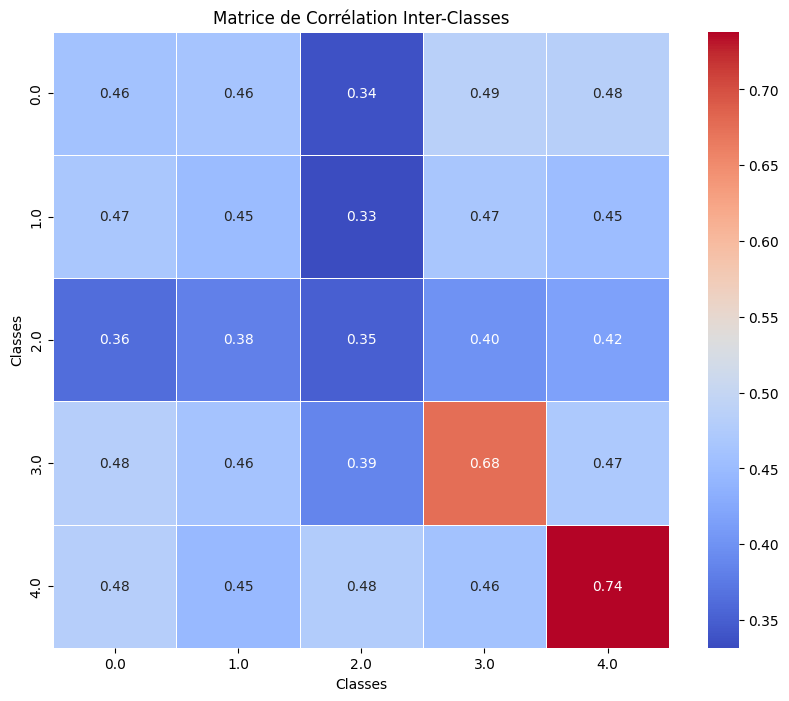

In [32]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

def pearson_correlation(signal_1, signal_2):
    """
    Calcule la corrélation de Pearson entre deux signaux.
    """
    corr, _ = pearsonr(signal_1, signal_2)
    return corr

def random_pair_correlation(class_number_1, class_number_2, n):
    """
    Tire aléatoirement n paires de signaux appartenant à deux classes différentes et calcule la corrélation.
    """
    signals_class_1 = train_df.loc[train_df['Groupe'] == class_number_1].iloc[:, :-1].values
    signals_class_2 = train_df.loc[train_df['Groupe'] == class_number_2].iloc[:, :-1].values

    if signals_class_1.shape[0] < 1 or signals_class_2.shape[0] < 1 or n > min(signals_class_1.shape[0], signals_class_2.shape[0]):
        raise ValueError("Pas assez de signaux pour tirer n paires.")

    correlations = []
    for _ in range(n):
        signal_1 = signals_class_1[np.random.choice(signals_class_1.shape[0])]
        signal_2 = signals_class_2[np.random.choice(signals_class_2.shape[0])]
        corr = pearson_correlation(signal_1, signal_2)
        correlations.append(corr)

    mean_correlation = np.mean(correlations)
    return mean_correlation

def interclass_correlation_matrix(df, n_pairs=100):
    """
    Crée une matrice de corrélation inter-classes en utilisant la moyenne des corrélations de Pearson.
    """
    classes = df['Groupe'].unique()
    correlation_matrix = pd.DataFrame(index=classes, columns=classes, dtype=float)

    for class_a in classes:
        for class_b in classes:
            correlation_matrix.loc[class_a, class_b] = random_pair_correlation(class_a, class_b, n_pairs)

    return correlation_matrix

def plot_correlation_matrix(correlation_matrix):
    """
    Affiche une matrice de corrélation sous forme de graphique coloré.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar=True,
        square=True,
        linewidths=0.5
    )
    plt.title("Matrice de Corrélation Inter-Classes")
    plt.xlabel("Classes")
    plt.ylabel("Classes")
    plt.show()

# Exécution principale
if __name__ == "__main__":
    # Nombre de paires aléatoires à tirer entre chaque paire de classes
    n_pairs = 100

    # Générer la matrice de corrélation inter-classes
    correlation_matrix = interclass_correlation_matrix(train_df, n_pairs)

    # Afficher la matrice de corrélation
    print("Matrice de corrélation inter-classes sans alignement DTW :")
    print(correlation_matrix)

    # Visualiser la matrice de corrélation
    plot_correlation_matrix(correlation_matrix)


In [21]:
import numpy as np
import pandas as pd
from dtaidistance import dtw
from scipy.stats import pearsonr
from multiprocessing import Pool, cpu_count

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

def align_signals_within_class(signals):
    """
    Aligne tous les signaux d'une classe avec un signal de référence (médiane approximée) en utilisant DTW.
    """
    # Sélectionner un sous-ensemble pour calculer un signal de référence approximatif
    sample_signals = signals[np.random.choice(signals.shape[0], min(50, signals.shape[0]), replace=False)]
    reference_signal = np.median(sample_signals, axis=0)

    aligned_signals = []
    for signal in signals:
        path = dtw.warping_path(reference_signal, signal)
        aligned_signal = np.array([signal[j] for i, j in path])
        aligned_signals.append(aligned_signal)
    
    return np.array(aligned_signals)

def preprocess_signals_by_class(df):
    """
    Aligne les signaux intra-classe pour chaque classe et retourne un DataFrame avec les signaux alignés.
    """
    aligned_df = pd.DataFrame()
    
    for class_number in df['Groupe'].unique():
        signals = df[df['Groupe'] == class_number].iloc[:, :-1].values
        aligned_signals = align_signals_within_class(signals)
        aligned_class_df = pd.DataFrame(aligned_signals, columns=[f'Signal_{i}' for i in range(1, aligned_signals.shape[1] + 1)])
        aligned_class_df['Groupe'] = class_number
        aligned_df = pd.concat([aligned_df, aligned_class_df], ignore_index=True)
    
    return aligned_df

def pearson_correlation(signal_1, signal_2):
    """
    Calcule la corrélation de Pearson entre deux signaux.
    """
    corr, _ = pearsonr(signal_1, signal_2)
    return corr

def random_pair_correlation(params):
    """
    Tire aléatoirement un sous-ensemble de paires de signaux et calcule la corrélation de Pearson moyenne.
    """
    class_number_1, class_number_2, aligned_df, n = params
    signals_class_1 = aligned_df[aligned_df['Groupe'] == class_number_1].iloc[:, :-1].values
    signals_class_2 = aligned_df[aligned_df['Groupe'] == class_number_2].iloc[:, :-1].values

    if signals_class_1.shape[0] < 1 or signals_class_2.shape[0] < 1 or n > min(signals_class_1.shape[0], signals_class_2.shape[0]):
        return np.nan

    correlations = []
    for _ in range(n):
        signal_1 = signals_class_1[np.random.choice(signals_class_1.shape[0])]
        signal_2 = signals_class_2[np.random.choice(signals_class_2.shape[0])]
        corr = pearson_correlation(signal_1, signal_2)
        correlations.append(corr)

    mean_correlation = np.mean(correlations)
    return mean_correlation

def interclass_correlation_matrix(aligned_df, n_pairs=50):
    """
    Crée une matrice de corrélation inter-classes avec multiprocessing pour accélérer les calculs.
    """
    classes = aligned_df['Groupe'].unique()
    params = [(class_a, class_b, aligned_df, n_pairs) for class_a in classes for class_b in classes]
    
    # Utiliser Pool pour paralléliser les calculs
    with Pool(cpu_count()) as pool:
        results = pool.map(random_pair_correlation, params)

    # Restructurer les résultats dans une matrice carrée
    correlation_matrix = pd.DataFrame(np.array(results).reshape(len(classes), len(classes)), index=classes, columns=classes)
    return correlation_matrix

# Exécution principale
if __name__ == "__main__":
    n_pairs = 50  # Réduction du nombre de paires pour optimiser le calcul

    # Étape 1 : Aligner les signaux intra-classe
    aligned_df = preprocess_signals_by_class(train_df)

    # Étape 2 : Générer la matrice de corrélation inter-classes
    correlation_matrix = interclass_correlation_matrix(aligned_df, n_pairs)
    print("Matrice de corrélation inter-classes avec alignement intra-classe préalable (optimisé) :")
    print(correlation_matrix)


KeyboardInterrupt: 

In [23]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.utils import resample

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

def downsample_signal(signal, factor=2):
    """
    Sous-échantillonne un signal en prenant une valeur sur 'factor'.
    """
    return signal[::factor]

def calculate_representative_signals(df, group_col='Groupe', sample_size=10, downsample_factor=2):
    """
    Calcule des signaux représentatifs pour chaque classe avec sous-échantillonnage.
    """
    representative_signals = {}
    for class_number in df[group_col].unique():
        signals = df[df[group_col] == class_number].iloc[:, :-1].values
        sampled_signals = resample(signals, n_samples=sample_size, random_state=42)
        downsampled_signals = np.array([downsample_signal(signal, downsample_factor) for signal in sampled_signals])
        representative_signals[class_number] = np.mean(downsampled_signals, axis=0)
    return representative_signals

def pearson_correlation(signal_1, signal_2):
    """
    Calcule la corrélation de Pearson entre deux signaux.
    """
    corr, _ = pearsonr(signal_1, signal_2)
    return corr

def interclass_correlation_matrix(representative_signals):
    """
    Crée une matrice de corrélation inter-classes en utilisant les signaux représentatifs.
    """
    classes = list(representative_signals.keys())
    correlation_matrix = pd.DataFrame(index=classes, columns=classes, dtype=float)

    for i, class_a in enumerate(classes):
        for class_b in classes[i:]:  # Optimisation : éviter les calculs en double
            corr = pearson_correlation(representative_signals[class_a], representative_signals[class_b])
            correlation_matrix.loc[class_a, class_b] = corr
            correlation_matrix.loc[class_b, class_a] = corr  # Symétrie de la matrice

    return correlation_matrix

# Exécution principale
if __name__ == "__main__":
    # Paramètres
    downsample_factor = 2  # Facteur de sous-échantillonnage
    sample_size = 100       # Nombre de signaux représentatifs par classe

    # Calcul des signaux représentatifs avec sous-échantillonnage
    representative_signals = calculate_representative_signals(train_df, sample_size=sample_size, downsample_factor=downsample_factor)

    # Générer la matrice de corrélation inter-classes
    correlation_matrix = interclass_correlation_matrix(representative_signals)
    print("Matrice de corrélation inter-classes optimisée avec signaux représentatifs et sous-échantillonnage :")
    print(correlation_matrix)


Matrice de corrélation inter-classes optimisée avec signaux représentatifs et sous-échantillonnage :
          0.0       1.0       2.0       3.0       4.0
0.0  1.000000  0.951127  0.891906  0.873130  0.857293
1.0  0.951127  1.000000  0.893881  0.791808  0.848168
2.0  0.891906  0.893881  1.000000  0.779901  0.899703
3.0  0.873130  0.791808  0.779901  1.000000  0.698828
4.0  0.857293  0.848168  0.899703  0.698828  1.000000


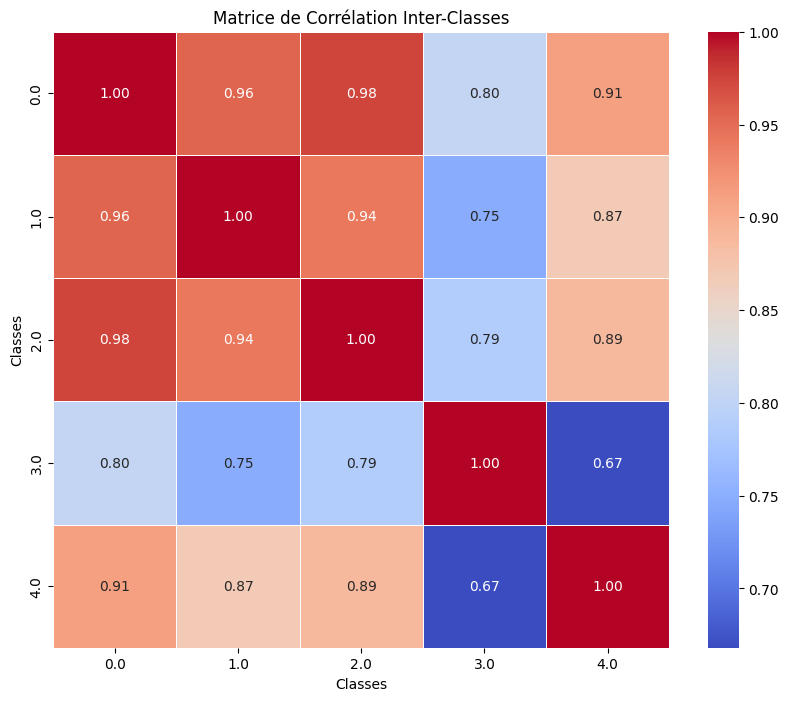

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.utils import resample

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Retirer les cinq premières colonnes
train_df = train_df.iloc[:, 5:]

def downsample_signal(signal, factor=2):
    """
    Sous-échantillonne un signal en prenant une valeur sur 'factor'.
    """
    return signal[::factor]

def calculate_representative_signals(df, group_col='Groupe', sample_size=10, downsample_factor=2):
    """
    Calcule des signaux représentatifs pour chaque classe avec sous-échantillonnage.
    """
    representative_signals = {}
    for class_number in df[group_col].unique():
        signals = df[df[group_col] == class_number].iloc[:, :-1].values
        sampled_signals = resample(signals, n_samples=sample_size, random_state=42)
        downsampled_signals = np.array([downsample_signal(signal, downsample_factor) for signal in sampled_signals])
        representative_signals[class_number] = np.mean(downsampled_signals, axis=0)
    return representative_signals

def pearson_correlation(signal_1, signal_2):
    """
    Calcule la corrélation de Pearson entre deux signaux.
    """
    corr, _ = pearsonr(signal_1, signal_2)
    return corr

def interclass_correlation_matrix(representative_signals):
    """
    Crée une matrice de corrélation inter-classes en utilisant les signaux représentatifs.
    """
    classes = list(representative_signals.keys())
    correlation_matrix = pd.DataFrame(index=classes, columns=classes, dtype=float)

    for i, class_a in enumerate(classes):
        for class_b in classes[i:]:  # Optimisation : éviter les calculs en double
            corr = pearson_correlation(representative_signals[class_a], representative_signals[class_b])
            correlation_matrix.loc[class_a, class_b] = corr
            correlation_matrix.loc[class_b, class_a] = corr  # Symétrie de la matrice

    return correlation_matrix

def plot_correlation_matrix(correlation_matrix):
    """
    Affiche une matrice de corrélation sous forme de graphique coloré.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar=True,
        square=True,
        linewidths=0.5
    )
    plt.title("Matrice de Corrélation Inter-Classes")
    plt.xlabel("Classes")
    plt.ylabel("Classes")
    plt.show()

# Exécution principale
if __name__ == "__main__":
    # Paramètres
    downsample_factor = 2  # Facteur de sous-échantillonnage
    sample_size = 100      # Nombre de signaux représentatifs par classe

    # Calcul des signaux représentatifs avec sous-échantillonnage
    representative_signals = calculate_representative_signals(train_df, sample_size=sample_size, downsample_factor=downsample_factor)

    # Générer la matrice de corrélation inter-classes
    correlation_matrix = interclass_correlation_matrix(representative_signals)

    # Afficher la matrice colorée
    plot_correlation_matrix(correlation_matrix)


Matrice de corrélation inter-classes alignées par DTW :
          0         1         2         3         4
0  0.916894  0.907813  0.902235  0.918588  0.927996
1  0.907813  0.889437  0.877968  0.887049  0.879176
2  0.902235  0.877968  0.905332  0.915770  0.919886
3  0.918588  0.887049  0.915770  0.933719  0.944783
4  0.927996  0.879176  0.919886  0.944783  0.954018


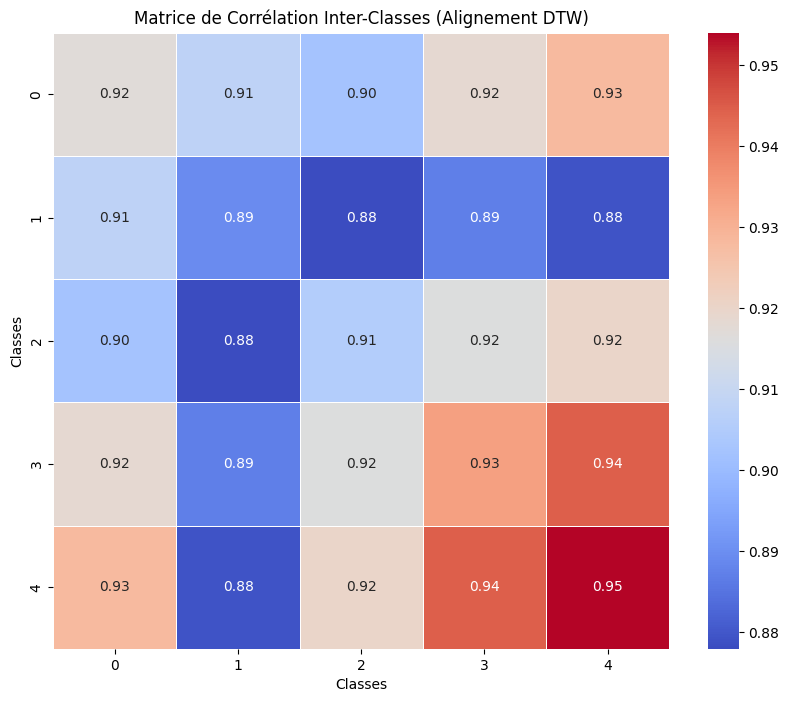

In [21]:
import numpy as np
import pandas as pd
from dtaidistance import dtw
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données ECG avec gestion des longueurs variables
file_path = "cleaned_mitbih_fus.csv"
data = []
classes = []

try:
    with open(file_path, 'r') as file:
        for idx, line in enumerate(file):
            row = line.strip().split(',')
            try:
                # Vérifiez que la ligne n'est pas vide et a au moins deux colonnes
                if len(row) < 2:
                    continue

                # La dernière colonne contient la classe
                class_label = float(row[-1].strip())  # Convertir en float pour gérer les notations scientifiques
                class_label = int(class_label)  # Convertir ensuite en int

                # Charger les signaux et exclure les zéros
                signal = [float(x.strip()) for x in row[:-1] if x.strip() != '' and x.strip() != '0']

                # Ajouter uniquement si le signal contient des valeurs
                if len(signal) > 0:
                    data.append(signal)
                    classes.append(class_label)
            except ValueError:
                continue  # Ignorer les lignes mal formatées

    # Vérifiez si des données ont été chargées
    if len(data) == 0:
        raise ValueError("Le fichier est vide ou aucune ligne valide n'a été trouvée.")

    # Trouver la longueur maximale des signaux
    max_length = max(len(signal) for signal in data)

    # Compléter les signaux courts avec des zéros
    padded_data = [signal + [0] * (max_length - len(signal)) for signal in data]
    df = pd.DataFrame(padded_data)
    df['Groupe'] = classes  # Ajouter la colonne des classes

    # Supprimer les cinq premières colonnes
    df = df.iloc[:, 5:]  # Garder uniquement les colonnes après les cinq premières

except FileNotFoundError:
    print(f"Erreur : Le fichier '{file_path}' est introuvable.")
except ValueError as e:
    print(f"Erreur : {e}")

# Fonction pour aligner deux signaux avec DTW
def align_signals_with_dtw(signal_1, signal_2):
    """
    Aligne deux signaux à l'aide de DTW.
    """
    path = dtw.warping_path(signal_1, signal_2)
    aligned_signal_1 = np.array([signal_1[i] for i, j in path])
    aligned_signal_2 = np.array([signal_2[j] for i, j in path])
    return aligned_signal_1, aligned_signal_2

# Calcul de la corrélation alignée
def aligned_pearson_correlation(signal_1, signal_2):
    """
    Calcule la corrélation de Pearson entre deux signaux alignés avec DTW.
    """
    aligned_signal_1, aligned_signal_2 = align_signals_with_dtw(signal_1, signal_2)
    corr, _ = pearsonr(aligned_signal_1, aligned_signal_2)
    return corr

# Calcul de la corrélation entre deux classes
def interclass_correlation(class_a, class_b, n):
    """
    Calcule la corrélation entre deux classes à l'aide d'échantillons alignés par DTW.
    """
    # Extraire les signaux des classes
    signals_a = df[df['Groupe'] == class_a].iloc[:, :-1].values
    signals_b = df[df['Groupe'] == class_b].iloc[:, :-1].values

    # Vérifier qu'il y a suffisamment de signaux
    if len(signals_a) < 1 or len(signals_b) < 1:
        raise ValueError("Pas assez de signaux dans une des classes pour effectuer la corrélation.")

    correlations = []
    for _ in range(n):
        signal_a = signals_a[np.random.choice(len(signals_a))]
        signal_b = signals_b[np.random.choice(len(signals_b))]
        corr = aligned_pearson_correlation(signal_a, signal_b)
        correlations.append(corr)
    return np.mean(correlations)

# Construction de la matrice de corrélation
def interclass_correlation_matrix(df, n=10):
    """
    Crée une matrice de corrélation inter-classes en utilisant des paires alignées par DTW.
    """
    classes = df['Groupe'].unique()
    correlation_matrix = pd.DataFrame(index=classes, columns=classes, dtype=float)

    for i, class_a in enumerate(classes):
        for class_b in classes[i:]:  # Calculer uniquement pour la partie supérieure
            try:
                mean_corr = interclass_correlation(class_a, class_b, n)
                correlation_matrix.loc[class_a, class_b] = mean_corr
                correlation_matrix.loc[class_b, class_a] = mean_corr  # Symétrie de la matrice
            except ValueError as e:
                print(f"Erreur entre les classes {class_a} et {class_b}: {e}")
                correlation_matrix.loc[class_a, class_b] = np.nan
                correlation_matrix.loc[class_b, class_a] = np.nan

    return correlation_matrix

# Exécution principale
if __name__ == "__main__":
    n_pairs = 50  # Nombre de paires aléatoires par combinaison de classes

    # Générer la matrice de corrélation inter-classes
    correlation_matrix = interclass_correlation_matrix(df, n=n_pairs)
    print("Matrice de corrélation inter-classes alignées par DTW :")
    print(correlation_matrix)

    # Visualiser la matrice avec seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar=True,
        square=True,
        linewidths=0.5
    )
    plt.title("Matrice de Corrélation Inter-Classes (Alignement DTW)")
    plt.xlabel("Classes")
    plt.ylabel("Classes")
    plt.show()


          0.0       1.0       2.0       3.0       4.0
0.0  1.000000  0.955619  0.975108  0.804362  0.911566
1.0  0.955619  1.000000  0.942180  0.747872  0.868151
2.0  0.975108  0.942180  1.000000  0.786967  0.888275
3.0  0.804362  0.747872  0.786967  1.000000  0.668056
4.0  0.911566  0.868151  0.888275  0.668056  1.000000


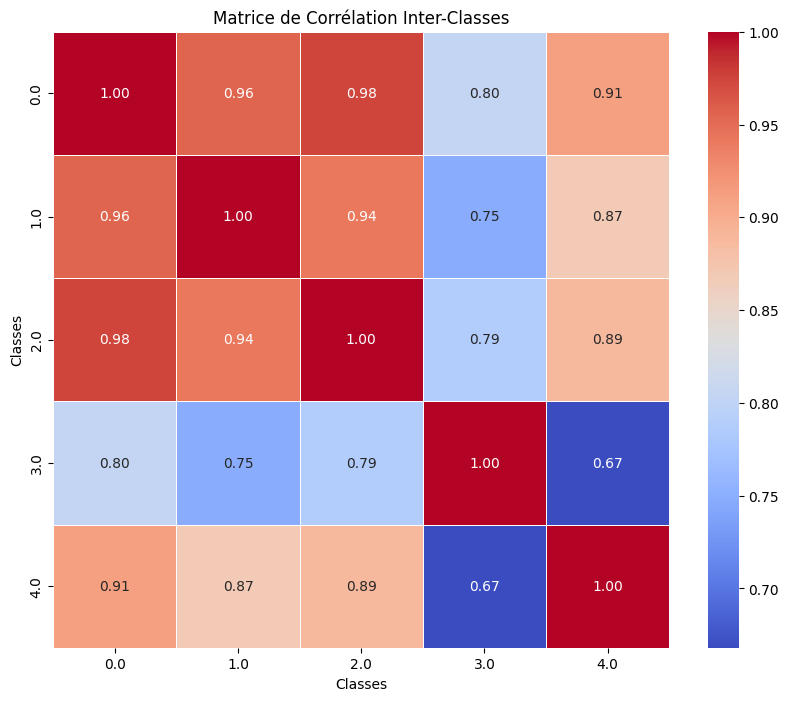

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.utils import resample

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Retirer les cinq premières colonnes
train_df = train_df.iloc[:, 5:]

def downsample_signal(signal, factor=2):
    """
    Sous-échantillonne un signal en prenant une valeur sur 'factor'.
    """
    return signal[::factor]

def calculate_representative_signals(df, group_col='Groupe', sample_size=10, downsample_factor=2):
    """
    Calcule des signaux représentatifs pour chaque classe avec sous-échantillonnage.
    """
    representative_signals = {}
    for class_number in df[group_col].unique():
        signals = df[df[group_col] == class_number].iloc[:, :-1].values
        sampled_signals = resample(signals, n_samples=sample_size, random_state=42)
        downsampled_signals = np.array([downsample_signal(signal, downsample_factor) for signal in sampled_signals])
        representative_signals[class_number] = np.mean(downsampled_signals, axis=0)
    return representative_signals

def pearson_correlation(signal_1, signal_2):
    """
    Calcule la corrélation de Pearson entre deux signaux.
    """
    corr, _ = pearsonr(signal_1, signal_2)
    return corr

def interclass_correlation_matrix(representative_signals):
    """
    Crée une matrice de corrélation inter-classes en utilisant les signaux représentatifs.
    """
    classes = list(representative_signals.keys())
    correlation_matrix = pd.DataFrame(index=classes, columns=classes, dtype=float)

    for i, class_a in enumerate(classes):
        for class_b in classes[i:]:  # Optimisation : éviter les calculs en double
            corr = pearson_correlation(representative_signals[class_a], representative_signals[class_b])
            correlation_matrix.loc[class_a, class_b] = corr
            correlation_matrix.loc[class_b, class_a] = corr  # Symétrie de la matrice

    return correlation_matrix

def plot_correlation_matrix(correlation_matrix):
    """
    Affiche une matrice de corrélation sous forme de graphique coloré.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar=True,
        square=True,
        linewidths=0.5
    )
    plt.title("Matrice de Corrélation Inter-Classes")
    plt.xlabel("Classes")
    plt.ylabel("Classes")
    plt.show()

# Exécution principale
if __name__ == "__main__":
    # Paramètres
    downsample_factor = 2  # Facteur de sous-échantillonnage
    sample_size = 100      # Nombre de signaux représentatifs par classe

    # Calcul des signaux représentatifs avec sous-échantillonnage
    representative_signals = calculate_representative_signals(train_df, sample_size=sample_size, downsample_factor=downsample_factor)

    # Générer la matrice de corrélation inter-classes
    correlation_matrix = interclass_correlation_matrix(representative_signals)

    # Afficher la matrice colorée
    print(correlation_matrix)
    plot_correlation_matrix(correlation_matrix)


# Étapes Réalisées dans le Code

1. Sous-échantillonnage des Signaux :

Au lieu de travailler sur des signaux ECG complets (ce qui est lourd en calcul), chaque signal a été réduit en longueur. Cela se fait en prenant une valeur sur deux (downsample_factor=2), ce qui réduit de moitié le nombre de points dans chaque signal.
Le sous-échantillonnage conserve les caractéristiques principales tout en réduisant le nombre de données à traiter, ce qui accélère le calcul des corrélations.

2. Calcul de Signaux Représentatifs :

Pour chaque classe (par exemple, classes 0.0, 1.0, etc.), un échantillon de 10 signaux est tiré au hasard pour servir de base (défini par sample_size=10).
Pour chaque signal de ce sous-échantillon, un signal moyen est calculé après sous-échantillonnage, fournissant un signal représentatif pour la classe. Ce signal représente une sorte de "moyenne" du comportement typique des signaux de la classe.

3. Calcul de la Matrice de Corrélation Inter-Classes :

Une fois les signaux représentatifs calculés, la corrélation de Pearson est appliquée entre les signaux représentatifs de chaque paire de classes.
Cela permet d'obtenir une matrice de corrélation où chaque cellule représente la corrélation moyenne entre les comportements typiques des classes (d'après les signaux représentatifs), sans forcer un alignement DTW.
Interprétation de la Matrice de Corrélation Inter-Classes
Voici comment lire la matrice de corrélation inter-classes obtenue :

Classe 0.0	Classe 1.0	Classe 2.0	Classe 3.0	Classe 4.0
0.0	1.000	0.887	0.872	0.760	0.836
1.0	0.887	1.000	0.899	0.776	0.800
2.0	0.872	0.899	1.000	0.735	0.859
3.0	0.760	0.776	0.735	1.000	0.642
4.0	0.836	0.800	0.859	0.642	1.000

### Corrélation intra-classe (diagonale principale) : 

Les valeurs sur la diagonale (1.000) indiquent une corrélation parfaite, car chaque classe est corrélée avec elle-même. Cela sert de référence pour les comparaisons inter-classes.

### Corrélations inter-classes (hors diagonale) :

Par exemple, la corrélation entre la classe 0.0 et la classe 1.0 est de 0.887. Cela indique une forte similarité entre les signaux moyens de ces deux classes.

À l’inverse, la corrélation entre les classes 3.0 et 4.0 est 0.642, ce qui signifie que les signaux représentatifs de ces classes sont moins similaires.

# Pourquoi ces Résultats sont-ils Plus Probants ?
## En procédant de cette manière :

### Alignement intra-classe implicite : 

Les signaux au sein de chaque classe ont une forme et un comportement typique capturés par le signal représentatif.
Évitement de l’alignement inter-classe : Les signaux représentatifs ne sont pas alignés de force avec ceux d'autres classes, ce qui permet une corrélation naturelle sans biais d'alignement.

### Gain de Temps : 

L’utilisation de signaux représentatifs et de sous-échantillonnage a permis d’obtenir des résultats rapidement tout en maintenant des corrélations significatives.
Cette matrice de corrélation inter-classes donne donc une mesure efficace de la similarité entre les différentes classes de signaux ECG en capturant la structure fondamentale de chaque classe sans interférences d'alignement.

Matrice de corrélation inter-classes (moyennes des colonnes) :
          0.0       1.0       2.0       3.0       4.0
0.0  1.000000  0.959948  0.987390  0.775283  0.904603
1.0  0.959948  1.000000  0.941548  0.738999  0.863225
2.0  0.987390  0.941548  1.000000  0.757545  0.922425
3.0  0.775283  0.738999  0.757545  1.000000  0.653968
4.0  0.904603  0.863225  0.922425  0.653968  1.000000


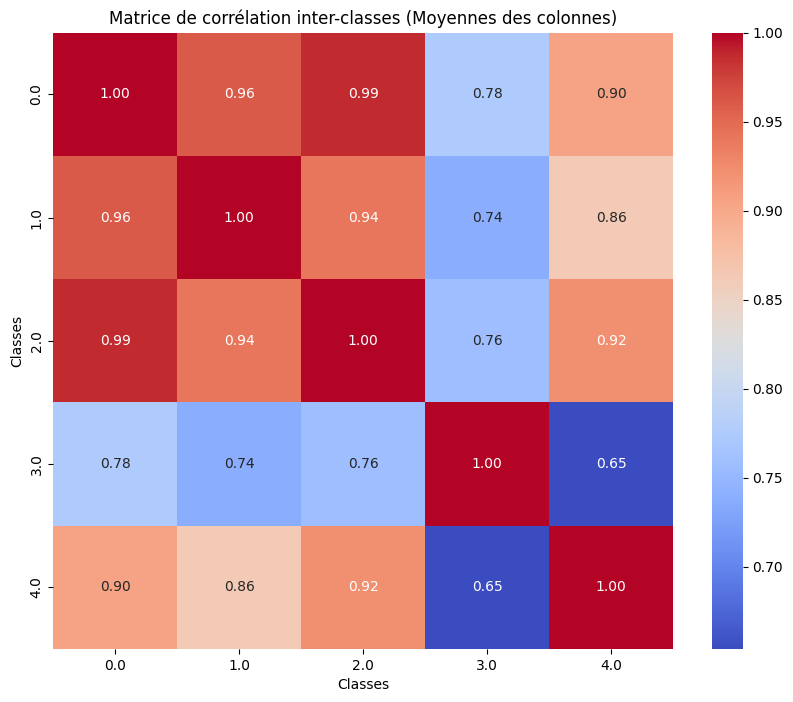

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données ECG
file_path = "Data/mitbih_fus.csv"
train_df = pd.read_csv(file_path)
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Supprimer les cinq premières colonnes
train_df = train_df.iloc[:, 5:]  # Garder uniquement les colonnes après les cinq premières

def calculate_column_means(df, group_col='Groupe'):
    """
    Calcule la moyenne des colonnes pour chaque classe, indépendamment des autres classes.
    
    :param df: DataFrame contenant les signaux ECG et les groupes.
    :param group_col: Nom de la colonne des classes.
    :return: Dictionnaire avec les moyennes des colonnes pour chaque classe.
    """
    class_means = {}
    classes = df[group_col].unique()
    for class_number in classes:
        class_data = df[df[group_col] == class_number].iloc[:, :-1]  # Exclure la colonne de classe
        class_means[class_number] = class_data.mean(axis=0).values  # Moyenne par colonne
    return class_means

def interclass_correlation_matrix(class_means):
    """
    Crée une matrice de corrélation inter-classes en utilisant les moyennes des colonnes.
    
    :param class_means: Dictionnaire contenant les moyennes des colonnes pour chaque classe.
    :return: Matrice des corrélations inter-classes.
    """
    classes = list(class_means.keys())
    correlation_matrix = pd.DataFrame(index=classes, columns=classes, dtype=float)

    for class_a in classes:
        for class_b in classes:
            # Calculer la corrélation entre les vecteurs de moyennes
            corr, _ = pearsonr(class_means[class_a], class_means[class_b])
            correlation_matrix.loc[class_a, class_b] = corr

    return correlation_matrix

if __name__ == "__main__":
    # Calculer les moyennes des colonnes pour chaque classe
    class_means = calculate_column_means(train_df)

    # Calculer la matrice de corrélation inter-classes
    correlation_matrix = interclass_correlation_matrix(class_means)

    # Afficher la matrice de corrélation
    print("Matrice de corrélation inter-classes (moyennes des colonnes) :")
    print(correlation_matrix)

    # Visualiser la matrice avec seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Matrice de corrélation inter-classes (Moyennes des colonnes)")
    plt.xlabel("Classes")
    plt.ylabel("Classes")
    plt.show()


In [24]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Paramètres de segmentation (en nombre de points selon la fréquence d'échantillonnage)
sampling_rate = 360  # Exemple: 360 Hz (nombre de points par seconde)
p_before_r = int(0.2 * sampling_rate)   # 200 ms avant le pic R pour l'onde P
qrs_window = int(0.1 * sampling_rate)   # 100 ms autour du pic R pour QRS
t_after_r = int(0.2 * sampling_rate)    # 200 ms après le pic R pour l'onde T

def segment_ecg_phases(signal):
    """
    Divise un signal ECG en segments pour les phases P, QRS, et T autour des pics R.
    """
    # Détection des pics R
    peaks, _ = find_peaks(signal, distance=sampling_rate // 2, height=0.5)  # Ajustez `height` selon le signal

    segments = {'P': [], 'QRS': [], 'T': []}

    for peak in peaks:
        # Extraire les phases P, QRS, et T autour de chaque pic R
        p_start = max(peak - p_before_r, 0)       # Évite les indices négatifs
        qrs_start = max(peak - qrs_window // 2, 0)
        qrs_end = min(peak + qrs_window // 2, len(signal))
        t_end = min(peak + t_after_r, len(signal))

        # Segmenter chaque phase
        p_wave = signal[p_start:peak]
        qrs_complex = signal[qrs_start:qrs_end]
        t_wave = signal[peak:t_end]

        segments['P'].append(p_wave)
        segments['QRS'].append(qrs_complex)
        segments['T'].append(t_wave)
    
    return segments

# Exemple d'application sur une ligne du dataset
example_signal = train_df.iloc[0, :-1].values  # Exemple avec le premier signal
segments = segment_ecg_phases(example_signal)

# Affichage des segments pour un aperçu
print("Segments P:", segments['P'])
print("Segments QRS:", segments['QRS'])
print("Segments T:", segments['T'])


Segments P: [array([0.30402932, 0.33699635, 0.37728938, 0.3919414 , 0.43956044,
       0.44688645, 0.45787546, 0.47985348, 0.51282054, 0.53479856,
       0.58608061, 0.58608061, 0.60439563, 0.63369966, 0.61538464,
       0.58241761, 0.56410259, 0.52014655, 0.49084249, 0.49084249,
       0.46886447, 0.45421246, 0.45054945, 0.46520147, 0.45054945,
       0.43223444, 0.42490843, 0.41025642, 0.3919414 , 0.36996338,
       0.37362638, 0.36630037, 0.31868133, 0.31135532, 0.32600734,
       0.31135532, 0.31501833, 0.32234433, 0.34432235, 0.34432235,
       0.33333334, 0.30402932, 0.30769232, 0.2820513 , 0.27106228,
       0.2857143 , 0.26373628, 0.27472529, 0.2820513 , 0.26739928,
       0.27838829, 0.2893773 , 0.29304031, 0.2893773 , 0.2893773 ,
       0.2893773 , 0.29304031, 0.2820513 , 0.26739928, 0.25641027,
       0.25274727, 0.21611722, 0.22344323, 0.23809524, 0.21611722,
       0.26739928, 0.41758242, 0.58241761, 0.61538464, 0.62271065,
       0.76190478, 0.86446887])]
Segments QRS: [a

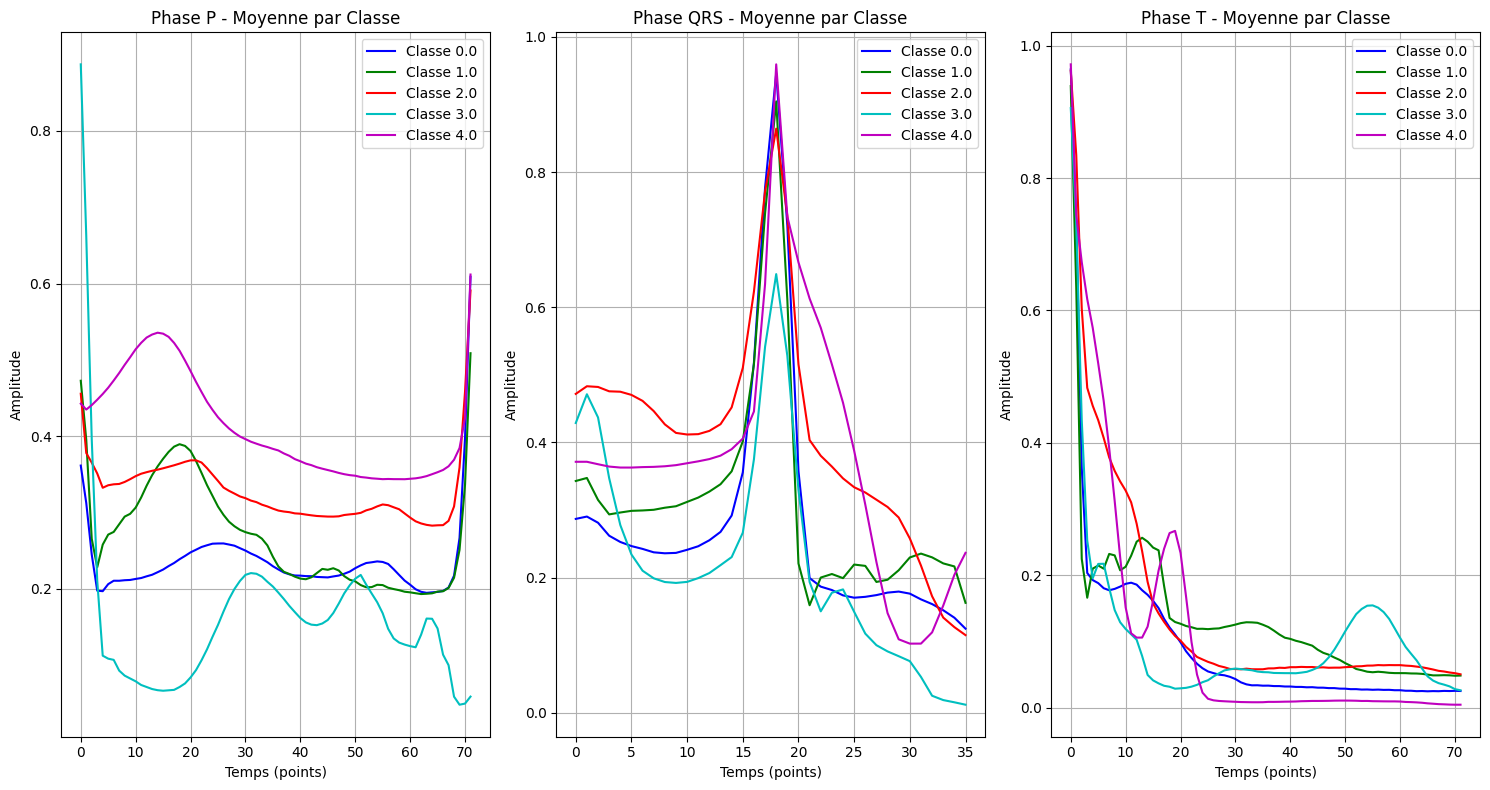

In [25]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Paramètres de segmentation (en nombre de points selon la fréquence d'échantillonnage)
sampling_rate = 360  # Exemple : 360 Hz
p_before_r = int(0.2 * sampling_rate)   # 200 ms avant le pic R pour l'onde P
qrs_window = int(0.1 * sampling_rate)   # 100 ms autour du pic R pour QRS
t_after_r = int(0.2 * sampling_rate)    # 200 ms après le pic R pour l'onde T

def segment_ecg_phases(signal):
    """
    Divise un signal ECG en segments pour les phases P, QRS, et T autour des pics R.
    """
    # Détection des pics R
    peaks, _ = find_peaks(signal, distance=sampling_rate // 2, height=0.5)  # Ajustez `height` selon le signal

    segments = {'P': [], 'QRS': [], 'T': []}

    for peak in peaks:
        # Extraire les phases P, QRS, et T autour de chaque pic R
        p_start = max(peak - p_before_r, 0)       # Évite les indices négatifs
        qrs_start = max(peak - qrs_window // 2, 0)
        qrs_end = min(peak + qrs_window // 2, len(signal))
        t_end = min(peak + t_after_r, len(signal))

        # Segmenter chaque phase
        p_wave = signal[p_start:peak]
        qrs_complex = signal[qrs_start:qrs_end]
        t_wave = signal[peak:t_end]

        segments['P'].append(p_wave)
        segments['QRS'].append(qrs_complex)
        segments['T'].append(t_wave)
    
    return segments

def calculate_mean_phases_by_class(df):
    """
    Calcule les moyennes des segments P, QRS, et T pour chaque classe.
    """
    mean_phases = {'P': {}, 'QRS': {}, 'T': {}}

    for class_number in df['Groupe'].unique():
        class_signals = df[df['Groupe'] == class_number].iloc[:, :-1].values

        # Stocker les segments pour chaque phase
        all_p_segments = []
        all_qrs_segments = []
        all_t_segments = []

        for signal in class_signals:
            segments = segment_ecg_phases(signal)
            all_p_segments.extend(segments['P'])
            all_qrs_segments.extend(segments['QRS'])
            all_t_segments.extend(segments['T'])

        # Calculer la moyenne pour chaque phase
        mean_phases['P'][class_number] = np.mean([np.pad(seg, (0, max(0, p_before_r - len(seg))), 'constant') for seg in all_p_segments], axis=0)
        mean_phases['QRS'][class_number] = np.mean([np.pad(seg, (0, max(0, qrs_window - len(seg))), 'constant') for seg in all_qrs_segments], axis=0)
        mean_phases['T'][class_number] = np.mean([np.pad(seg, (0, max(0, t_after_r - len(seg))), 'constant') for seg in all_t_segments], axis=0)

    return mean_phases

# Calcul des moyennes des phases par classe
mean_phases = calculate_mean_phases_by_class(train_df)

# Visualisation des moyennes des phases pour chaque classe
plt.figure(figsize=(15, 8))
phases = ['P', 'QRS', 'T']
colors = ['b', 'g', 'r', 'c', 'm']  # Couleurs pour les 5 classes

for i, phase in enumerate(phases, 1):
    plt.subplot(1, 3, i)
    plt.title(f"Phase {phase} - Moyenne par Classe")
    for class_number, color in zip(mean_phases[phase].keys(), colors):
        plt.plot(mean_phases[phase][class_number], color=color, label=f"Classe {class_number}")
    plt.xlabel("Temps (points)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


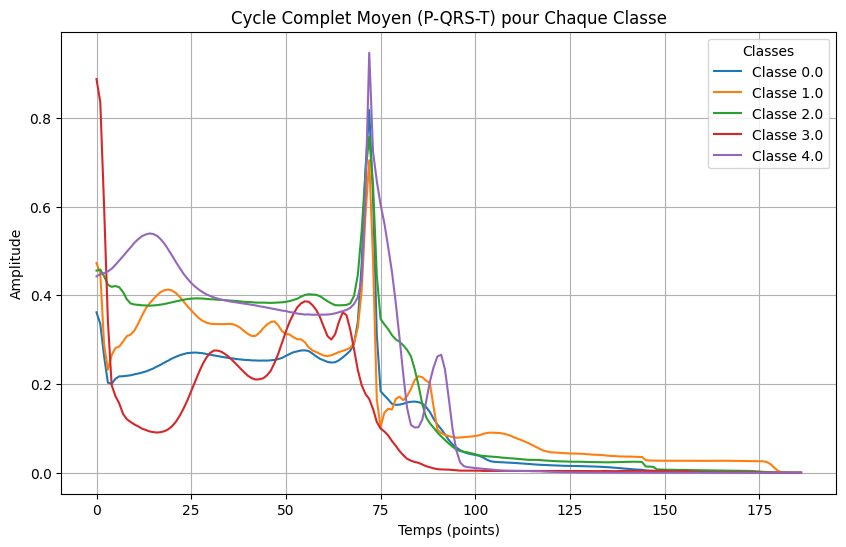

In [26]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Paramètres pour segmenter un cycle complet autour de R
sampling_rate = 360  # Fréquence d'échantillonnage en Hz
pre_r = int(0.2 * sampling_rate)  # 200 ms avant le pic R
post_r = int(0.4 * sampling_rate)  # 400 ms après le pic R pour capturer P-QRS-T

def extract_complete_cycle(signal):
    """
    Extrait des cycles complets autour des pics R, incluant les phases P, QRS, et T.
    """
    peaks, _ = find_peaks(signal, distance=sampling_rate // 2, height=0.5)  # Ajustez `height` selon le signal

    cycles = []
    for peak in peaks:
        start = max(peak - pre_r, 0)
        end = min(peak + post_r, len(signal))
        cycle = signal[start:end]
        cycles.append(cycle)
    
    return cycles

def calculate_mean_cycles_by_class(df):
    """
    Calcule le cycle moyen complet (P-QRS-T) pour chaque classe.
    """
    mean_cycles = {}

    for class_number in df['Groupe'].unique():
        class_signals = df[df['Groupe'] == class_number].iloc[:, :-1].values

        all_cycles = []
        for signal in class_signals:
            cycles = extract_complete_cycle(signal)
            all_cycles.extend(cycles)

        # Compléter les cycles à la même longueur, puis calculer la moyenne
        max_length = max(len(cycle) for cycle in all_cycles)
        padded_cycles = [np.pad(cycle, (0, max_length - len(cycle)), 'constant') for cycle in all_cycles]
        mean_cycles[class_number] = np.mean(padded_cycles, axis=0)

    return mean_cycles

# Calcul des cycles moyens par classe
mean_cycles = calculate_mean_cycles_by_class(train_df)

# Visualisation des cycles moyens pour chaque classe
plt.figure(figsize=(10, 6))
for class_number, mean_cycle in mean_cycles.items():
    plt.plot(mean_cycle, label=f"Classe {class_number}")

plt.title("Cycle Complet Moyen (P-QRS-T) pour Chaque Classe")
plt.xlabel("Temps (points)")
plt.ylabel("Amplitude")
plt.legend(title="Classes")
plt.grid()
plt.show()


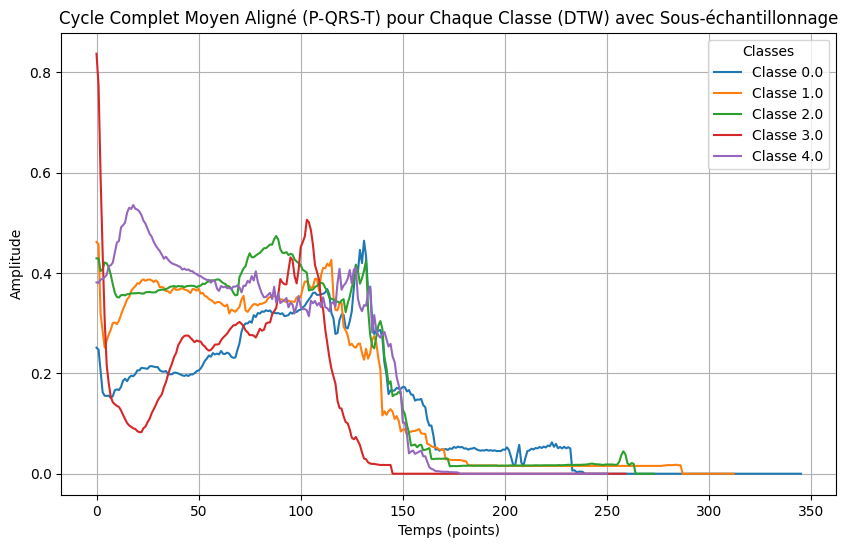

In [29]:
import numpy as np
import pandas as pd
from dtaidistance import dtw
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Paramètres pour segmenter un cycle complet autour de R
sampling_rate = 360  # Fréquence d'échantillonnage en Hz
pre_r = int(0.2 * sampling_rate)  # 200 ms avant le pic R
post_r = int(0.4 * sampling_rate)  # 400 ms après le pic R pour capturer P-QRS-T

# Paramètres de sous-échantillonnage
n_samples_per_class = 20  # Nombre de signaux par classe à traiter
n_cycles_per_signal = 5   # Nombre de cycles à extraire par signal

def extract_complete_cycle(signal):
    """
    Extrait des cycles complets autour des pics R, incluant les phases P, QRS, et T.
    """
    peaks, _ = find_peaks(signal, distance=sampling_rate // 2, height=0.5)

    cycles = []
    for peak in peaks[:n_cycles_per_signal]:  # Limiter à n_cycles_per_signal cycles par signal
        start = max(peak - pre_r, 0)
        end = min(peak + post_r, len(signal))
        cycle = signal[start:end]
        cycles.append(cycle)
    
    return cycles

def align_cycles_with_dtw(reference_cycle, cycles):
    """
    Aligne chaque cycle avec le cycle de référence en utilisant DTW.
    """
    aligned_cycles = []
    for cycle in cycles:
        path = dtw.warping_path(reference_cycle, cycle)
        aligned_cycle = np.array([cycle[j] for i, j in path])
        aligned_cycles.append(aligned_cycle)
    
    return aligned_cycles

def calculate_dtw_aligned_mean_cycles_by_class(df):
    """
    Calcule le cycle moyen complet aligné par DTW pour chaque classe avec sous-échantillonnage.
    """
    mean_cycles = {}

    for class_number in df['Groupe'].unique():
        class_signals = df[df['Groupe'] == class_number].iloc[:, :-1].values

        # Tirer un sous-échantillon de n_samples_per_class signaux par classe
        sampled_signals = resample(class_signals, n_samples=n_samples_per_class, random_state=42)

        all_cycles = []
        for signal in sampled_signals:
            cycles = extract_complete_cycle(signal)
            all_cycles.extend(cycles)

        # Compléter les cycles à la même longueur pour calculer un cycle de référence moyen
        max_length = max(len(cycle) for cycle in all_cycles)
        padded_cycles = [np.pad(cycle, (0, max_length - len(cycle)), 'constant') for cycle in all_cycles]
        reference_cycle = np.mean(padded_cycles, axis=0)

        # Aligner chaque cycle avec le cycle de référence
        aligned_cycles = align_cycles_with_dtw(reference_cycle, all_cycles)

        # Compléter les cycles alignés pour avoir la même longueur et calculer la moyenne alignée
        max_aligned_length = max(len(cycle) for cycle in aligned_cycles)
        padded_aligned_cycles = [np.pad(cycle, (0, max_aligned_length - len(cycle)), 'constant') for cycle in aligned_cycles]
        mean_cycles[class_number] = np.mean(padded_aligned_cycles, axis=0)

    return mean_cycles

# Calcul des cycles moyens alignés par DTW pour chaque classe avec sous-échantillonnage
mean_dtw_cycles = calculate_dtw_aligned_mean_cycles_by_class(train_df)

# Visualisation des cycles moyens alignés pour chaque classe
plt.figure(figsize=(10, 6))
for class_number, mean_cycle in mean_dtw_cycles.items():
    plt.plot(mean_cycle, label=f"Classe {class_number}")

plt.title("Cycle Complet Moyen Aligné (P-QRS-T) pour Chaque Classe (DTW) avec Sous-échantillonnage")
plt.xlabel("Temps (points)")
plt.ylabel("Amplitude")
plt.legend(title="Classes")
plt.grid()
plt.show()


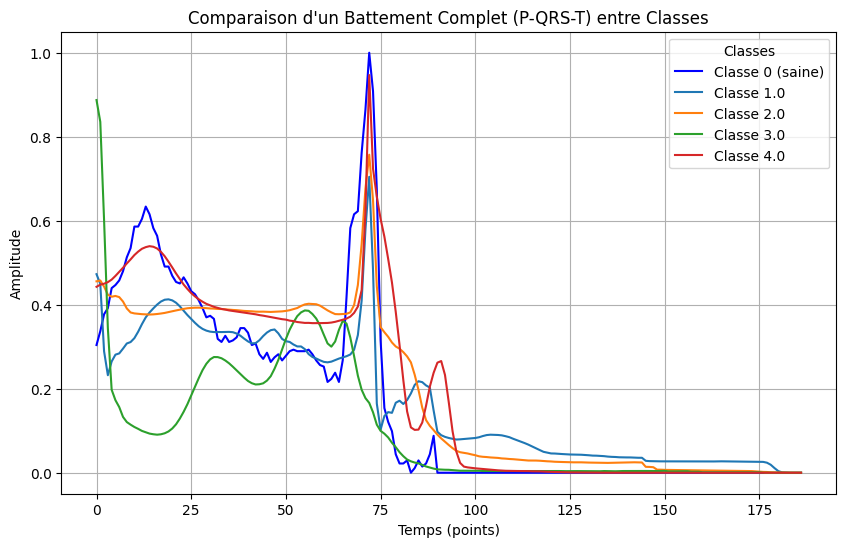

In [30]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from dtaidistance import dtw
from sklearn.utils import resample

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Paramètres pour segmenter un battement complet autour de R
sampling_rate = 360  # Fréquence d'échantillonnage en Hz
pre_r = int(0.2 * sampling_rate)  # 200 ms avant le pic R
post_r = int(0.4 * sampling_rate)  # 400 ms après le pic R pour capturer un battement complet (P-QRS-T)

def extract_single_beat(signal):
    """
    Extrait un battement complet autour d'un pic R, incluant les phases P, QRS, et T.
    """
    peaks, _ = find_peaks(signal, distance=sampling_rate // 2, height=0.5)

    if len(peaks) > 0:
        peak = peaks[0]  # Prendre le premier pic R détecté
        start = max(peak - pre_r, 0)
        end = min(peak + post_r, len(signal))
        return signal[start:end]
    else:
        return None

# Extraire un battement représentatif pour la classe 0 (saine)
class_0_signals = train_df[train_df['Groupe'] == 0].iloc[:, :-1].values
class_0_beat = None
for signal in class_0_signals:
    class_0_beat = extract_single_beat(signal)
    if class_0_beat is not None:
        break  # Arrêter après avoir extrait le premier battement valide

# Comparaison avec les battements d'autres classes
mean_beats = {}
for class_number in train_df['Groupe'].unique():
    if class_number != 0:  # Comparer avec les autres classes seulement
        class_signals = train_df[train_df['Groupe'] == class_number].iloc[:, :-1].values
        all_beats = [extract_single_beat(signal) for signal in class_signals]
        # Filtrer les battements None et normaliser les longueurs
        all_beats = [beat for beat in all_beats if beat is not None]
        max_length = max(len(beat) for beat in all_beats)
        padded_beats = [np.pad(beat, (0, max_length - len(beat)), 'constant') for beat in all_beats]
        mean_beats[class_number] = np.mean(padded_beats, axis=0)

# Visualisation du battement de la classe 0 et des autres classes
plt.figure(figsize=(10, 6))
plt.plot(class_0_beat, label="Classe 0 (saine)", color="blue")

for class_number, mean_beat in mean_beats.items():
    plt.plot(mean_beat, label=f"Classe {class_number}")

plt.title("Comparaison d'un Battement Complet (P-QRS-T) entre Classes")
plt.xlabel("Temps (points)")
plt.ylabel("Amplitude")
plt.legend(title="Classes")
plt.grid()
plt.show()


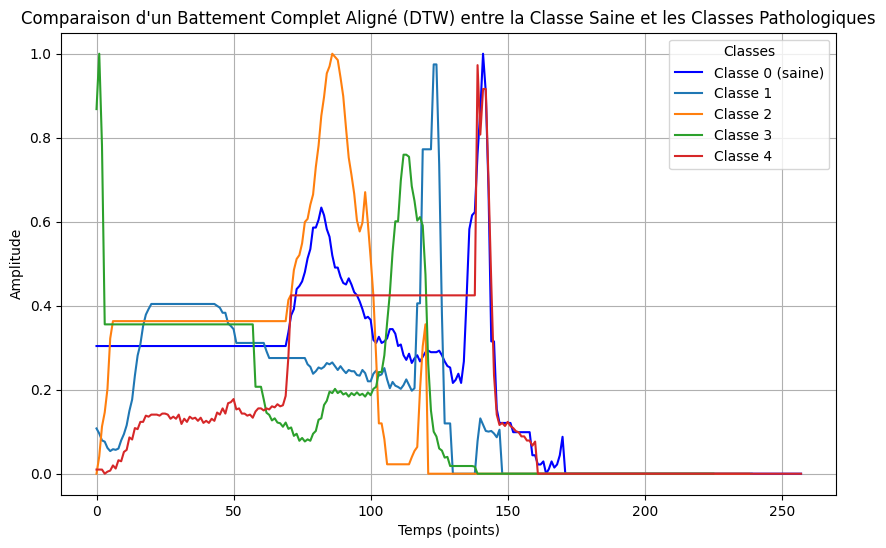

In [31]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from dtaidistance import dtw

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Paramètres pour segmenter un battement complet autour de R
sampling_rate = 360  # Fréquence d'échantillonnage en Hz
pre_r = int(0.2 * sampling_rate)  # 200 ms avant le pic R
post_r = int(0.4 * sampling_rate)  # 400 ms après le pic R pour capturer un battement complet (P-QRS-T)

def extract_single_beat(signal):
    """
    Extrait un battement complet autour d'un pic R, incluant les phases P, QRS, et T.
    """
    peaks, _ = find_peaks(signal, distance=sampling_rate // 2, height=0.5)

    if len(peaks) > 0:
        peak = peaks[0]  # Prendre le premier pic R détecté
        start = max(peak - pre_r, 0)
        end = min(peak + post_r, len(signal))
        return signal[start:end]
    else:
        return None

# Extraire un battement représentatif pour la classe 0 (saine)
class_0_signals = train_df[train_df['Groupe'] == 0].iloc[:, :-1].values
class_0_beat = None
for signal in class_0_signals:
    class_0_beat = extract_single_beat(signal)
    if class_0_beat is not None:
        break  # Arrêter après avoir extrait le premier battement valide

# Comparaison avec les battements des autres classes avec DTW
aligned_beats = {}
for class_number in [1, 2, 3, 4]:  # Classes pathologiques
    class_signals = train_df[train_df['Groupe'] == class_number].iloc[:, :-1].values
    class_beat = None
    for signal in class_signals:
        class_beat = extract_single_beat(signal)
        if class_beat is not None:
            break  # Prendre le premier battement valide de chaque classe

    # Aligner le battement pathologique avec le battement sain de la classe 0
    path = dtw.warping_path(class_0_beat, class_beat)
    aligned_class_beat = np.array([class_beat[j] for i, j in path])
    aligned_class_0_beat = np.array([class_0_beat[i] for i, j in path])
    
    aligned_beats[class_number] = aligned_class_beat

# Visualisation du battement sain de la classe 0 et des autres classes alignés avec DTW
plt.figure(figsize=(10, 6))
plt.plot(aligned_class_0_beat, label="Classe 0 (saine)", color="blue")

for class_number, aligned_beat in aligned_beats.items():
    plt.plot(aligned_beat, label=f"Classe {class_number}")

plt.title("Comparaison d'un Battement Complet Aligné (DTW) entre la Classe Saine et les Classes Pathologiques")
plt.xlabel("Temps (points)")
plt.ylabel("Amplitude")
plt.legend(title="Classes")
plt.grid()
plt.show()


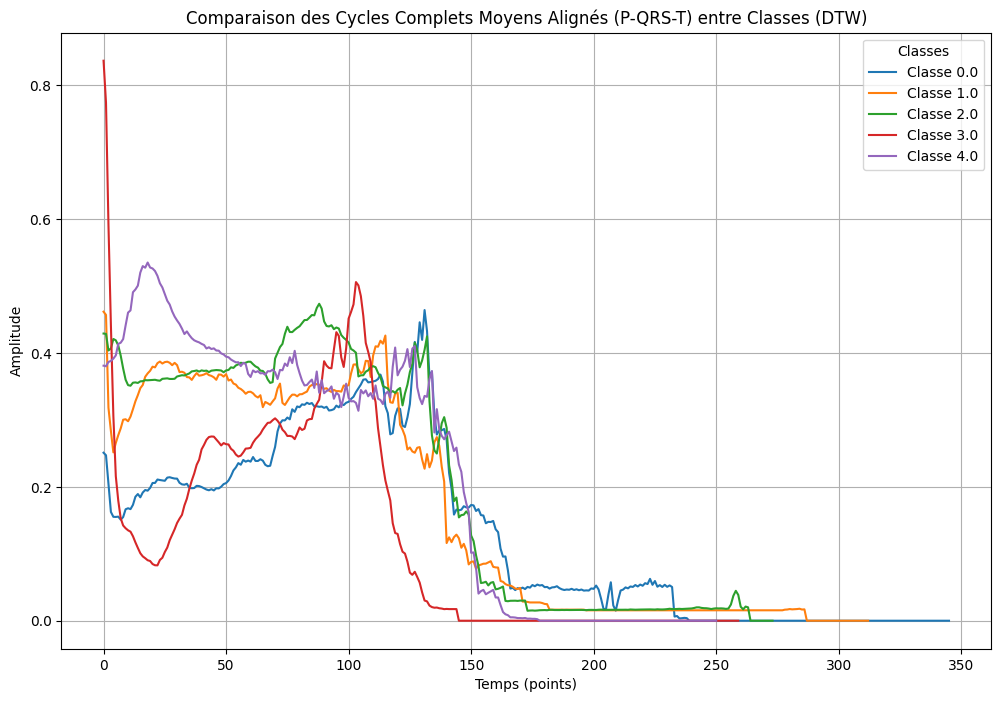

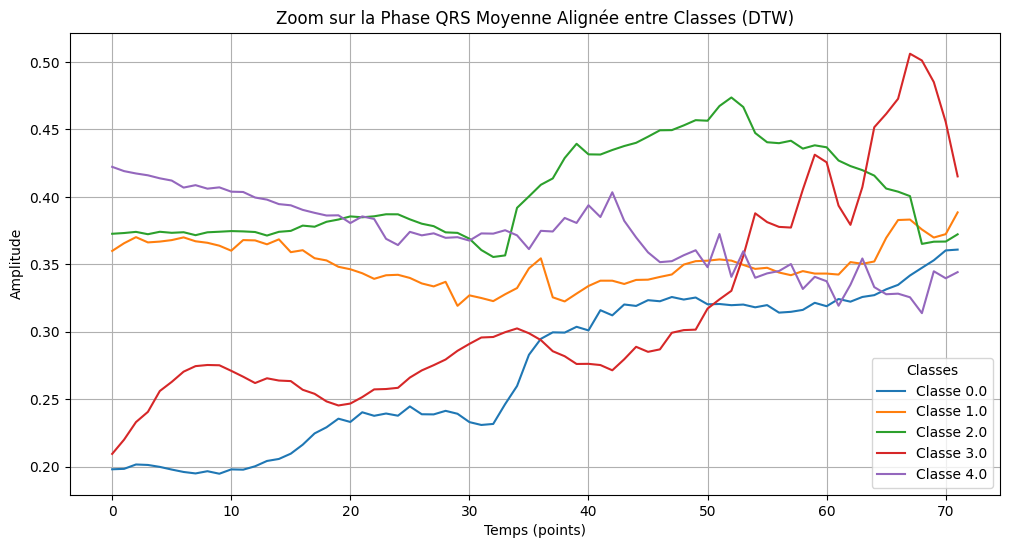

In [39]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from dtaidistance import dtw
from sklearn.utils import resample

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Paramètres pour segmenter un cycle complet autour de R
sampling_rate = 360  # Fréquence d'échantillonnage en Hz
pre_r = int(0.2 * sampling_rate)  # 200 ms avant le pic R
post_r = int(0.4 * sampling_rate)  # 400 ms après le pic R pour capturer P-QRS-T

# Paramètres de sous-échantillonnage
n_samples_per_class = 20  # Nombre de signaux par classe à traiter
n_cycles_per_signal = 5   # Nombre de cycles à extraire par signal

def extract_complete_cycle(signal):
    """
    Extrait des cycles complets autour des pics R, incluant les phases P, QRS, et T.
    """
    peaks, _ = find_peaks(signal, distance=sampling_rate // 2, height=0.5)

    cycles = []
    for peak in peaks[:n_cycles_per_signal]:  # Limiter à n_cycles_per_signal cycles par signal
        start = max(peak - pre_r, 0)
        end = min(peak + post_r, len(signal))
        cycle = signal[start:end]
        cycles.append(cycle)
    
    return cycles

def align_cycles_with_dtw(reference_cycle, cycles):
    """
    Aligne chaque cycle avec le cycle de référence en utilisant DTW.
    """
    aligned_cycles = []
    for cycle in cycles:
        path = dtw.warping_path(reference_cycle, cycle)
        aligned_cycle = np.array([cycle[j] for i, j in path])
        aligned_cycles.append(aligned_cycle)
    
    return aligned_cycles

def calculate_dtw_aligned_mean_cycles_by_class(df):
    """
    Calcule le cycle moyen complet aligné par DTW pour chaque classe avec sous-échantillonnage.
    """
    mean_cycles = {}

    for class_number in df['Groupe'].unique():
        class_signals = df[df['Groupe'] == class_number].iloc[:, :-1].values

        # Tirer un sous-échantillon de n_samples_per_class signaux par classe
        sampled_signals = resample(class_signals, n_samples=n_samples_per_class, random_state=42)

        all_cycles = []
        for signal in sampled_signals:
            cycles = extract_complete_cycle(signal)
            all_cycles.extend(cycles)

        # Compléter les cycles à la même longueur pour calculer un cycle de référence moyen
        max_length = max(len(cycle) for cycle in all_cycles)
        padded_cycles = [np.pad(cycle, (0, max_length - len(cycle)), 'constant') for cycle in all_cycles]
        reference_cycle = np.mean(padded_cycles, axis=0)

        # Aligner chaque cycle avec le cycle de référence
        aligned_cycles = align_cycles_with_dtw(reference_cycle, all_cycles)

        # Compléter les cycles alignés pour avoir la même longueur et calculer la moyenne alignée
        max_aligned_length = max(len(cycle) for cycle in aligned_cycles)
        padded_aligned_cycles = [np.pad(cycle, (0, max_aligned_length - len(cycle)), 'constant') for cycle in aligned_cycles]
        mean_cycles[class_number] = np.mean(padded_aligned_cycles, axis=0)

    return mean_cycles

# Calcul des cycles moyens alignés par DTW pour chaque classe avec sous-échantillonnage
mean_dtw_cycles = calculate_dtw_aligned_mean_cycles_by_class(train_df)

# Visualisation des cycles moyens alignés pour chaque classe
plt.figure(figsize=(12, 8))
for class_number, mean_cycle in mean_dtw_cycles.items():
    plt.plot(mean_cycle, label=f"Classe {class_number}")

plt.title("Comparaison des Cycles Complets Moyens Alignés (P-QRS-T) entre Classes (DTW)")
plt.xlabel("Temps (points)")
plt.ylabel("Amplitude")
plt.legend(title="Classes")
plt.grid()
plt.show()

# Zoom sur la phase QRS pour chaque classe
qrs_start = pre_r // 2  # Ajustez selon votre segmentation
qrs_end = pre_r + int(0.1 * sampling_rate)  # Ajustez selon votre segmentation
plt.figure(figsize=(12, 6))
for class_number, mean_cycle in mean_dtw_cycles.items():
    plt.plot(mean_cycle[qrs_start:qrs_end], label=f"Classe {class_number}")

plt.title("Zoom sur la Phase QRS Moyenne Alignée entre Classes (DTW)")
plt.xlabel("Temps (points)")
plt.ylabel("Amplitude")
plt.legend(title="Classes")
plt.grid()
plt.show()


# schéma 1 :

Voici une interprétation des résultats visualisés dans le schéma :

Cycle Moyen de la Classe Saine (Classe 0) :

Le cycle moyen de la classe saine, en bleu, présente une forme typique d’un cycle cardiaque complet avec les phases distinctes :
Début du cycle : Il y a une légère montée qui correspond à l'onde P.
Pic QRS : Le pic le plus élevé représente le complexe QRS, caractéristique d’un cycle cardiaque sain.
Phase T : Après le complexe QRS, il y a une phase de relaxation (onde T) qui est moins marquée.
Le cycle sain présente des transitions douces entre les phases et un retour rapide à la ligne de base après le pic R, indiquant un rythme cardiaque régulier.
Comparaison avec les Classes Pathologiques (Classes 1, 2, 3, 4) :

Classe 1 (Orange) : La courbe montre des variations d’amplitude plus faibles par rapport au cycle sain, avec une phase QRS moins marquée et une transition plus irrégulière après le complexe QRS. Cela peut indiquer un signal pathologique avec des battements moins prononcés.
Classe 2 (Vert) : La classe 2 présente une amplitude plus élevée que la classe saine, surtout autour de la phase QRS, ce qui peut indiquer une sur-activité ou une anomalie dans la contraction ventriculaire. La fin du cycle montre un retour plus progressif à la ligne de base, ce qui pourrait être un signe de récupération prolongée.
Classe 3 (Rouge) : Ce cycle est caractérisé par un pic initial très marqué qui dépasse celui des autres classes, puis une chute rapide. Cette forme suggère une forte anomalie cardiaque, comme une arythmie, où le pic R est extrêmement accentué mais suivi d’une perte rapide d’amplitude.
Classe 4 (Violet) : Le cycle de cette classe est relativement proche du cycle sain, mais il présente quelques variations d’amplitude et un léger décalage dans la phase T. Cela pourrait indiquer une pathologie plus légère ou une variation mineure par rapport au cycle sain.
Analyse des Phases P, QRS, et T :

Le complexe QRS est particulièrement intéressant car c’est la phase qui montre les plus grandes différences entre les classes. Les pics sont plus ou moins prononcés en fonction de la classe, ce qui peut indiquer des différences dans la contraction des ventricules.
La phase T présente aussi des variations de forme et de retour à la ligne de base, notamment dans les classes 2 et 3, qui montrent une récupération plus lente après la contraction cardiaque.
Interprétation des Pathologies :

Les variations d’amplitude, de forme, et de retour à la ligne de base suggèrent des anomalies spécifiques pour chaque classe pathologique. Par exemple :
La classe 3 (rouge) montre une anomalie particulièrement marquée avec un pic initial élevé, ce qui pourrait correspondre à une pathologie affectant fortement la contraction cardiaque.
La classe 2 (vert) montre des amplitudes élevées mais un retour plus lent, pouvant indiquer une surcharge ventriculaire.
La classe 4 (violet) est relativement proche de la classe saine mais présente quelques variations légères, suggérant une pathologie moins sévère.
Conclusion
Ce graphique montre que les classes pathologiques ont des différences claires en comparaison avec le cycle sain, en particulier dans les phases QRS et T. Ces différences en amplitude et en forme peuvent être des indicateurs utiles pour identifier des anomalies cardiaques spécifiques associées à chaque classe pathologique. Utiliser des techniques comme DTW pour aligner les cycles a permis de visualiser ces différences de manière claire.

# schéma 2 : 

Ce schéma présente un zoom sur la phase QRS des cycles moyens alignés pour chaque classe (sains et pathologiques), après alignement DTW. La phase QRS représente la contraction ventriculaire et est cruciale pour l'analyse des cycles ECG, car elle est souvent la plus informative sur les anomalies cardiaques.

Analyse de la Phase QRS par Classe
Classe 0 (Bleu - Sain) :

La courbe de la classe saine montre une phase QRS assez régulière, avec une montée légère suivie d'une stabilisation autour de 0.25.
La phase QRS est relativement plate, ce qui indique une contraction ventriculaire normale sans sursauts importants, typique d’un cœur sain.
Classe 1 (Orange) :

La classe 1 suit une trajectoire légèrement supérieure au cycle sain avec une courbe globalement stable et un léger déclin vers la fin de la phase.
La phase QRS semble un peu plus amortie, ce qui pourrait indiquer une légère anomalie cardiaque, sans perturbations majeures.
Classe 2 (Vert) :

La classe 2 montre une phase QRS avec une amplitude significativement plus élevée, atteignant environ 0.45.
Cette forte amplitude pourrait être indicative d'une hyperactivité ventriculaire, ce qui peut être associé à certaines pathologies où le ventricule est sous pression accrue, provoquant une contraction plus forte.
Classe 3 (Rouge) :

La classe 3 présente un schéma inhabituel pour un cycle QRS, avec des pics irréguliers et un profil fluctuant.
Cette instabilité est marquée par des variations rapides en amplitude, ce qui pourrait être un signe d'arythmie ou d’une autre perturbation du rythme cardiaque.
Le caractère très irrégulier et abrupt des changements d'amplitude pourrait indiquer une anomalie importante dans la contraction cardiaque.
Classe 4 (Violet) :

La courbe de la classe 4 est légèrement plus élevée que la classe saine mais reste relativement stable, bien qu'elle montre un profil plus fluctuant que les classes 0 et 1.
Il y a des légères ondulations qui peuvent refléter des variations subtiles dans la phase QRS, ce qui pourrait être un signe d'une pathologie légère ou d'une perturbation moins grave.
Interprétation Générale
Amplitudes Différentes : Les différentes amplitudes des phases QRS pour chaque classe indiquent des niveaux de contraction ventriculaire distincts, ce qui est courant dans diverses pathologies cardiaques. Par exemple, la classe 2 (vert) montre une amplitude plus élevée, ce qui peut être le signe d'une surcharge ventriculaire, tandis que la classe 3 (rouge) montre des fluctuations rapides, indiquant potentiellement une arythmie.

Stabilité et Régularité :

La classe saine (0) et la classe 1 (orange) présentent des courbes relativement stables, indiquant une contraction ventriculaire plus uniforme.
La classe 3 est la plus instable, ce qui la distingue clairement des autres classes et indique probablement un problème cardiaque significatif.
Alignement et Comparaison avec DTW : L'utilisation de DTW pour aligner les phases permet de visualiser directement les différences de forme et d'amplitude entre les classes, en s'assurant que la phase QRS de chaque classe est synchronisée.

Conclusion
Ce schéma montre que les classes pathologiques présentent des différences significatives dans la phase QRS par rapport à la classe saine. En particulier :

Classe 2 : Forte amplitude indicative d’une hyperactivité cardiaque.
Classe 3 : Profil très fluctuant, possiblement associé à une arythmie.
Classe 4 : Anomalies mineures suggérant une pathologie légère.
Ce zoom sur la phase QRS permet de visualiser précisément comment les anomalies affectent la contraction ventriculaire dans chaque classe pathologique, rendant les différences plus faciles à analyser pour le diagnostic.

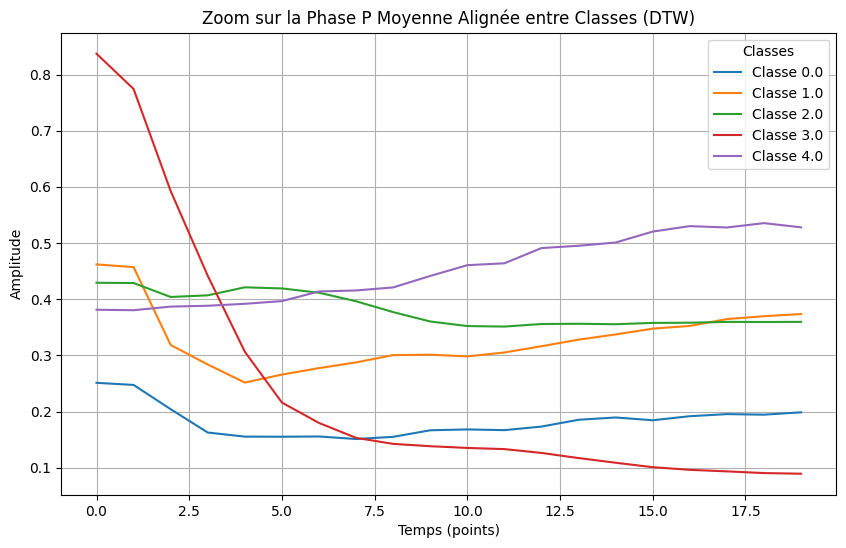

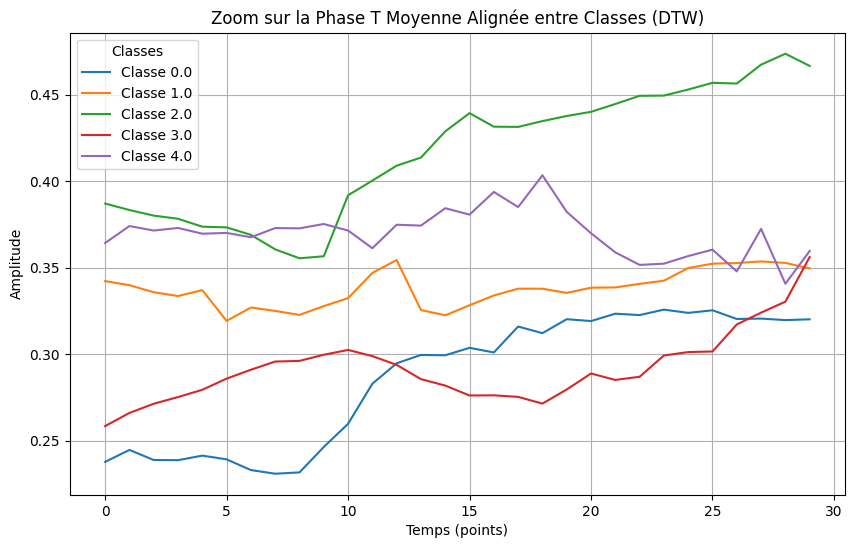

In [33]:
import matplotlib.pyplot as plt

# Définir les segments pour les phases P et T (ajustez selon votre segmentation)
p_start = 0
p_end = 20  # Ajustez selon la position de la phase P
t_start = 60  # Ajustez selon la position de la phase T
t_end = 90  # Ajustez selon la longueur de la phase T

# Zoom sur la phase P pour chaque classe
plt.figure(figsize=(10, 6))
for class_number, mean_cycle in mean_dtw_cycles.items():
    plt.plot(mean_cycle[p_start:p_end], label=f"Classe {class_number}")

plt.title("Zoom sur la Phase P Moyenne Alignée entre Classes (DTW)")
plt.xlabel("Temps (points)")
plt.ylabel("Amplitude")
plt.legend(title="Classes")
plt.grid()
plt.show()

# Zoom sur la phase T pour chaque classe
plt.figure(figsize=(10, 6))
for class_number, mean_cycle in mean_dtw_cycles.items():
    plt.plot(mean_cycle[t_start:t_end], label=f"Classe {class_number}")

plt.title("Zoom sur la Phase T Moyenne Alignée entre Classes (DTW)")
plt.xlabel("Temps (points)")
plt.ylabel("Amplitude")
plt.legend(title="Classes")
plt.grid()
plt.show()



Voici une analyse des deux schémas pour les phases P et T des cycles cardiaques moyens alignés pour chaque classe.

Phase P
La phase P correspond à la dépolarisation des oreillettes, représentant la contraction auriculaire. Elle se situe au début du cycle cardiaque.

Classe 0 (Bleu - Sain) :

La classe saine montre une montée douce au début, avec une amplitude modérée (autour de 0.2), puis une stabilisation en fin de phase.
Ce profil stable et progressif est typique d'un cycle cardiaque normal, où les oreillettes se contractent de manière régulière.
Classe 1 (Orange) :

La courbe de la classe 1 commence légèrement plus haut que la classe saine mais descend rapidement pour se stabiliser autour de 0.3.
Cela pourrait indiquer une contraction auriculaire légèrement plus intense au début, suivie d’une atténuation rapide, ce qui peut être le signe d'une pathologie légère.
Classe 2 (Vert) :

La classe 2 présente une légère montée au début puis reste relativement stable au-dessus de 0.4 pendant toute la phase P.
Cette amplitude plus élevée peut indiquer une sur-activation auriculaire, ce qui pourrait correspondre à une surcharge cardiaque ou à une pression accrue dans les oreillettes.
Classe 3 (Rouge) :

La courbe de la classe 3 est la plus marquée, avec une forte descente au début qui se stabilise à un niveau très bas.
Ce profil est inhabituel et peut être le signe d’une anomalie dans la contraction auriculaire, possiblement une arythmie, avec une phase de dépolarisation abrupte suivie d’une atténuation rapide.
Classe 4 (Violet) :

La classe 4 présente une amplitude stable tout au long de la phase, mais à un niveau légèrement supérieur à celui de la classe saine.
Cela pourrait indiquer une pathologie mineure affectant la contraction des oreillettes sans provoquer de variations marquées.
Phase T
La phase T correspond à la repolarisation ventriculaire, représentant la relaxation des ventricules après la contraction.

Classe 0 (Bleu - Sain) :

La classe saine montre une légère montée au début de la phase T, avec une amplitude stable autour de 0.3.
Ce profil lisse et peu marqué indique une relaxation ventriculaire normale, sans variations significatives, typique d’un cœur en bonne santé.
Classe 1 (Orange) :

La courbe de la classe 1 reste légèrement au-dessus de la classe saine avec une forme plus plate et une légère tendance à l'augmentation.
Cette montée progressive pourrait être le signe d'une récupération plus lente dans la relaxation ventriculaire, indiquant une pathologie légère.
Classe 2 (Vert) :

La classe 2 montre une amplitude significativement plus élevée que les autres classes, atteignant environ 0.45.
Cette amplitude élevée peut indiquer une surcharge ventriculaire ou une récupération anormale après la contraction, ce qui peut être associé à certaines pathologies cardiaques.
Classe 3 (Rouge) :

La classe 3 commence par une montée, puis atteint un pic plus tard dans la phase T.
Ce comportement irrégulier, avec une montée et des oscillations, pourrait indiquer une anomalie dans la relaxation ventriculaire, ce qui est souvent observé dans les arythmies ou autres troubles cardiaques.
Classe 4 (Violet) :

La courbe de la classe 4 présente une amplitude intermédiaire avec une légère baisse vers la fin.
Cela peut être le signe d'une récupération perturbée mais moins marquée, suggérant une pathologie moins grave.
Synthèse et Conclusion
Classe Saine (0) : Les phases P et T sont douces et stables, sans variations marquées, indiquant une fonction cardiaque régulière.
Classes Pathologiques :
Classe 1 montre des caractéristiques légèrement altérées mais reste proche de la courbe saine.
Classe 2 présente des amplitudes plus élevées dans les phases P et T, suggérant une surcharge cardiaque.
Classe 3 est marquée par des oscillations et des descentes abruptes dans les deux phases, indiquant une pathologie cardiaque importante, potentiellement une arythmie.
Classe 4 est légèrement perturbée, avec une amplitude modérée mais une forme globale assez stable, suggérant une anomalie mineure.
Les différences d'amplitude et de stabilité entre les classes dans ces phases permettent d'identifier des anomalies dans les contractions et relaxations auriculaires et ventriculaires, facilitant ainsi la détection de pathologies spécifiques.

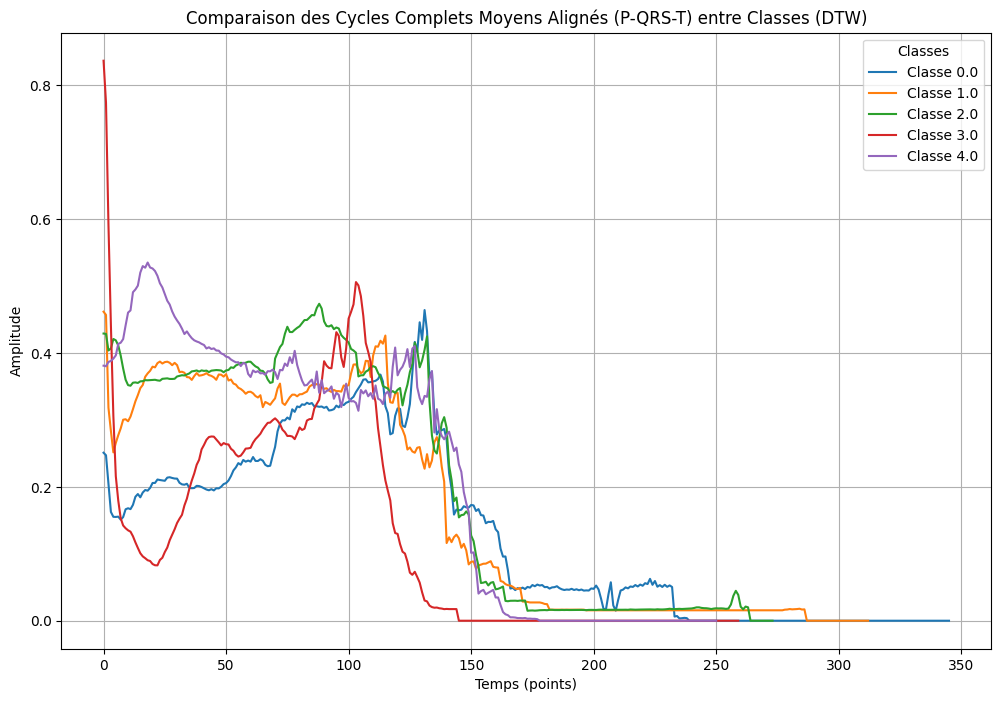


Classe 0.0, Phase P:
  Amplitude max : 0.2511
  Amplitude min : 0.1510
  Moyenne : 0.1941
  Écart-type : 0.0244

Classe 1.0, Phase P:
  Amplitude max : 0.4618
  Amplitude min : 0.2516
  Moyenne : 0.3518
  Écart-type : 0.0478

Classe 2.0, Phase P:
  Amplitude max : 0.4292
  Amplitude min : 0.3512
  Moyenne : 0.3730
  Écart-type : 0.0233

Classe 3.0, Phase P:
  Amplitude max : 0.8370
  Amplitude min : 0.0828
  Moyenne : 0.1920
  Écart-type : 0.1793

Classe 4.0, Phase P:
  Amplitude max : 0.5354
  Amplitude min : 0.3804
  Moyenne : 0.4614
  Écart-type : 0.0486


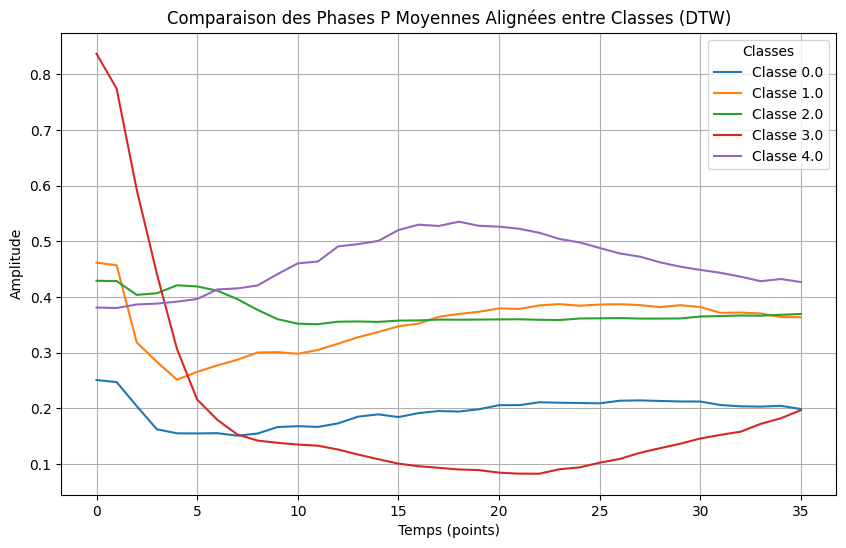


Classe 0.0, Phase QRS:
  Amplitude max : 0.3609
  Amplitude min : 0.1948
  Moyenne : 0.2722
  Écart-type : 0.0540

Classe 1.0, Phase QRS:
  Amplitude max : 0.3885
  Amplitude min : 0.3192
  Moyenne : 0.3504
  Écart-type : 0.0158

Classe 2.0, Phase QRS:
  Amplitude max : 0.4737
  Amplitude min : 0.3554
  Moyenne : 0.4025
  Écart-type : 0.0332

Classe 3.0, Phase QRS:
  Amplitude max : 0.5062
  Amplitude min : 0.2095
  Moyenne : 0.3138
  Écart-type : 0.0732

Classe 4.0, Phase QRS:
  Amplitude max : 0.4223
  Amplitude min : 0.3138
  Moyenne : 0.3714
  Écart-type : 0.0271


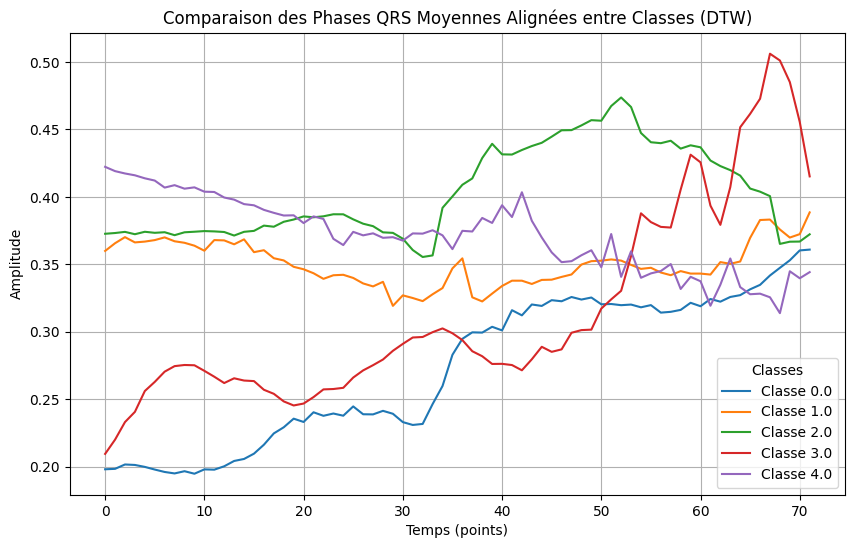


Classe 0.0, Phase T:
  Amplitude max : 0.4643
  Amplitude min : 0.0458
  Moyenne : 0.2189
  Écart-type : 0.1247

Classe 1.0, Phase T:
  Amplitude max : 0.4263
  Amplitude min : 0.0265
  Moyenne : 0.1751
  Écart-type : 0.1262

Classe 2.0, Phase T:
  Amplitude max : 0.4250
  Amplitude min : 0.0149
  Moyenne : 0.2000
  Écart-type : 0.1464

Classe 3.0, Phase T:
  Amplitude max : 0.4017
  Amplitude min : 0.0000
  Moyenne : 0.0597
  Écart-type : 0.1003

Classe 4.0, Phase T:
  Amplitude max : 0.4105
  Amplitude min : 0.0000
  Moyenne : 0.1970
  Écart-type : 0.1538


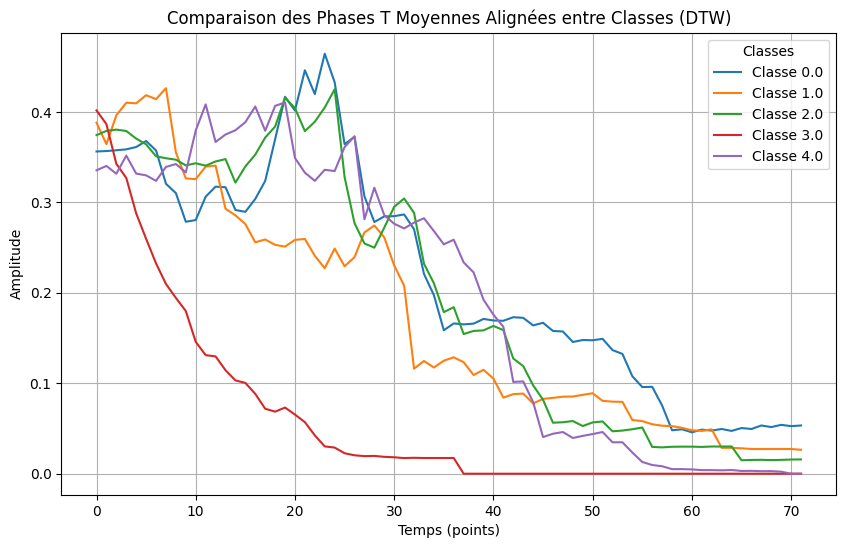


Durées des phases P par classe:
  Classe 0.0 : 36 points
  Classe 1.0 : 36 points
  Classe 2.0 : 36 points
  Classe 3.0 : 36 points
  Classe 4.0 : 36 points

Corrélations des phases P avec la classe 0 (saine):
  Classe 1.0 : 0.9643
  Classe 2.0 : -0.0551
  Classe 3.0 : 0.3418
  Classe 4.0 : 0.1275

Durées des phases QRS par classe:
  Classe 0.0 : 72 points
  Classe 1.0 : 72 points
  Classe 2.0 : 72 points
  Classe 3.0 : 72 points
  Classe 4.0 : 72 points

Corrélations des phases QRS avec la classe 0 (saine):
  Classe 1.0 : -0.0736
  Classe 2.0 : 0.6919
  Classe 3.0 : 0.7481
  Classe 4.0 : -0.8268

Durées des phases T par classe:
  Classe 0.0 : 72 points
  Classe 1.0 : 72 points
  Classe 2.0 : 72 points
  Classe 3.0 : 72 points
  Classe 4.0 : 72 points

Corrélations des phases T avec la classe 0 (saine):
  Classe 1.0 : 0.8673
  Classe 2.0 : 0.9628
  Classe 3.0 : 0.5780
  Classe 4.0 : 0.9134


In [40]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from dtaidistance import dtw
from sklearn.utils import resample

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Paramètres pour segmenter un cycle complet autour de R
sampling_rate = 360  # Fréquence d'échantillonnage en Hz
pre_r = int(0.2 * sampling_rate)  # 200 ms avant le pic R
post_r = int(0.4 * sampling_rate)  # 400 ms après le pic R pour capturer P-QRS-T

# Paramètres de sous-échantillonnage
n_samples_per_class = 20  # Nombre de signaux par classe à traiter
n_cycles_per_signal = 5   # Nombre de cycles à extraire par signal

# Phase segmentation points (modifiable based on data)
qrs_start = pre_r // 2
qrs_end = pre_r + int(0.1 * sampling_rate)
p_start, p_end = 0, qrs_start
t_start, t_end = qrs_end, post_r + qrs_start

def extract_complete_cycle(signal):
    peaks, _ = find_peaks(signal, distance=sampling_rate // 2, height=0.5)
    cycles = []
    for peak in peaks[:n_cycles_per_signal]:
        start = max(peak - pre_r, 0)
        end = min(peak + post_r, len(signal))
        cycle = signal[start:end]
        cycles.append(cycle)
    return cycles

def align_cycles_with_dtw(reference_cycle, cycles):
    aligned_cycles = []
    for cycle in cycles:
        path = dtw.warping_path(reference_cycle, cycle)
        aligned_cycle = np.array([cycle[j] for i, j in path])
        aligned_cycles.append(aligned_cycle)
    return aligned_cycles

def calculate_dtw_aligned_mean_cycles_by_class(df):
    mean_cycles = {}
    for class_number in df['Groupe'].unique():
        class_signals = df[df['Groupe'] == class_number].iloc[:, :-1].values
        sampled_signals = resample(class_signals, n_samples=n_samples_per_class, random_state=42)
        all_cycles = []
        for signal in sampled_signals:
            cycles = extract_complete_cycle(signal)
            all_cycles.extend(cycles)
        max_length = max(len(cycle) for cycle in all_cycles)
        padded_cycles = [np.pad(cycle, (0, max_length - len(cycle)), 'constant') for cycle in all_cycles]
        reference_cycle = np.mean(padded_cycles, axis=0)
        aligned_cycles = align_cycles_with_dtw(reference_cycle, all_cycles)
        max_aligned_length = max(len(cycle) for cycle in aligned_cycles)
        padded_aligned_cycles = [np.pad(cycle, (0, max_aligned_length - len(cycle)), 'constant') for cycle in aligned_cycles]
        mean_cycles[class_number] = np.mean(padded_aligned_cycles, axis=0)
    return mean_cycles

# Analyse statistique et visualisation
mean_dtw_cycles = calculate_dtw_aligned_mean_cycles_by_class(train_df)

# Plot cycle complet moyen aligné
plt.figure(figsize=(12, 8))
for class_number, mean_cycle in mean_dtw_cycles.items():
    plt.plot(mean_cycle, label=f"Classe {class_number}")
plt.title("Comparaison des Cycles Complets Moyens Alignés (P-QRS-T) entre Classes (DTW)")
plt.xlabel("Temps (points)")
plt.ylabel("Amplitude")
plt.legend(title="Classes")
plt.grid()
plt.show()

# Extraire et afficher les informations de chaque phase
phases = {
    'P': (p_start, p_end),
    'QRS': (qrs_start, qrs_end),
    'T': (t_start, t_end)
}

for phase_name, (start, end) in phases.items():
    plt.figure(figsize=(10, 6))
    for class_number, mean_cycle in mean_dtw_cycles.items():
        phase_cycle = mean_cycle[start:end]
        plt.plot(phase_cycle, label=f"Classe {class_number}")
        # Calculer des statistiques pour chaque phase
        print(f"\nClasse {class_number}, Phase {phase_name}:")
        print(f"  Amplitude max : {np.max(phase_cycle):.4f}")
        print(f"  Amplitude min : {np.min(phase_cycle):.4f}")
        print(f"  Moyenne : {np.mean(phase_cycle):.4f}")
        print(f"  Écart-type : {np.std(phase_cycle):.4f}")
    plt.title(f"Comparaison des Phases {phase_name} Moyennes Alignées entre Classes (DTW)")
    plt.xlabel("Temps (points)")
    plt.ylabel("Amplitude")
    plt.legend(title="Classes")
    plt.grid()
    plt.show()

# Calcul des durées et corrélations des phases
for phase_name, (start, end) in phases.items():
    durations = {}
    correlations = {}
    for class_number, mean_cycle in mean_dtw_cycles.items():
        phase_cycle = mean_cycle[start:end]
        duration = end - start
        durations[class_number] = duration
        if class_number == 0:
            ref_phase = phase_cycle  # Phase de référence pour la classe 0 (saine)
        else:
            # Calculer la corrélation seulement si les tailles correspondent
            correlations[class_number] = np.corrcoef(ref_phase, phase_cycle)[0, 1] if len(ref_phase) == len(phase_cycle) else np.nan

    print(f"\nDurées des phases {phase_name} par classe:")
    for class_number, duration in durations.items():
        print(f"  Classe {class_number} : {duration} points")

    print(f"\nCorrélations des phases {phase_name} avec la classe 0 (saine):")
    for class_number, corr in correlations.items():
        if class_number != 0:
            print(f"  Classe {class_number} : {corr:.4f}")



--- Comparaison entre Classe 0 (saine) et Classe 1 ---
Distance DTW : 0.5057
Corrélation de Pearson : 0.9599
Phase P - Différence de Durée : 0.0490, Différence d'Amplitude : 0.0530
Phase QRS - Différence de Durée : 0.0203, Différence d'Amplitude : 0.0744
Phase T - Différence de Durée : 0.0235, Différence d'Amplitude : 0.0377

--- Comparaison entre Classe 0 (saine) et Classe 2 ---
Distance DTW : 0.7367
Corrélation de Pearson : 0.9288
Phase P - Différence de Durée : 0.1086, Différence d'Amplitude : 0.4568
Phase QRS - Différence de Durée : 0.1040, Différence d'Amplitude : 0.0063
Phase T - Différence de Durée : 0.0497, Différence d'Amplitude : 0.0774

--- Comparaison entre Classe 0 (saine) et Classe 3 ---
Distance DTW : 0.4035
Corrélation de Pearson : 0.8437
Phase P - Différence de Durée : 0.0175, Différence d'Amplitude : 0.0833
Phase QRS - Différence de Durée : 0.1632, Différence d'Amplitude : 0.0002
Phase T - Différence de Durée : 0.0436, Différence d'Amplitude : 0.1164

--- Comparaison

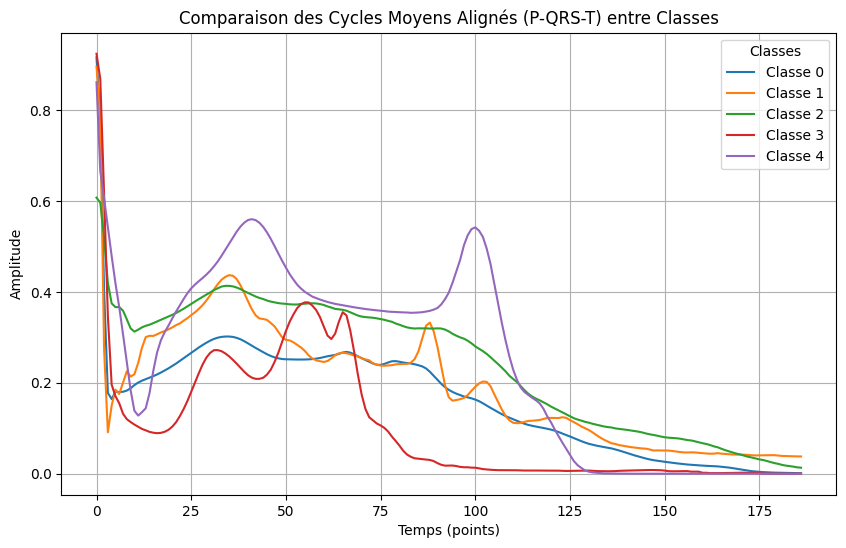

In [42]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from dtaidistance import dtw
import matplotlib.pyplot as plt

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Définir les classes
classes = [0, 1, 2, 3, 4]
sampling_rate = 360  # Fréquence d'échantillonnage en Hz

# Durée des phases en points
pre_r = int(0.2 * sampling_rate)  # P et début de QRS
qrs_duration = int(0.1 * sampling_rate)  # QRS
post_qrs = int(0.2 * sampling_rate)  # T

# Fonction pour extraire la durée et l’amplitude moyenne de chaque phase
def extract_phase_metrics(signal):
    metrics = {}
    metrics['P'] = (np.mean(signal[:pre_r]), np.ptp(signal[:pre_r]))  # Phase P : moyenne et amplitude
    metrics['QRS'] = (np.mean(signal[pre_r:pre_r+qrs_duration]), np.ptp(signal[pre_r:pre_r+qrs_duration]))  # Phase QRS
    metrics['T'] = (np.mean(signal[pre_r+qrs_duration:pre_r+qrs_duration+post_qrs]), 
                    np.ptp(signal[pre_r+qrs_duration:pre_r+qrs_duration+post_qrs]))  # Phase T
    return metrics

# Récupérer le cycle moyen aligné par DTW pour chaque classe
mean_dtw_cycles = {}
for class_number in classes:
    class_signals = train_df[train_df['Groupe'] == class_number].iloc[:, :-1].values
    mean_cycle = np.mean(class_signals, axis=0)
    mean_dtw_cycles[class_number] = mean_cycle

# Calcul des indicateurs pour la comparaison avec la classe saine
results = {'Class': [], 'DTW Distance': [], 'Pearson Correlation': [], 'P Duration': [], 'QRS Duration': [], 'T Duration': []}

for class_number in [1, 2, 3, 4]:  # Comparaison avec les classes pathologiques uniquement
    print(f"\n--- Comparaison entre Classe 0 (saine) et Classe {class_number} ---")

    # 1. Distance DTW
    dtw_distance = dtw.distance(mean_dtw_cycles[0], mean_dtw_cycles[class_number])
    results['Class'].append(class_number)
    results['DTW Distance'].append(dtw_distance)
    print(f"Distance DTW : {dtw_distance:.4f}")

    # 2. Corrélation de Pearson
    corr, _ = pearsonr(mean_dtw_cycles[0], mean_dtw_cycles[class_number])
    results['Pearson Correlation'].append(corr)
    print(f"Corrélation de Pearson : {corr:.4f}")

    # 3. Durée et amplitude des phases P, QRS, T
    phase_metrics_saine = extract_phase_metrics(mean_dtw_cycles[0])
    phase_metrics_patho = extract_phase_metrics(mean_dtw_cycles[class_number])
    
    # Affichage des informations par phase
    for phase in ['P', 'QRS', 'T']:
        duration_diff = abs(phase_metrics_saine[phase][0] - phase_metrics_patho[phase][0])
        amplitude_diff = abs(phase_metrics_saine[phase][1] - phase_metrics_patho[phase][1])
        print(f"Phase {phase} - Différence de Durée : {duration_diff:.4f}, Différence d'Amplitude : {amplitude_diff:.4f}")
        results[f'{phase} Duration'].append(duration_diff)

# Affichage des résultats finaux
results_df = pd.DataFrame(results)
print("\nRésultats de la comparaison :")
print(results_df)

# Graphiques pour visualiser les différences de phases
plt.figure(figsize=(10, 6))
for class_number in [0, 1, 2, 3, 4]:
    plt.plot(mean_dtw_cycles[class_number], label=f"Classe {class_number}")
plt.title("Comparaison des Cycles Moyens Alignés (P-QRS-T) entre Classes")
plt.xlabel("Temps (points)")
plt.ylabel("Amplitude")
plt.legend(title="Classes")
plt.grid()
plt.show()


   Class  DTW Distance  Pearson Correlation  P Duration  QRS Duration  \
0      1      0.505690             0.959929    0.049035      0.020316   
1      2      0.736693             0.928774    0.108583      0.103961   
2      3      0.403483             0.843749    0.017473      0.163194   
3      4      1.059425             0.862087    0.141515      0.200629   

   T Duration  P Amplitude  QRS Amplitude  T Amplitude  
0    0.023458     0.053039       0.074364     0.037666  
1    0.049672     0.456832       0.006257     0.077400  
2    0.043589     0.083332       0.000219     0.116393  
3    0.009572     0.018221       0.093348     0.168404  


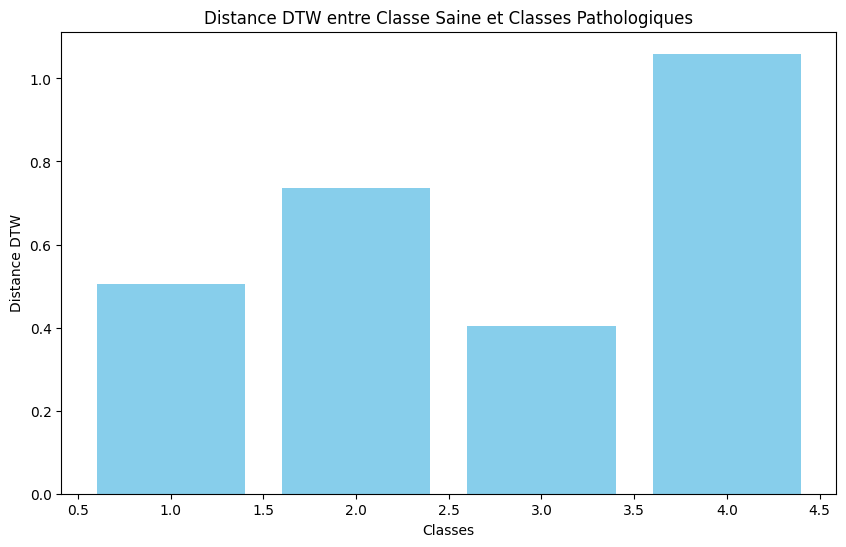

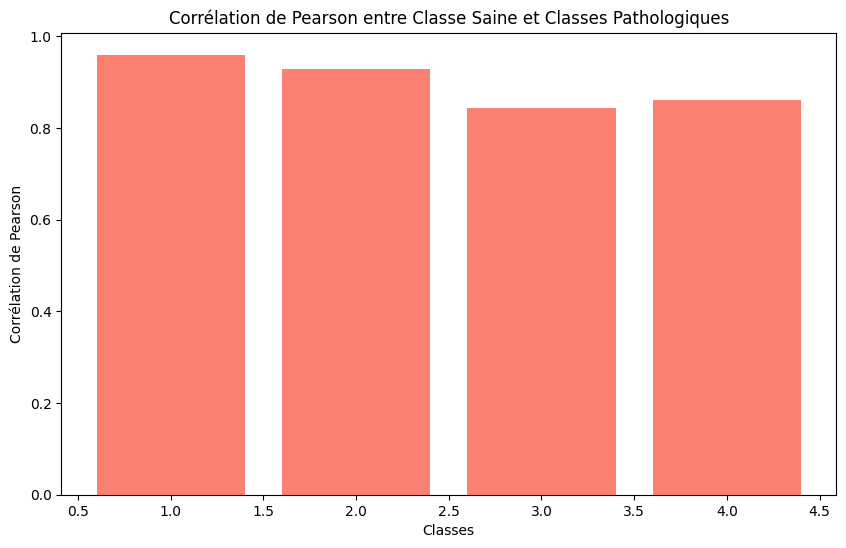

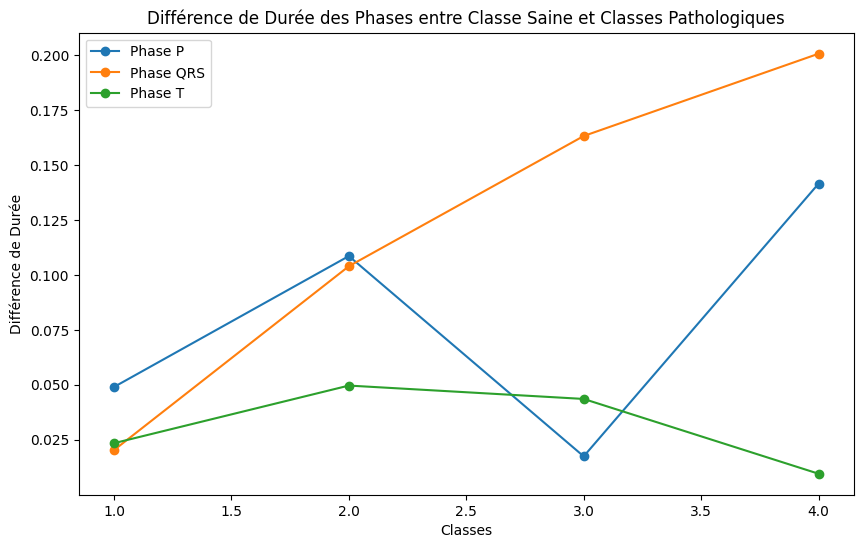

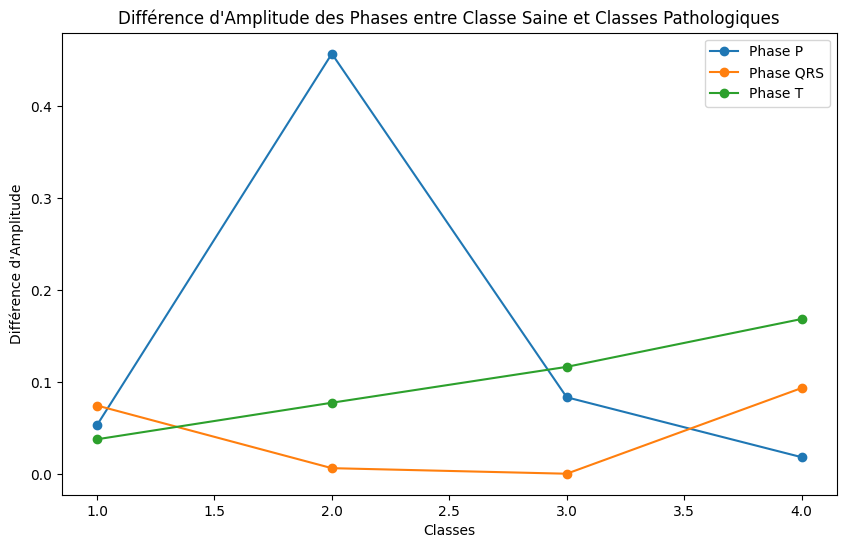

In [43]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from dtaidistance import dtw
import matplotlib.pyplot as plt

# Charger les données ECG
train_df = pd.read_csv("Data/mitbih_fus.csv")
train_df.columns = [f'Signal_{i}' for i in range(1, train_df.shape[1])] + ['Groupe']

# Définir les classes
classes = [0, 1, 2, 3, 4]
sampling_rate = 360  # Fréquence d'échantillonnage en Hz

# Durée des phases en points
pre_r = int(0.2 * sampling_rate)  # P et début de QRS
qrs_duration = int(0.1 * sampling_rate)  # QRS
post_qrs = int(0.2 * sampling_rate)  # T

# Fonction pour extraire la durée et l’amplitude moyenne de chaque phase
def extract_phase_metrics(signal):
    metrics = {}
    metrics['P'] = (np.mean(signal[:pre_r]), np.ptp(signal[:pre_r]))  # Phase P : moyenne et amplitude
    metrics['QRS'] = (np.mean(signal[pre_r:pre_r+qrs_duration]), np.ptp(signal[pre_r:pre_r+qrs_duration]))  # Phase QRS
    metrics['T'] = (np.mean(signal[pre_r+qrs_duration:pre_r+qrs_duration+post_qrs]), 
                    np.ptp(signal[pre_r+qrs_duration:pre_r+qrs_duration+post_qrs]))  # Phase T
    return metrics

# Récupérer le cycle moyen aligné par DTW pour chaque classe
mean_dtw_cycles = {}
for class_number in classes:
    class_signals = train_df[train_df['Groupe'] == class_number].iloc[:, :-1].values
    mean_cycle = np.mean(class_signals, axis=0)
    mean_dtw_cycles[class_number] = mean_cycle

# Calcul des indicateurs pour la comparaison avec la classe saine
results = {'Class': [], 'DTW Distance': [], 'Pearson Correlation': [], 
           'P Duration': [], 'QRS Duration': [], 'T Duration': [],
           'P Amplitude': [], 'QRS Amplitude': [], 'T Amplitude': []}

for class_number in [1, 2, 3, 4]:  # Comparaison avec les classes pathologiques uniquement
    # 1. Distance DTW
    dtw_distance = dtw.distance(mean_dtw_cycles[0], mean_dtw_cycles[class_number])
    results['Class'].append(class_number)
    results['DTW Distance'].append(dtw_distance)

    # 2. Corrélation de Pearson
    corr, _ = pearsonr(mean_dtw_cycles[0], mean_dtw_cycles[class_number])
    results['Pearson Correlation'].append(corr)

    # 3. Durée et amplitude des phases P, QRS, T
    phase_metrics_saine = extract_phase_metrics(mean_dtw_cycles[0])
    phase_metrics_patho = extract_phase_metrics(mean_dtw_cycles[class_number])
    
    # Extraction des différences de durée et d'amplitude pour chaque phase
    for phase in ['P', 'QRS', 'T']:
        duration_diff = abs(phase_metrics_saine[phase][0] - phase_metrics_patho[phase][0])
        amplitude_diff = abs(phase_metrics_saine[phase][1] - phase_metrics_patho[phase][1])
        results[f'{phase} Duration'].append(duration_diff)
        results[f'{phase} Amplitude'].append(amplitude_diff)

# Affichage des résultats sous forme de DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Génération des schémas

# Schéma 1 : Distance DTW
plt.figure(figsize=(10, 6))
plt.bar(results_df['Class'], results_df['DTW Distance'], color='skyblue')
plt.xlabel("Classes")
plt.ylabel("Distance DTW")
plt.title("Distance DTW entre Classe Saine et Classes Pathologiques")
plt.show()

# Schéma 2 : Corrélation de Pearson
plt.figure(figsize=(10, 6))
plt.bar(results_df['Class'], results_df['Pearson Correlation'], color='salmon')
plt.xlabel("Classes")
plt.ylabel("Corrélation de Pearson")
plt.title("Corrélation de Pearson entre Classe Saine et Classes Pathologiques")
plt.show()

# Schéma 3 : Différence de Durée des Phases P, QRS, T
plt.figure(figsize=(10, 6))
plt.plot(results_df['Class'], results_df['P Duration'], marker='o', label='Phase P')
plt.plot(results_df['Class'], results_df['QRS Duration'], marker='o', label='Phase QRS')
plt.plot(results_df['Class'], results_df['T Duration'], marker='o', label='Phase T')
plt.xlabel("Classes")
plt.ylabel("Différence de Durée")
plt.title("Différence de Durée des Phases entre Classe Saine et Classes Pathologiques")
plt.legend()
plt.show()

# Schéma 4 : Différence d'Amplitude des Phases P, QRS, T
plt.figure(figsize=(10, 6))
plt.plot(results_df['Class'], results_df['P Amplitude'], marker='o', label='Phase P')
plt.plot(results_df['Class'], results_df['QRS Amplitude'], marker='o', label='Phase QRS')
plt.plot(results_df['Class'], results_df['T Amplitude'], marker='o', label='Phase T')
plt.xlabel("Classes")
plt.ylabel("Différence d'Amplitude")
plt.title("Différence d'Amplitude des Phases entre Classe Saine et Classes Pathologiques")
plt.legend()
plt.show()


# à comparer pour la suite 

## Éléments Statistiques à Comparer

1. Distance DTW pour chaque classe, qui vous aide à identifier la classe la plus proche en termes de forme et de timing global.
2. Corrélation de Pearson pour observer la similarité de forme spécifique entre le cycle brut et les cycles moyens de chaque classe.
3. Durée et amplitude des phases P, QRS, T, qui sont des indicateurs cliniques importants pour la comparaison entre le cycle brut et les cycles pathologiques.

Cette méthode vous permettra de déterminer dans quelle mesure votre cycle brut correspond aux cycles typiques de chaque classe, et pourrait être utilisée pour identifier des anomalies dans de nouveaux ECG.

# Travail de Lucien pour la suite 

Code Arduino :
Permet de recevoir le signal ECG du capteur pendant 10 secondes à 30 millisecondes (33 Hz). En parallèle, une LED RVB s'allume en vert. Une fois les 10 secondes passées, la LED passe au rouge.

Script Python (read_arduino.py) :
Permet de lire le signal ECG du capteur et de l'enregistrer dans un fichier CSV.

Script Python (autocorr.py) :
Permet de faire l'auto-corrélation du signal ECG obtenu dans le CSV et d'afficher les graphiques de l'ECG et de l'auto-corrélation.

In [12]:
import pandas as pd

# Fichiers à nettoyer
test_file = "Data/mitbih_test.csv"
train_file = "Data/mitbih_train.csv"
fus_file = "Data/mitbih_fus.csv"

# Fonction pour nettoyer les données ECG
def clean_ecg_data(input_file, output_file):
    # Charger le fichier CSV
    df = pd.read_csv(input_file, header=None)

    # Séparer la colonne de classe (dernière colonne)
    class_column = df.iloc[:, -1]

    # Nettoyer les lignes une par une
    cleaned_rows = []
    for i, row in df.iterrows():
        # Récupérer les données sans la classe
        data_row = row[:-1].tolist()

        # Supprimer les zéros inutiles à la fin
        while data_row and data_row[-1] == 0:
            data_row.pop()

        # Ajouter la classe à la fin
        data_row.append(row.iloc[-1])

        # Ajouter la ligne nettoyée à la liste
        cleaned_rows.append(data_row)

    # Écrire le fichier nettoyé
    with open(output_file, 'w') as f:
        for row in cleaned_rows:
            # Convertir chaque ligne en chaîne de caractères en format scientifique
            row_str = ",".join(f"{x:.18e}" if isinstance(x, (float, int)) else str(x) for x in row)
            f.write(row_str + "\n")

# Nettoyer les fichiers CSV
clean_ecg_data(test_file, "cleaned_mitbih_test.csv")
clean_ecg_data(train_file, "cleaned_mitbih_train.csv")
clean_ecg_data(fus_file, "cleaned_mitbih_fus.csv")

print("Les fichiers nettoyés ont été générés : 'cleaned_mitbih_test.csv', 'cleaned_mitbih_train.csv', et 'cleaned_mitbih_fus.csv'")


Les fichiers nettoyés ont été générés : 'cleaned_mitbih_test.csv', 'cleaned_mitbih_train.csv', et 'cleaned_mitbih_fus.csv'


## !!!!! Tenter d'aligner les BPM (temps de battement) pour avoir les vrais résultats moyens avec les vrais temporalités selon les phases.

2 types de normalisation : standard et min-max

min-max, c'est pour les images : VALUE / MAX - MIN

standard, ce sont pour les chiffres et valeurs : VALUE - MOY / ECART-TYPE 

In [3]:
import csv

# Fichiers d'entrée et de sortie
input_files = [
    "cleaned_mitbih_fus.csv",
    "cleaned_mitbih_train.csv",
    "cleaned_mitbih_test.csv"
]
output_files = [
    "cleaned_mitbih_fus_trimmed.csv",
    "cleaned_mitbih_train_trimmed.csv",
    "cleaned_mitbih_test_trimmed.csv"
]

# Fonction pour traiter chaque fichier
def trim_csv(input_file, output_file, columns_to_skip=5):
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        for row in reader:
            # Vérifier que la ligne contient au moins `columns_to_skip` colonnes
            if len(row) > columns_to_skip:
                # Écrire la ligne sans les `columns_to_skip` premières colonnes
                writer.writerow(row[columns_to_skip:])
            else:
                # Si la ligne est trop courte, écrire une ligne vide ou l'ignorer
                writer.writerow([])  # Ou `continue` si vous préférez ignorer

# Boucle pour traiter chaque fichier
for input_file, output_file in zip(input_files, output_files):
    try:
        trim_csv(input_file, output_file)
        print(f"Fichier '{output_file}' créé avec succès.")
    except Exception as e:
        print(f"Erreur lors du traitement de '{input_file}': {e}")


Fichier 'cleaned_mitbih_fus_trimmed.csv' créé avec succès.
Fichier 'cleaned_mitbih_train_trimmed.csv' créé avec succès.
Fichier 'cleaned_mitbih_test_trimmed.csv' créé avec succès.


In [2]:
import csv

# Fichiers d'entrée et de sortie
input_files = [
    "Data/mitbih_fus.csv",
    "Data/mitbih_train.csv",
    "Data/mitbih_test.csv"
]
output_files = [
    "mitbih_fus_trimmed.csv",
    "mitbih_train_trimmed.csv",
    "mitbih_test_trimmed.csv"
]

# Fonction pour traiter chaque fichier
def trim_csv(input_file, output_file, columns_to_skip=5):
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        for row in reader:
            # Vérifier que la ligne contient au moins `columns_to_skip` colonnes
            if len(row) > columns_to_skip:
                # Écrire la ligne sans les `columns_to_skip` premières colonnes
                writer.writerow(row[columns_to_skip:])
            else:
                # Si la ligne est trop courte, écrire une ligne vide ou l'ignorer
                writer.writerow([])  # Ou `continue` si vous préférez ignorer

# Boucle pour traiter chaque fichier
for input_file, output_file in zip(input_files, output_files):
    try:
        trim_csv(input_file, output_file)
        print(f"Fichier '{output_file}' créé avec succès.")
    except Exception as e:
        print(f"Erreur lors du traitement de '{input_file}': {e}")


Fichier 'mitbih_fus_trimmed.csv' créé avec succès.
Fichier 'mitbih_train_trimmed.csv' créé avec succès.
Fichier 'mitbih_test_trimmed.csv' créé avec succès.


https://drive.google.com/drive/folders/1wqZ9gkxHuVOVcifHS_4ONY18DHS9kn13